# Data Sourcing

## Importing the data

In [1]:
#Importing necessary libraries and reading the dataset 

import numpy as np, pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv("application_data.csv")
df1 = pd.read_csv("previous_application.csv")
df.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   ...  FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20 FLAG_DOCUMENT_21  \
0  ...                 0                0                0                0   
1  ...                 0                0                0                0   
2  ...                 0                0                0                0   
3  ...                 0                0                0                0   
4  ...                 0                0                0                0   

  AMT_REQ_CREDIT_BUREAU_HOUR AMT_REQ_CREDIT_BUREAU_DAY  \
0                        0.0                       0.0   
1                        0.0                       0.0   
2                        0.0                       0.0   
3                        NaN                       NaN   
4                        0.0                       0.0   

   AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                         0.0                        0.0   
1                         0.0                        0.0   
2                         0.0                        0.0   
3                         NaN                        NaN   
4                         0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
0                        0.0                         1.0  
1                        0.0                         0.0  
2                        0.0                         0.0  
3                        NaN                         NaN  
4                        0.0                         0.0  

[5 rows x 122 columns]

In [2]:
#The rows and columns in the dataset before dropping of the variables
df.shape

(307511, 122)

In [3]:
#Summary of the dataset
df.info(-1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Dtype  
---   ------                        -----  
 0    SK_ID_CURR                    int64  
 1    TARGET                        int64  
 2    NAME_CONTRACT_TYPE            object 
 3    CODE_GENDER                   object 
 4    FLAG_OWN_CAR                  object 
 5    FLAG_OWN_REALTY               object 
 6    CNT_CHILDREN                  int64  
 7    AMT_INCOME_TOTAL              float64
 8    AMT_CREDIT                    float64
 9    AMT_ANNUITY                   float64
 10   AMT_GOODS_PRICE               float64
 11   NAME_TYPE_SUITE               object 
 12   NAME_INCOME_TYPE              object 
 13   NAME_EDUCATION_TYPE           object 
 14   NAME_FAMILY_STATUS            object 
 15   NAME_HOUSING_TYPE             object 
 16   REGION_POPULATION_RELATIVE    float64
 17   DAYS_BIRTH                    int64  
 18   DA

In [4]:
pd.set_option("display.max_rows",150)

### Checking for data imbalance


<AxesSubplot:>

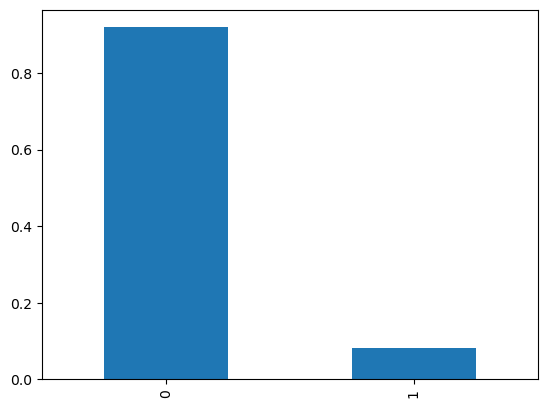

In [5]:
df.TARGET.value_counts(normalize = True).plot.bar()

### Approx. 92% of the data is of 0, which means all the other cases/ non defaulters
### The rest are of 1, which means client with payment difficulties

# Data Cleaning

## Checking for missing values

#### There are a lot of missing values that can influence the data so dropping them would be a good option
#### Occupation type is an important variable for analysis so, that column shouln't be droppped

In [6]:
# Checking missing values

missing_values = df.isnull().sum().sort_values(ascending=False)
missing_values_percent = (missing_values / len(df)) * 100
missing_data = pd.concat([missing_values, missing_values_percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(100)


Total    Percent
COMMONAREA_MEDI               214865  69.872297
COMMONAREA_AVG                214865  69.872297
COMMONAREA_MODE               214865  69.872297
NONLIVINGAPARTMENTS_MODE      213514  69.432963
NONLIVINGAPARTMENTS_AVG       213514  69.432963
NONLIVINGAPARTMENTS_MEDI      213514  69.432963
FONDKAPREMONT_MODE            210295  68.386172
LIVINGAPARTMENTS_MODE         210199  68.354953
LIVINGAPARTMENTS_AVG          210199  68.354953
LIVINGAPARTMENTS_MEDI         210199  68.354953
FLOORSMIN_AVG                 208642  67.848630
FLOORSMIN_MODE                208642  67.848630
FLOORSMIN_MEDI                208642  67.848630
YEARS_BUILD_MEDI              204488  66.497784
YEARS_BUILD_MODE              204488  66.497784
YEARS_BUILD_AVG               204488  66.497784
OWN_CAR_AGE                   202929  65.990810
LANDAREA_MEDI                 182590  59.376738
LANDAREA_MODE                 182590  59.376738
LANDAREA_AVG                  182590  59.376738
BASEMENTAREA_MEDI             179943  58.515956
BASEMENTAREA_AVG              179943  58.515956
BASEMENTAREA_MODE             179943  58.515956
EXT_SOURCE_1                  173378  56.381073
NONLIVINGAREA_MODE            169682  55.179164
NONLIVINGAREA_AVG             169682  55.179164
NONLIVINGAREA_MEDI            169682  55.179164
ELEVATORS_MEDI                163891  53.295980
ELEVATORS_AVG                 163891  53.295980
ELEVATORS_MODE                163891  53.295980
WALLSMATERIAL_MODE            156341  50.840783
APARTMENTS_MEDI               156061  50.749729
APARTMENTS_AVG                156061  50.749729
APARTMENTS_MODE               156061  50.749729
ENTRANCES_MEDI                154828  50.348768
ENTRANCES_AVG                 154828  50.348768
ENTRANCES_MODE                154828  50.348768
LIVINGAREA_AVG                154350  50.193326
LIVINGAREA_MODE               154350  50.193326
LIVINGAREA_MEDI               154350  50.193326
HOUSETYPE_MODE                154297  50.176091
FLOORSMAX_MODE                153020  49.760822
FLOORSMAX_MEDI                153020  49.760822
FLOORSMAX_AVG                 153020  49.760822
YEARS_BEGINEXPLUATATION_MODE  150007  48.781019
YEARS_BEGINEXPLUATATION_MEDI  150007  48.781019
YEARS_BEGINEXPLUATATION_AVG   150007  48.781019
TOTALAREA_MODE                148431  48.268517
EMERGENCYSTATE_MODE           145755  47.398304
OCCUPATION_TYPE                96391  31.345545
EXT_SOURCE_3                   60965  19.825307
AMT_REQ_CREDIT_BUREAU_HOUR     41519  13.501631
AMT_REQ_CREDIT_BUREAU_DAY      41519  13.501631
AMT_REQ_CREDIT_BUREAU_WEEK     41519  13.501631
AMT_REQ_CREDIT_BUREAU_MON      41519  13.501631
AMT_REQ_CREDIT_BUREAU_QRT      41519  13.501631
AMT_REQ_CREDIT_BUREAU_YEAR     41519  13.501631
NAME_TYPE_SUITE                 1292   0.420148
OBS_30_CNT_SOCIAL_CIRCLE        1021   0.332021
DEF_30_CNT_SOCIAL_CIRCLE        1021   0.332021
OBS_60_CNT_SOCIAL_CIRCLE        1021   0.332021
DEF_60_CNT_SOCIAL_CIRCLE        1021   0.332021
EXT_SOURCE_2                     660   0.214626
AMT_GOODS_PRICE                  278   0.090403
AMT_ANNUITY                       12   0.003902
CNT_FAM_MEMBERS                    2   0.000650
DAYS_LAST_PHONE_CHANGE             1   0.000325
CNT_CHILDREN                       0   0.000000
FLAG_DOCUMENT_8                    0   0.000000
NAME_CONTRACT_TYPE                 0   0.000000
CODE_GENDER                        0   0.000000
FLAG_OWN_CAR                       0   0.000000
FLAG_DOCUMENT_2                    0   0.000000
FLAG_DOCUMENT_3                    0   0.000000
FLAG_DOCUMENT_4                    0   0.000000
FLAG_DOCUMENT_5                    0   0.000000
FLAG_DOCUMENT_6                    0   0.000000
FLAG_DOCUMENT_7                    0   0.000000
FLAG_DOCUMENT_9                    0   0.000000
FLAG_DOCUMENT_21                   0   0.000000
FLAG_DOCUMENT_10                   0   0.000000
FLAG_DOCUMENT_11                   0   0.000000
FLAG_OWN_REALTY                    0   0.000000

#### Although the "FLAG_DOCUMENT_1 .... so on" columns have no nulls but these variables are necessary in order to make rules for the company

In [7]:
#Since we need to identify the factors only then dropping such column would be good.
df.isnull().sum()

SK_ID_CURR                           0
TARGET                               0
NAME_CONTRACT_TYPE                   0
CODE_GENDER                          0
FLAG_OWN_CAR                         0
FLAG_OWN_REALTY                      0
CNT_CHILDREN                         0
AMT_INCOME_TOTAL                     0
AMT_CREDIT                           0
AMT_ANNUITY                         12
AMT_GOODS_PRICE                    278
NAME_TYPE_SUITE                   1292
NAME_INCOME_TYPE                     0
NAME_EDUCATION_TYPE                  0
NAME_FAMILY_STATUS                   0
NAME_HOUSING_TYPE                    0
REGION_POPULATION_RELATIVE           0
DAYS_BIRTH                           0
DAYS_EMPLOYED                        0
DAYS_REGISTRATION                    0
DAYS_ID_PUBLISH                      0
OWN_CAR_AGE                     202929
FLAG_MOBIL                           0
FLAG_EMP_PHONE                       0
FLAG_WORK_PHONE                      0
FLAG_CONT_MOBILE         

In [8]:
#Retrieving the column names for dropping 
df.columns[41:]

Index(['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'APARTMENTS_AVG',
       'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG',
       'COMMONAREA_AVG', 'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMAX_AVG',
       'FLOORSMIN_AVG', 'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG',
       'LIVINGAREA_AVG', 'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG',
       'APARTMENTS_MODE', 'BASEMENTAREA_MODE', 'YEARS_BEGINEXPLUATATION_MODE',
       'YEARS_BUILD_MODE', 'COMMONAREA_MODE', 'ELEVATORS_MODE',
       'ENTRANCES_MODE', 'FLOORSMAX_MODE', 'FLOORSMIN_MODE', 'LANDAREA_MODE',
       'LIVINGAPARTMENTS_MODE', 'LIVINGAREA_MODE', 'NONLIVINGAPARTMENTS_MODE',
       'NONLIVINGAREA_MODE', 'APARTMENTS_MEDI', 'BASEMENTAREA_MEDI',
       'YEARS_BEGINEXPLUATATION_MEDI', 'YEARS_BUILD_MEDI', 'COMMONAREA_MEDI',
       'ELEVATORS_MEDI', 'ENTRANCES_MEDI', 'FLOORSMAX_MEDI', 'FLOORSMIN_MEDI',
       'LANDAREA_MEDI', 'LIVINGAPARTMENTS_MEDI', 'LIVINGAREA_MEDI',
       'NONLIVINGAPARTMENTS_MEDI', 'NONLIVI

In [9]:
#Dropped unnecessary columns that were identified
#Since they are ordered, used iloc for droping them from col index 41 

df = df.iloc[:, :41]

In [10]:
#Rechecking of the missing values after dropping the variables

missing_values = df.isnull().sum().sort_values(ascending=False)
missing_values_percent = (missing_values / len(df)) * 100
missing_data = pd.concat([missing_values, missing_values_percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

Total    Percent
OWN_CAR_AGE                  202929  65.990810
OCCUPATION_TYPE               96391  31.345545
NAME_TYPE_SUITE                1292   0.420148
AMT_GOODS_PRICE                 278   0.090403
AMT_ANNUITY                      12   0.003902
CNT_FAM_MEMBERS                   2   0.000650
REG_CITY_NOT_WORK_CITY            0   0.000000
REGION_RATING_CLIENT              0   0.000000
FLAG_WORK_PHONE                   0   0.000000
FLAG_CONT_MOBILE                  0   0.000000
FLAG_PHONE                        0   0.000000
FLAG_EMAIL                        0   0.000000
LIVE_CITY_NOT_WORK_CITY           0   0.000000
WEEKDAY_APPR_PROCESS_START        0   0.000000
REGION_RATING_CLIENT_W_CITY       0   0.000000
REG_CITY_NOT_LIVE_CITY            0   0.000000
FLAG_EMP_PHONE                    0   0.000000
HOUR_APPR_PROCESS_START           0   0.000000
REG_REGION_NOT_LIVE_REGION        0   0.000000
REG_REGION_NOT_WORK_REGION        0   0.000000

In [11]:
#Dropped the column "OWN_CAR_AGE", since it has high number of missing values in it

df.drop("OWN_CAR_AGE", axis = 1,inplace  = True)

In [12]:
#Checking the shape of the data after dropping the variables
#So, left with 40 crucial variables where analysis can be conducted

df.shape

(307511, 40)

In [13]:
#Rechecking of the missing values after dropping the variables
#Since the top 3 variables are important for analysis, imputing the values is the right apporach 


missing_values = df.isnull().sum().sort_values(ascending=False)
missing_values_percent = (missing_values / len(df)) * 100
missing_data = pd.concat([missing_values, missing_values_percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

Total    Percent
OCCUPATION_TYPE              96391  31.345545
NAME_TYPE_SUITE               1292   0.420148
AMT_GOODS_PRICE                278   0.090403
AMT_ANNUITY                     12   0.003902
CNT_FAM_MEMBERS                  2   0.000650
FLAG_CONT_MOBILE                 0   0.000000
FLAG_PHONE                       0   0.000000
FLAG_EMAIL                       0   0.000000
REGION_RATING_CLIENT             0   0.000000
REGION_RATING_CLIENT_W_CITY      0   0.000000
WEEKDAY_APPR_PROCESS_START       0   0.000000
SK_ID_CURR                       0   0.000000
FLAG_EMP_PHONE                   0   0.000000
HOUR_APPR_PROCESS_START          0   0.000000
REG_REGION_NOT_LIVE_REGION       0   0.000000
REG_REGION_NOT_WORK_REGION       0   0.000000
LIVE_REGION_NOT_WORK_REGION      0   0.000000
REG_CITY_NOT_LIVE_CITY           0   0.000000
REG_CITY_NOT_WORK_CITY           0   0.000000
LIVE_CITY_NOT_WORK_CITY          0   0.000000

In [14]:
#Rechecking the data type before imputing any values

df.info(-1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 40 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   FLAG_OWN_CAR                 307511 non-null  object 
 5   FLAG_OWN_REALTY              307511 non-null  object 
 6   CNT_CHILDREN                 307511 non-null  int64  
 7   AMT_INCOME_TOTAL             307511 non-null  float64
 8   AMT_CREDIT                   307511 non-null  float64
 9   AMT_ANNUITY                  307499 non-null  float64
 10  AMT_GOODS_PRICE              307233 non-null  float64
 11  NAME_TYPE_SUITE              306219 non-null  object 
 12  NAME_INCOME_TYPE             307511 non-null  object 
 13 

In [15]:
#Used mode for imputing the value as the the "OCCUPATION_TYPE" is a categorical variable 

df["OCCUPATION_TYPE"] = df["OCCUPATION_TYPE"].fillna(df["OCCUPATION_TYPE"].mode()[0])



In [16]:
#Verifying whether the nulls in the column have been filled or not

df.OCCUPATION_TYPE.isnull().sum()

0

In [17]:
#Imputing the value of the column by creating a new category "Unknown" as the mode was "Unaccompanied" which was a null value

df.loc[df['NAME_TYPE_SUITE']=="Unaccompanied",'NAME_TYPE_SUITE']= "Unknown"
df['NAME_TYPE_SUITE'].value_counts()

Unknown            248526
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
Other_A               866
Group of people       271
Name: NAME_TYPE_SUITE, dtype: int64

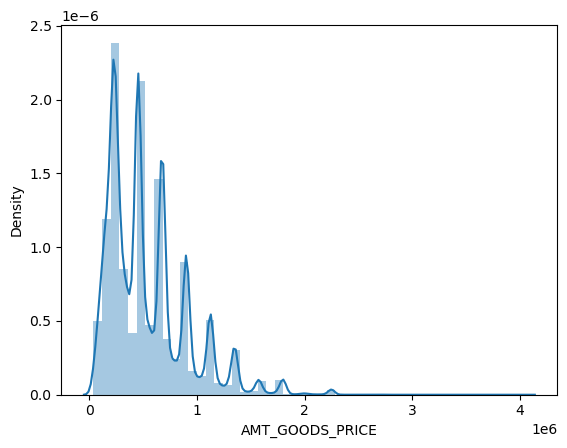

In [18]:
#Checking the skewness of the column "AMT_GOODS_PRICE" which will tell whether to go for mean or median value

sns.distplot(df["AMT_GOODS_PRICE"])
plt.show()

In [19]:
#Imputing the values with median value in the column "AMT_GOODS_PRICE" as the column has outliers and median will ignore the outliers

values0 =df['AMT_GOODS_PRICE'].median()
df.loc[df['AMT_GOODS_PRICE'].isnull(),'AMT_GOODS_PRICE']= values0


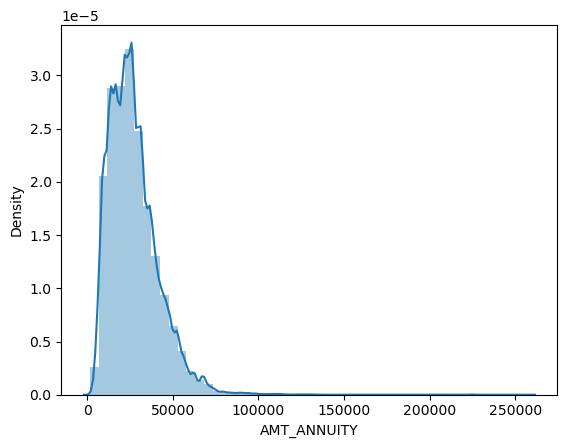

In [20]:
#Since the data is skewed in the column "AMT_ANNUITY", will use Median value for imputation

sns.distplot(df["AMT_ANNUITY"])
plt.show()

In [21]:
#Imputing the values with median value in the column "AMT_ANNUITY as the column is skewed and median value will not be affected the outliers

values =df['AMT_ANNUITY'].median()
df.loc[df['AMT_ANNUITY'].isnull(),'AMT_ANNUITY']= values

In [22]:
#Rechecking of the missing values after imputing the variables


missing_values = df.isnull().sum().sort_values(ascending=False)
missing_values_percent = (missing_values / len(df)) * 100
missing_data = pd.concat([missing_values, missing_values_percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

Total   Percent
NAME_TYPE_SUITE               1292  0.420148
CNT_FAM_MEMBERS                  2  0.000650
SK_ID_CURR                       0  0.000000
FLAG_MOBIL                       0  0.000000
FLAG_WORK_PHONE                  0  0.000000
FLAG_CONT_MOBILE                 0  0.000000
FLAG_PHONE                       0  0.000000
FLAG_EMAIL                       0  0.000000
OCCUPATION_TYPE                  0  0.000000
REGION_RATING_CLIENT             0  0.000000
REGION_RATING_CLIENT_W_CITY      0  0.000000
WEEKDAY_APPR_PROCESS_START       0  0.000000
HOUR_APPR_PROCESS_START          0  0.000000
REG_REGION_NOT_LIVE_REGION       0  0.000000
REG_REGION_NOT_WORK_REGION       0  0.000000
LIVE_REGION_NOT_WORK_REGION      0  0.000000
REG_CITY_NOT_LIVE_CITY           0  0.000000
REG_CITY_NOT_WORK_CITY           0  0.000000
LIVE_CITY_NOT_WORK_CITY          0  0.000000
FLAG_EMP_PHONE                   0  0.000000

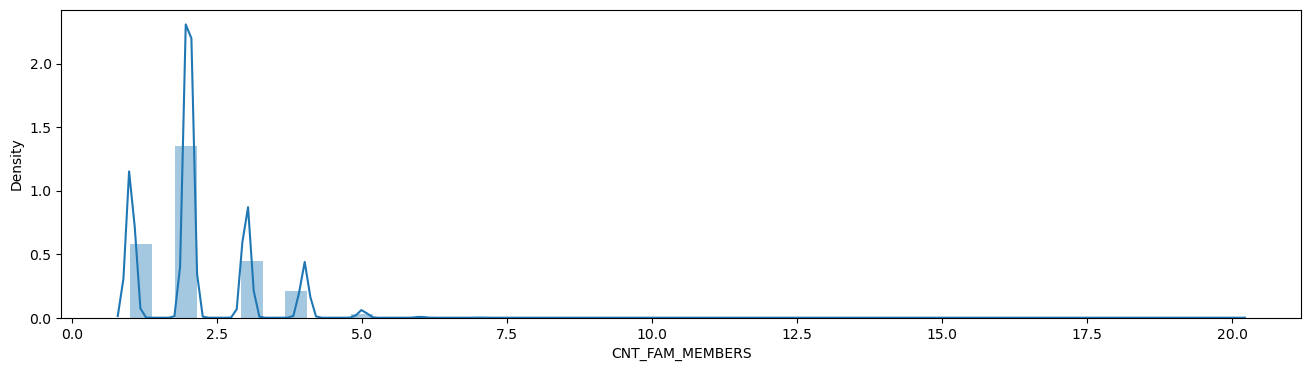

In [23]:
#Checking the skewness of the variable "CNT_FAM_MEMBERS"

plt.figure(figsize = [16,4])
sns.distplot(df["CNT_FAM_MEMBERS"])
plt.show()

### Since the variable "CNT_FAM_MEMBERS" has only 2 missing values and on computation of mean, median and mode the values are almost similar i.e. 2 so to provide the actual measure we will use mode value for imputing


In [24]:
#Computing the median
df["CNT_FAM_MEMBERS"].median()

2.0

In [25]:
#Computing the mode
df["CNT_FAM_MEMBERS"].mode()[0]

2.0

In [26]:
#Computing the mean
df["CNT_FAM_MEMBERS"].mean()

2.152665450442101

In [27]:
#Imputing the absolute value by using the mode value in the column "CNT_FAM_MEMBERS"

values1 =df['CNT_FAM_MEMBERS'].mode()[0]
df.loc[df['CNT_FAM_MEMBERS'].isnull(),'CNT_FAM_MEMBERS']= values1

In [28]:
#Rechecking of the missing values after imputing the variables


missing_values = df.isnull().sum().sort_values(ascending=False)
missing_values_percent = (missing_values / len(df)) * 100
missing_data = pd.concat([missing_values, missing_values_percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

Total   Percent
NAME_TYPE_SUITE               1292  0.420148
SK_ID_CURR                       0  0.000000
FLAG_MOBIL                       0  0.000000
FLAG_WORK_PHONE                  0  0.000000
FLAG_CONT_MOBILE                 0  0.000000
FLAG_PHONE                       0  0.000000
FLAG_EMAIL                       0  0.000000
OCCUPATION_TYPE                  0  0.000000
CNT_FAM_MEMBERS                  0  0.000000
REGION_RATING_CLIENT             0  0.000000
REGION_RATING_CLIENT_W_CITY      0  0.000000
WEEKDAY_APPR_PROCESS_START       0  0.000000
HOUR_APPR_PROCESS_START          0  0.000000
REG_REGION_NOT_LIVE_REGION       0  0.000000
REG_REGION_NOT_WORK_REGION       0  0.000000
LIVE_REGION_NOT_WORK_REGION      0  0.000000
REG_CITY_NOT_LIVE_CITY           0  0.000000
REG_CITY_NOT_WORK_CITY           0  0.000000
LIVE_CITY_NOT_WORK_CITY          0  0.000000
FLAG_EMP_PHONE                   0  0.000000

In [29]:
#Checking the dataset

df.head(100)

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0       100002       1         Cash loans           M            N   
1       100003       0         Cash loans           F            N   
2       100004       0    Revolving loans           M            Y   
3       100006       0         Cash loans           F            N   
4       100007       0         Cash loans           M            N   
5       100008       0         Cash loans           M            N   
6       100009       0         Cash loans           F            Y   
7       100010       0         Cash loans           M            Y   
8       100011       0         Cash loans           F            N   
9       100012       0    Revolving loans           M            N   
10      100014       0         Cash loans           F            N   
11      100015       0         Cash loans           F            N   
12      100016       0         Cash loans           F            N   
13      100017       0         Cash loans           M            Y   
14      100018       0         Cash loans           F            N   
15      100019       0         Cash loans           M            Y   
16      100020       0         Cash loans           M            N   
17      100021       0    Revolving loans           F            N   
18      100022       0    Revolving loans           F            N   
19      100023       0         Cash loans           F            N   
20      100024       0    Revolving loans           M            Y   
21      100025       0         Cash loans           F            Y   
22      100026       0         Cash loans           F            N   
23      100027       0         Cash loans           F            N   
24      100029       0         Cash loans           M            Y   
25      100030       0         Cash loans           F            N   
26      100031       1         Cash loans           F            N   
27      100032       0         Cash loans           M            N   
28      100033       0         Cash loans           M            Y   
29      100034       0    Revolving loans           M            N   
30      100035       0         Cash loans           F            N   
31      100036       0         Cash loans           F            N   
32      100037       0         Cash loans           F            N   
33      100039       0         Cash loans           M            Y   
34      100040       0         Cash loans           F            N   
35      100041       0         Cash loans           F            N   
36      100043       0         Cash loans           F            N   
37      100044       0         Cash loans           M            N   
38      100045       0         Cash loans           F            N   
39      100046       0    Revolving loans           M            Y   
40      100047       1         Cash loans           M            N   
41      100048       0         Cash loans           F            N   
42      100049       1         Cash loans           F            N   
43      100050       0         Cash loans           F            N   
44      100051       0         Cash loans           M            N   
45      100052       0    Revolving loans           F            N   
46      100053       0         Cash loans           F            N   
47      100054       0         Cash loans           F            N   
48      100055       0         Cash loans           F            N   
49      100056       0         Cash loans           M            Y   
50      100058       0    Revolving loans           F            N   
51      100059       0         Cash loans           M            Y   
52      100060       0         Cash loans           M            Y   
53      100061       0         Cash loans           F            N   
54      100062       0         Cash loans           M            Y   
55      100063       0         Cash loans           F            N   
56      100064

In [30]:
#Checking the categorical column like Gender

df.CODE_GENDER.value_counts()

F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64

In [31]:
#Checking the categorical column "ORGANIZATION_TYPE"

df.ORGANIZATION_TYPE.value_counts()

Business Entity Type 3    67992
XNA                       55374
Self-employed             38412
Other                     16683
Medicine                  11193
Business Entity Type 2    10553
Government                10404
School                     8893
Trade: type 7              7831
Kindergarten               6880
Construction               6721
Business Entity Type 1     5984
Transport: type 4          5398
Trade: type 3              3492
Industry: type 9           3368
Industry: type 3           3278
Security                   3247
Housing                    2958
Industry: type 11          2704
Military                   2634
Bank                       2507
Agriculture                2454
Police                     2341
Transport: type 2          2204
Postal                     2157
Security Ministries        1974
Trade: type 2              1900
Restaurant                 1811
Services                   1575
University                 1327
Industry: type 7           1307
Transpor

In [32]:
df.ORGANIZATION_TYPE.describe()

count                     307511
unique                        58
top       Business Entity Type 3
freq                       67992
Name: ORGANIZATION_TYPE, dtype: object

### We can see there are XNA values present in the columns so we need to impute the values for better analysis

### The column "ORGANIZATION_TYPE" has 55374 XNA values so, approx. 18% of the values, so for better analysis we can drop such rows



In [33]:
#Dropping the rows containing "XNA" values in "ORGANIZATION_TYPE"

df=df.drop(df.loc[df['ORGANIZATION_TYPE']=='XNA'].index)
df[df['ORGANIZATION_TYPE']=='XNA'].shape


(0, 40)

### For the "CODE_Gender" column the ratio of females is higher, since there are only 4 XNA values, we can treat them as Females as it will not have much impact on the data

In [34]:
#Imputing the values containing XNA in "CODE_Gender" column 

df.loc[df['CODE_GENDER']=='XNA','CODE_GENDER']='F'
df['CODE_GENDER'].value_counts()

F    157181
M     94956
Name: CODE_GENDER, dtype: int64

In [35]:
df.shape

(252137, 40)

### Handling Outliers in the numerical variables using boxplot

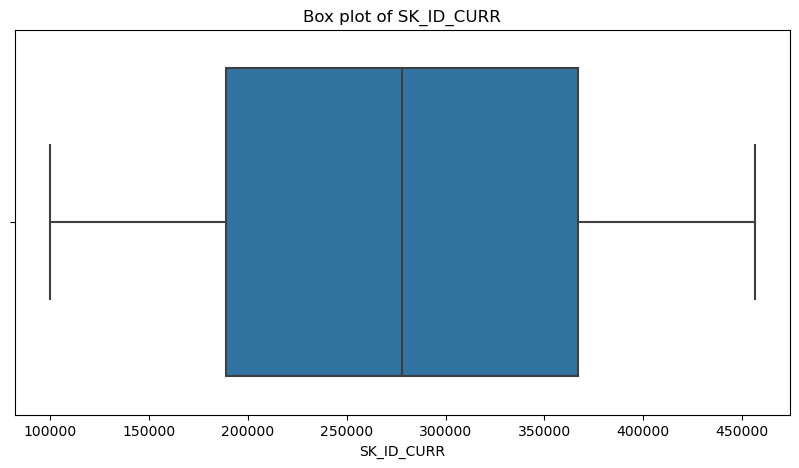

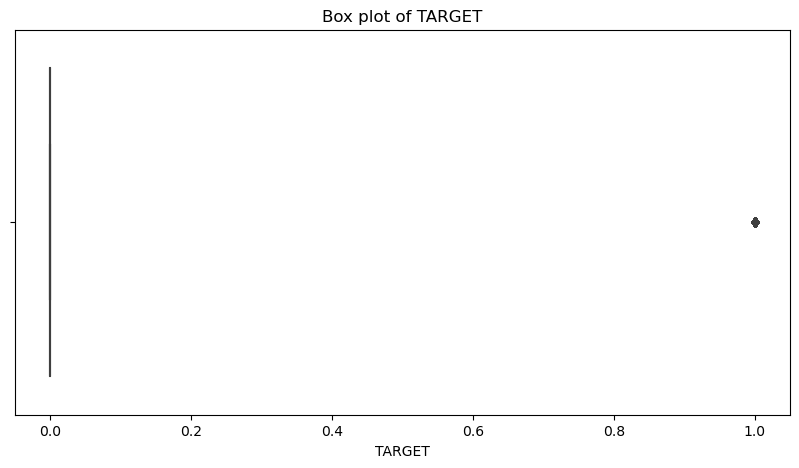

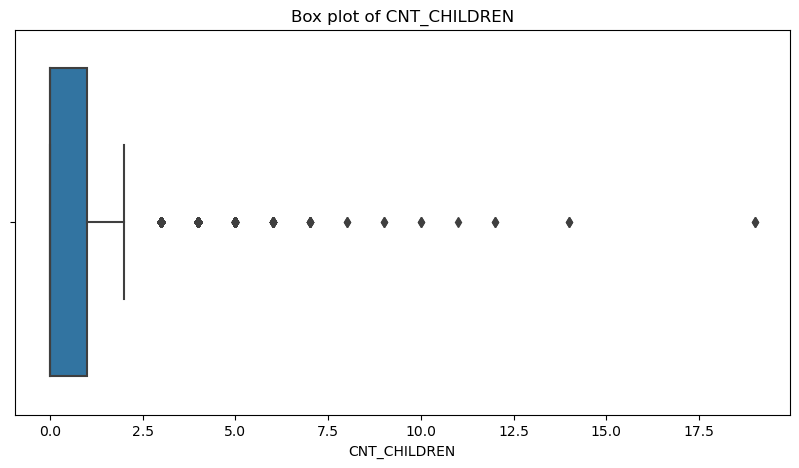

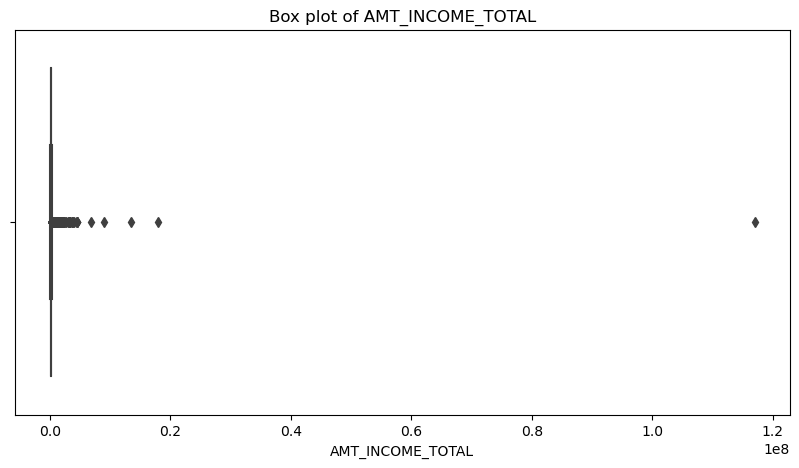

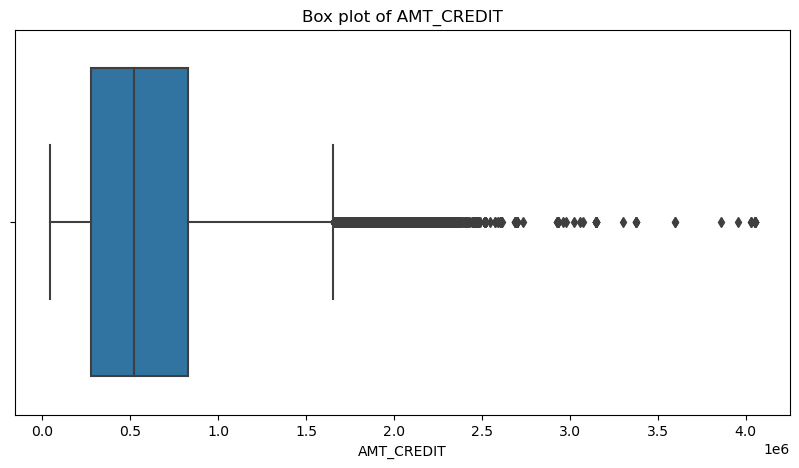

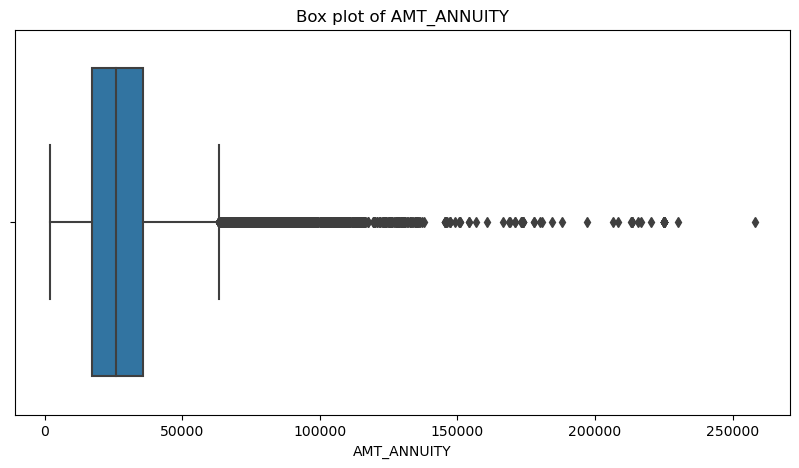

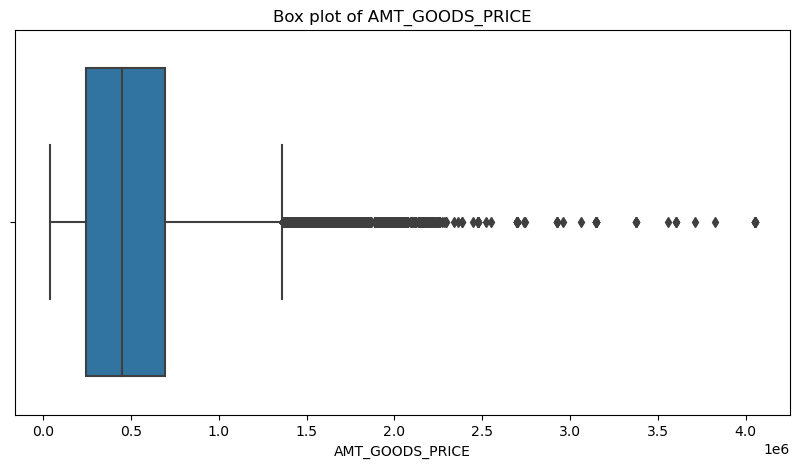

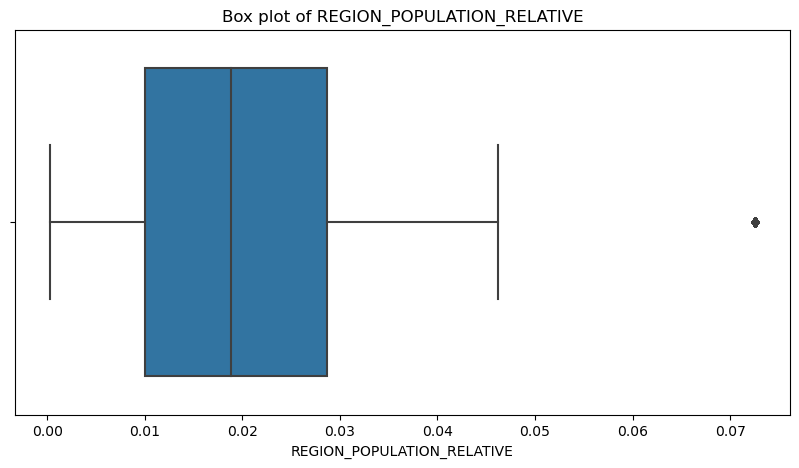

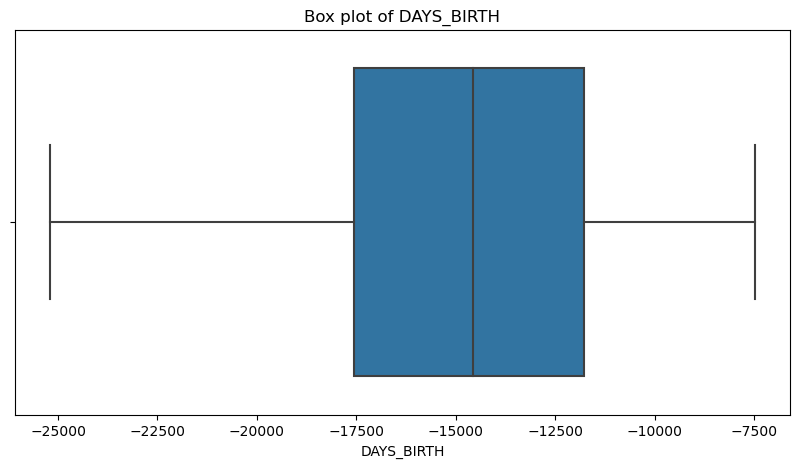

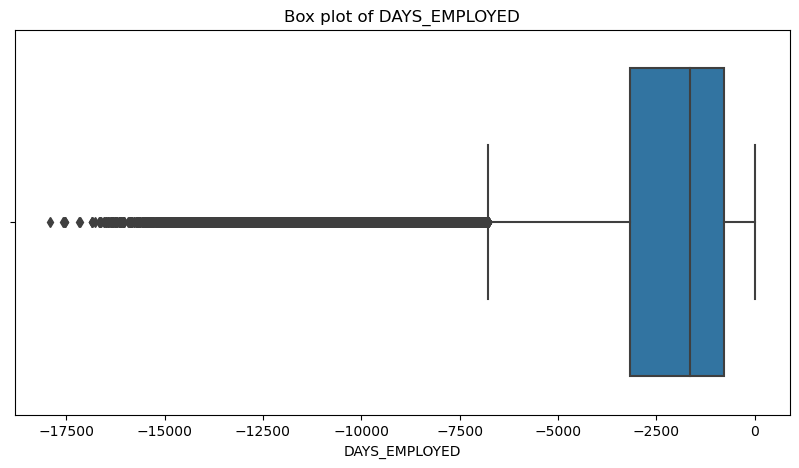

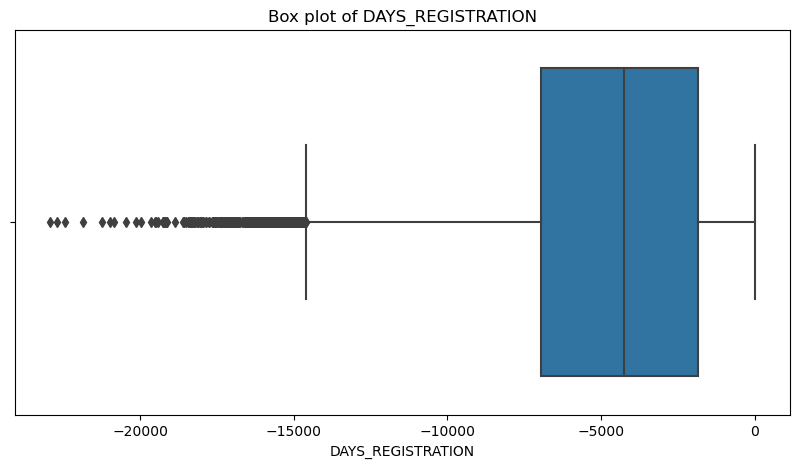

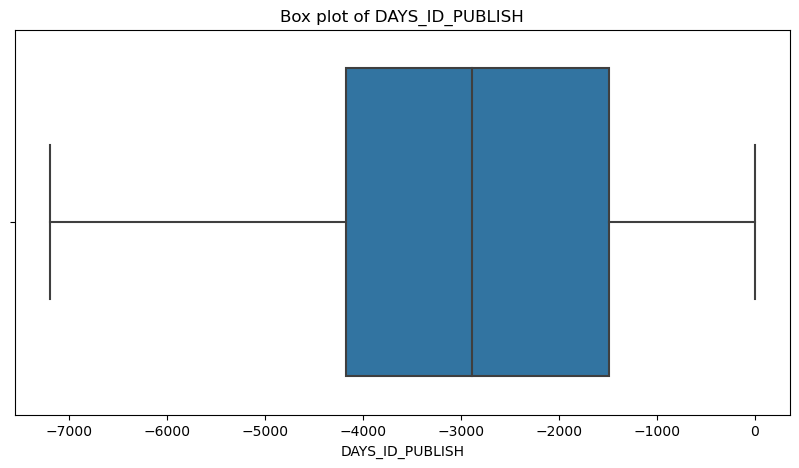

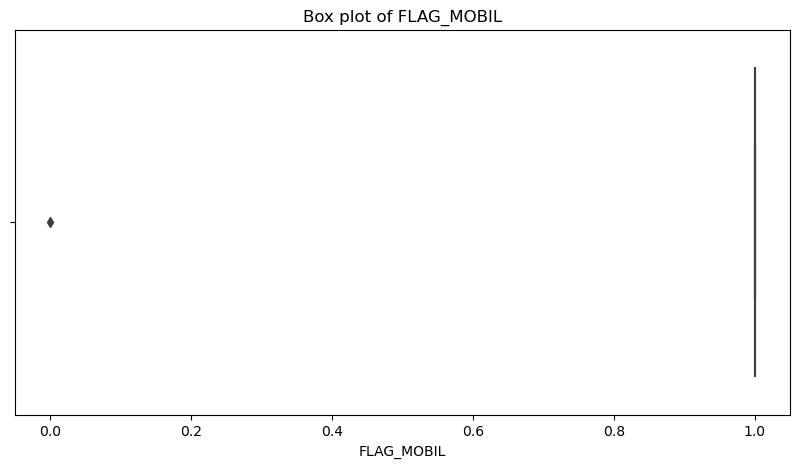

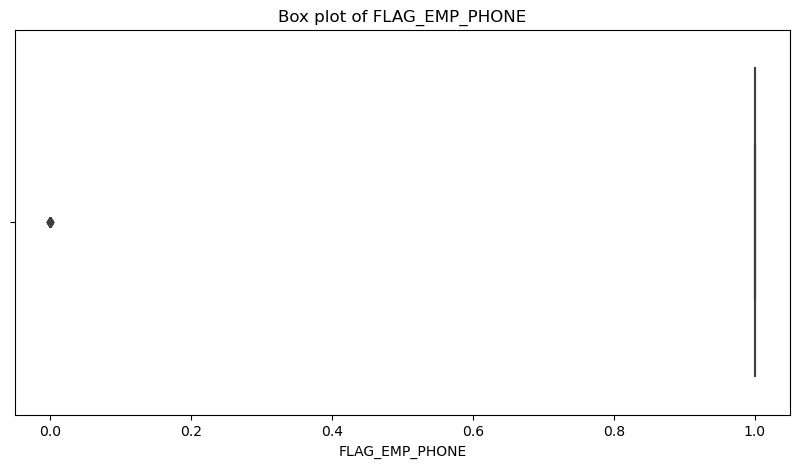

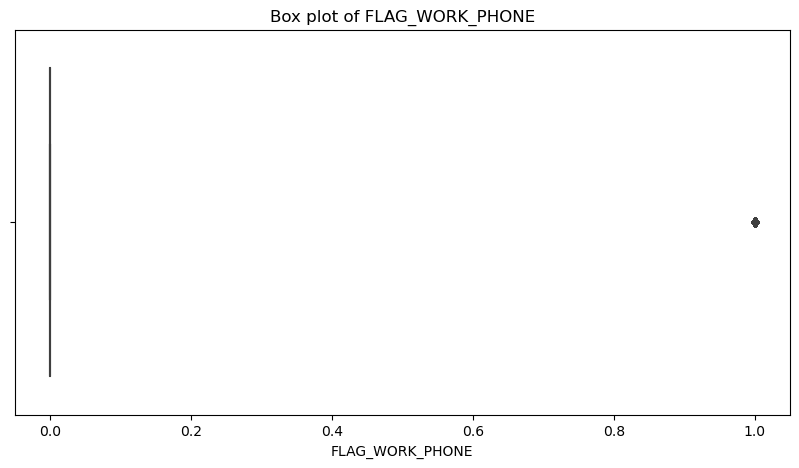

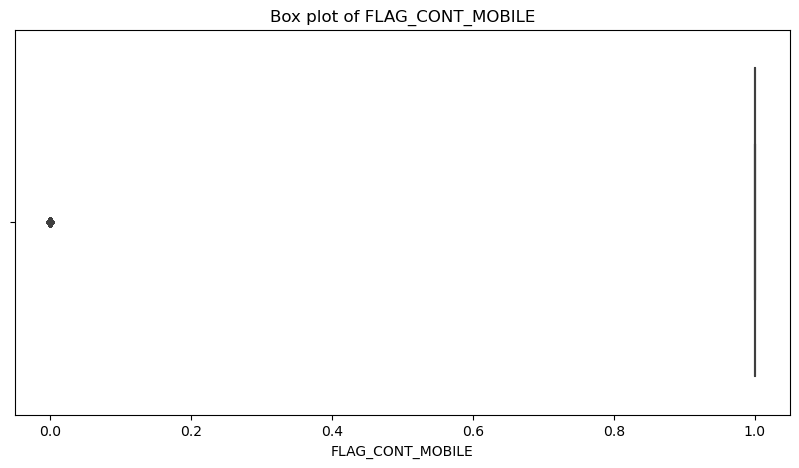

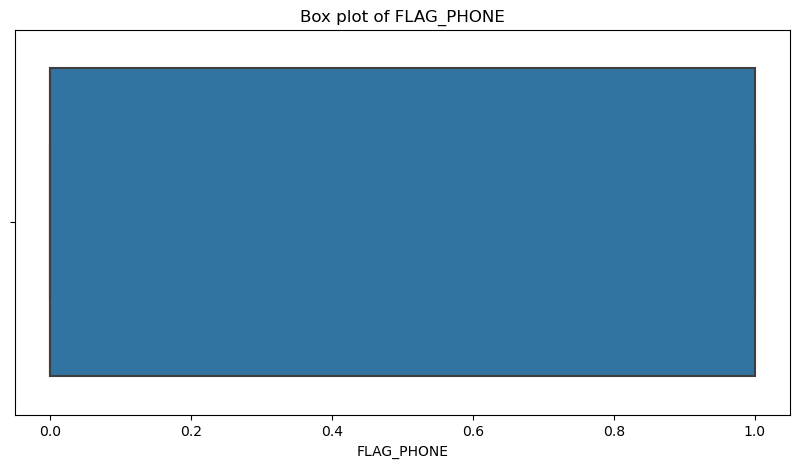

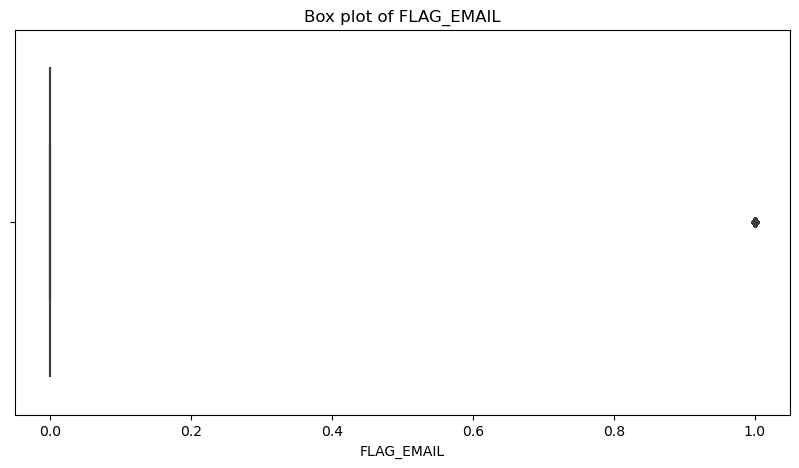

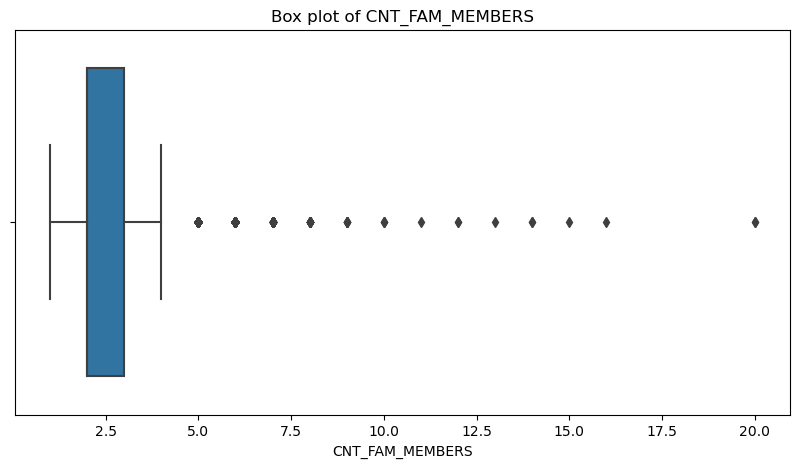

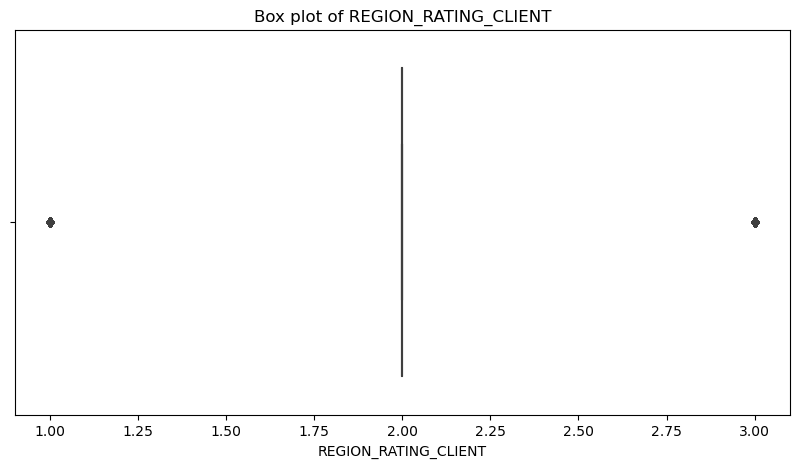

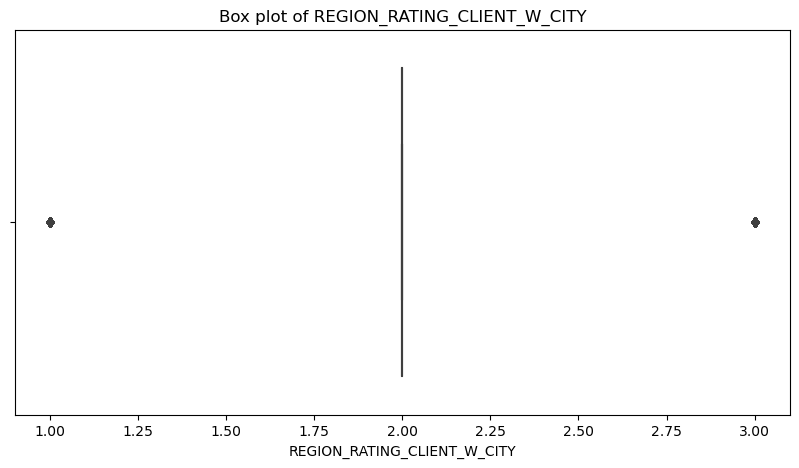

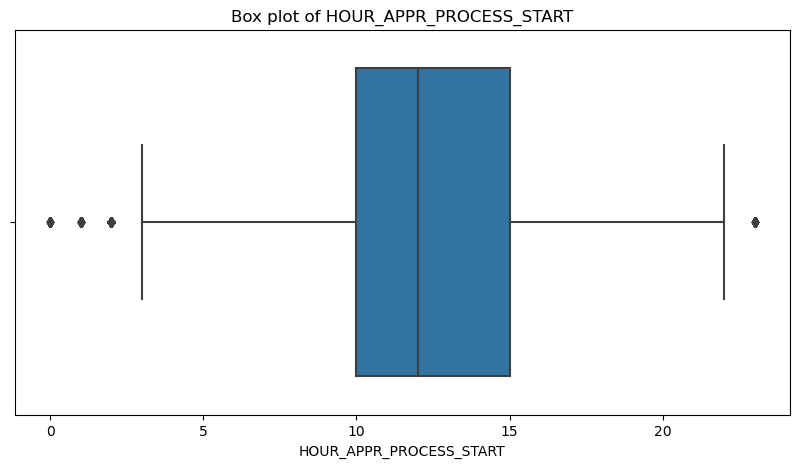

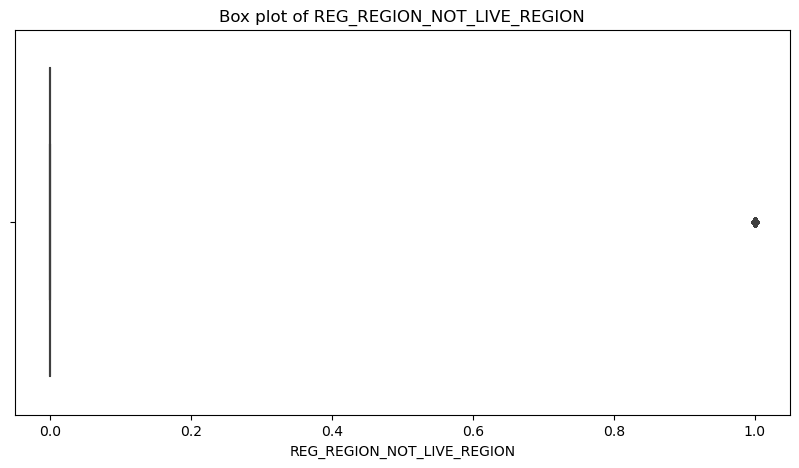

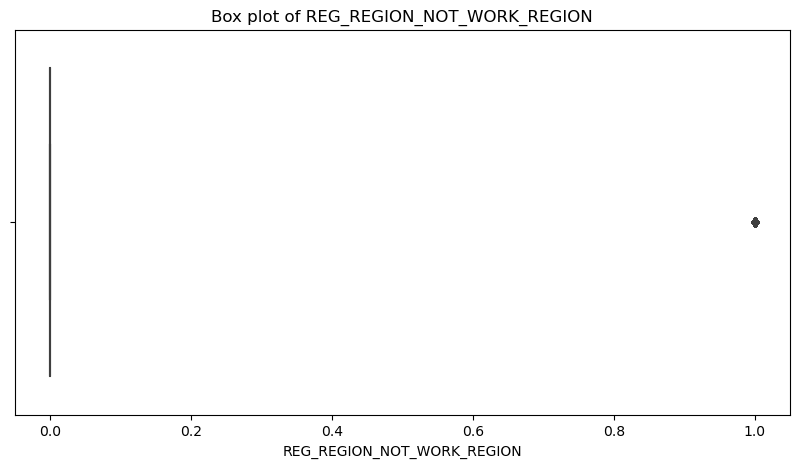

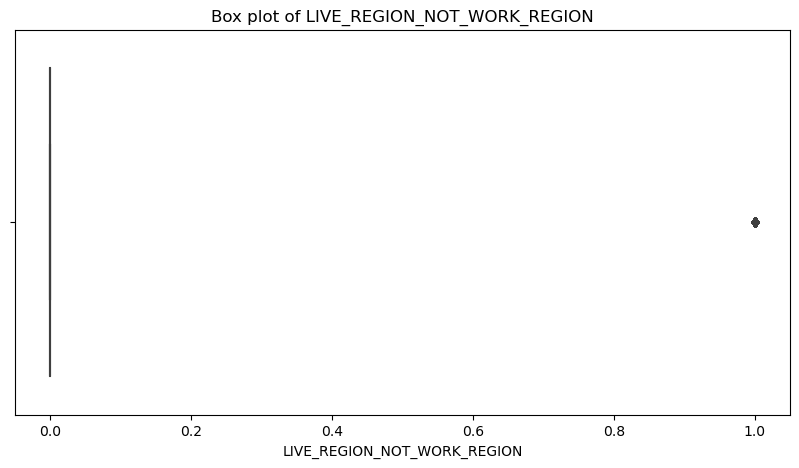

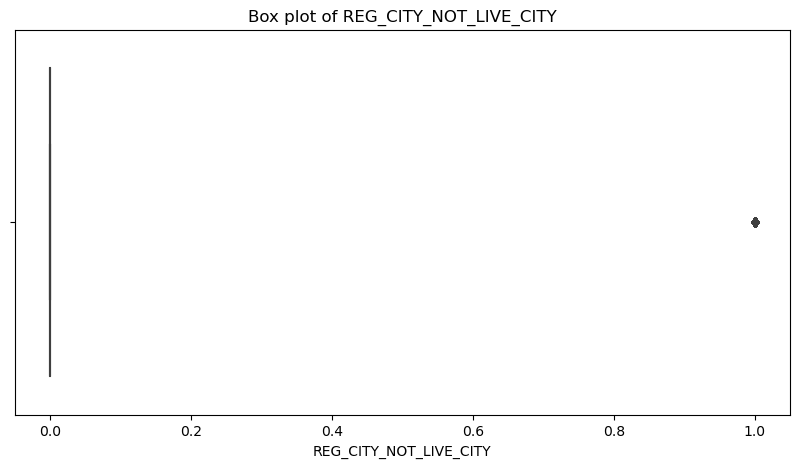

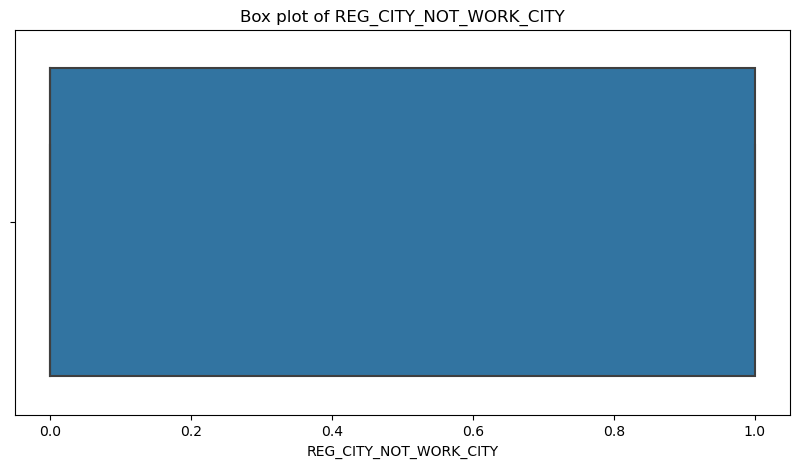

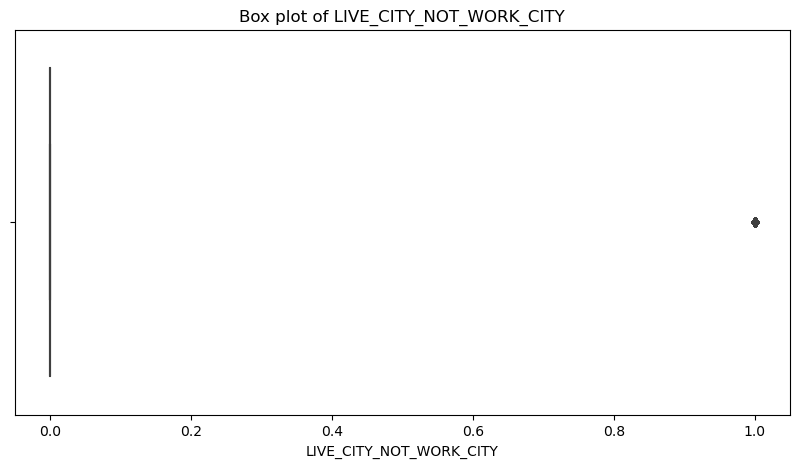

In [36]:
# Checking for outliers in numerical variables using boxplots
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()

for col in num_cols:
    fig, ax = plt.subplots(figsize=(10, 5))
    sns.boxplot(x=col, data=df, ax=ax)
    ax.set_title('Box plot of {}'.format(col))
    plt.show()


### As observed, there are outliers in columns "AMT_INCOME_TOTAL, AMT_CREDIT, AMT_ANNUITY" etc. We can handle these outliers using the IQR method 

In [37]:
#Handling outliers using IQR Method

num_cols = df.select_dtypes(include=[np.number]).columns.tolist()

for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5*IQR
    upper_bound = Q3 + 1.5*IQR
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]


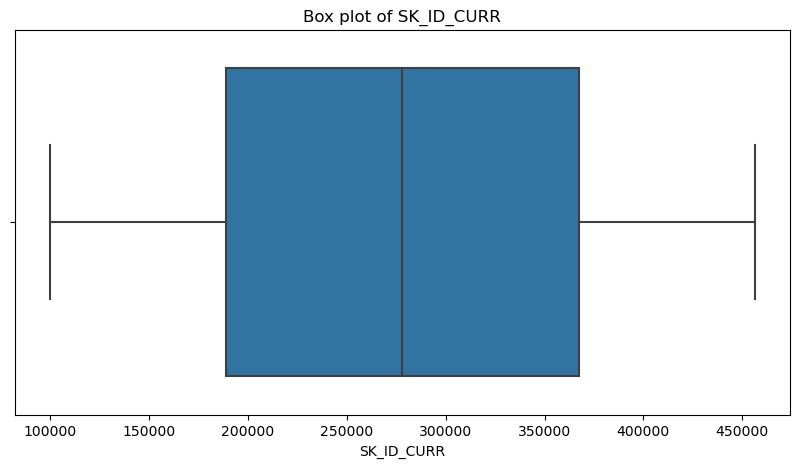

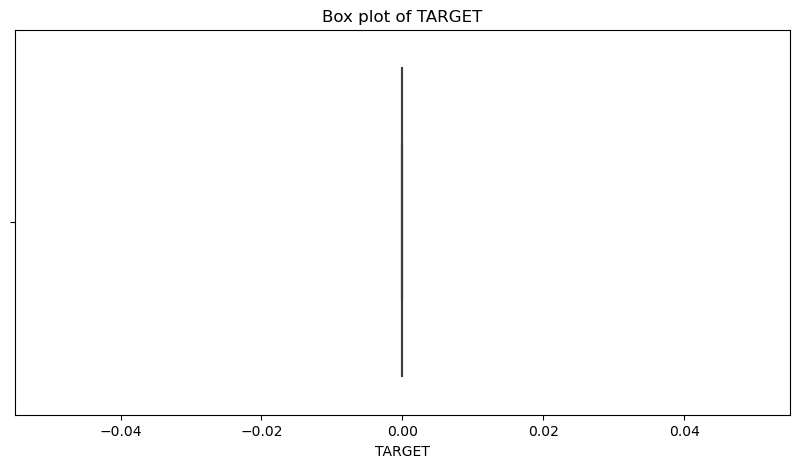

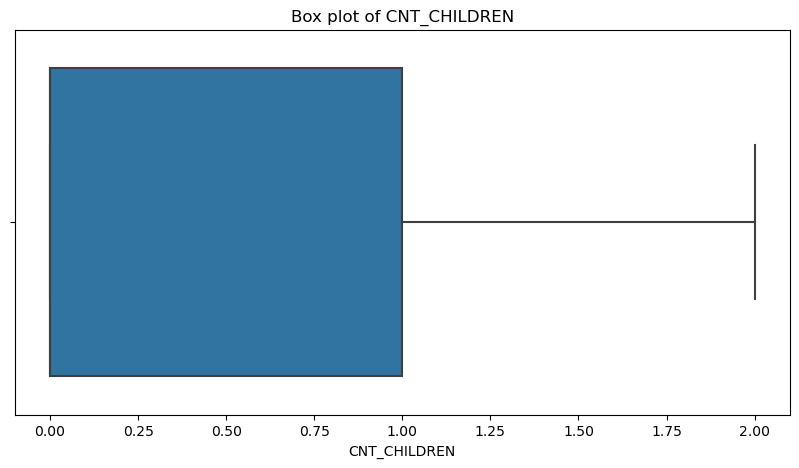

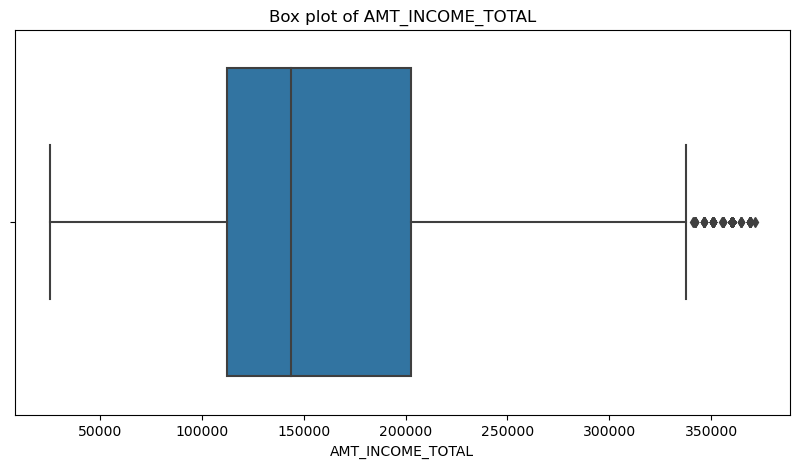

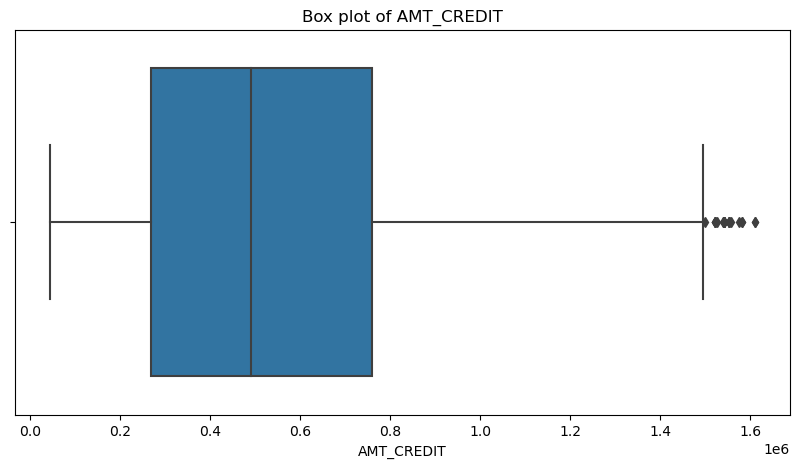

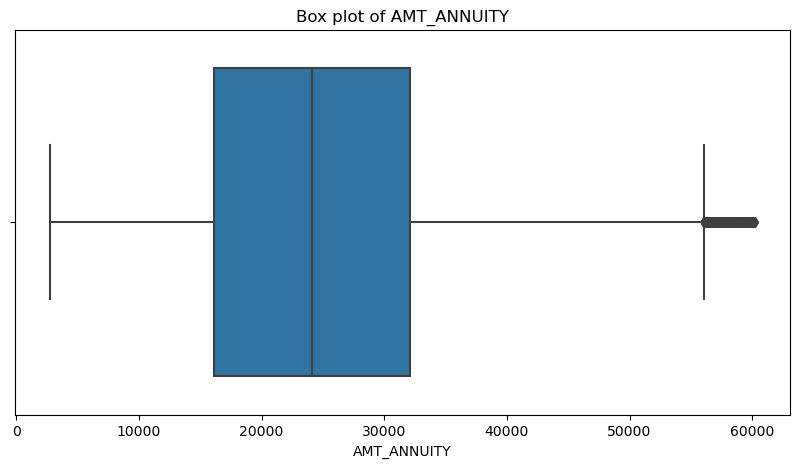

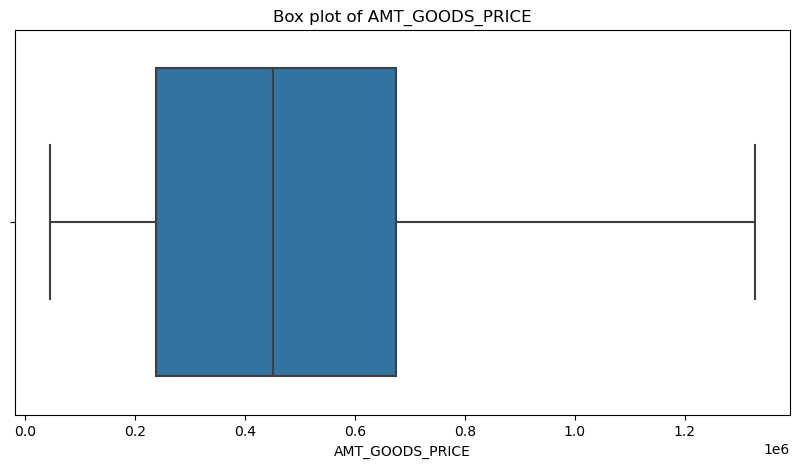

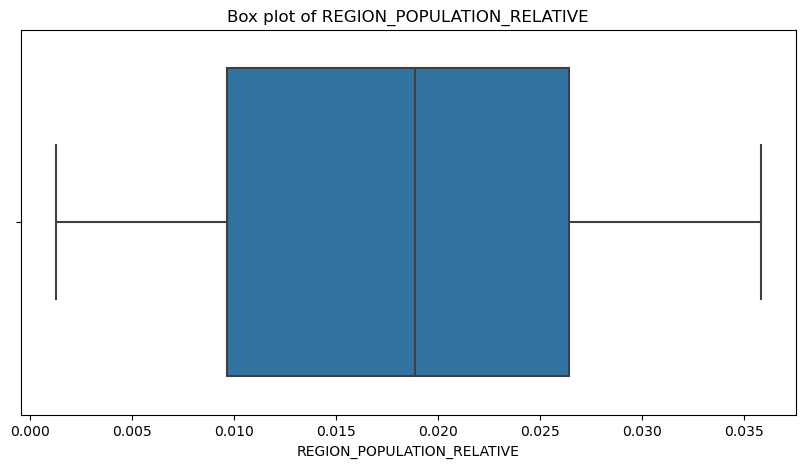

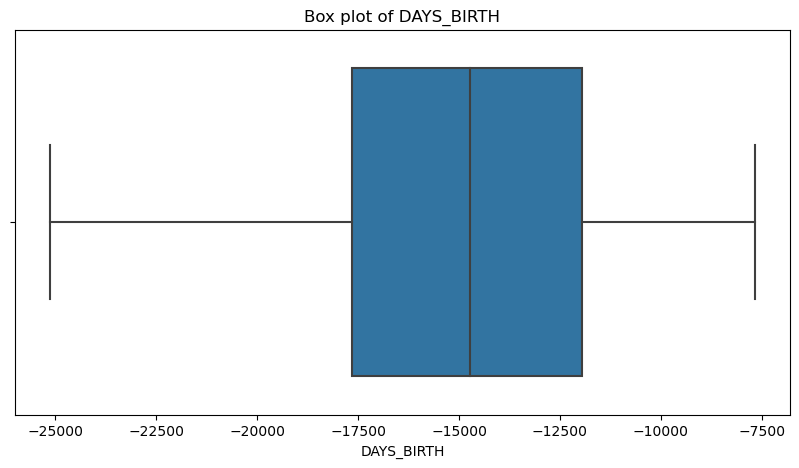

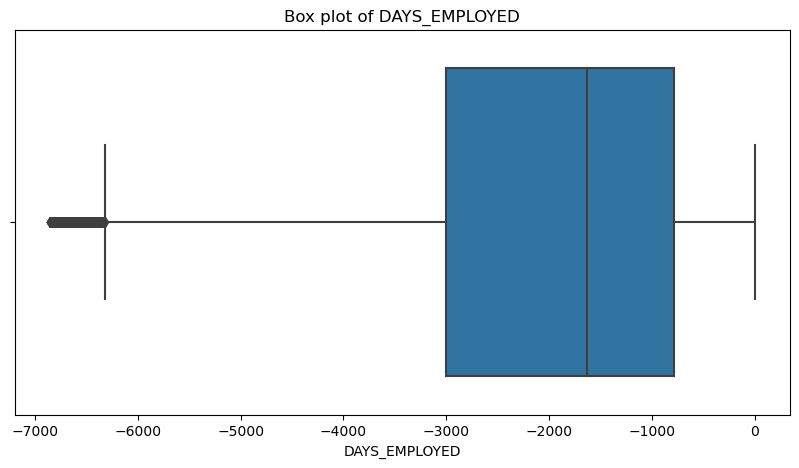

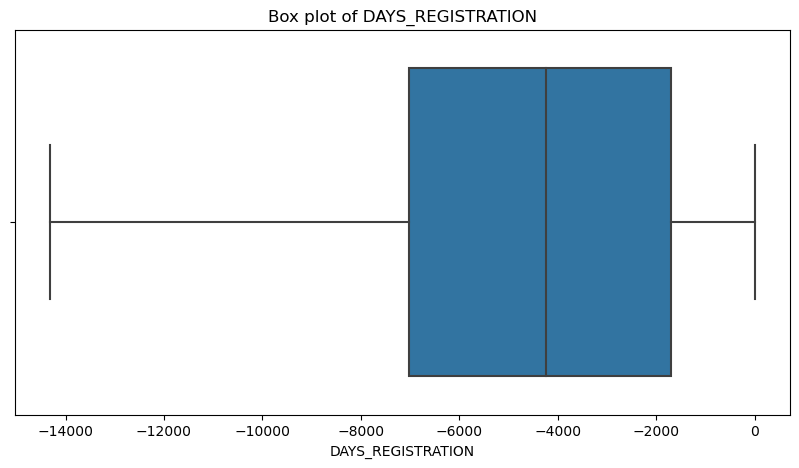

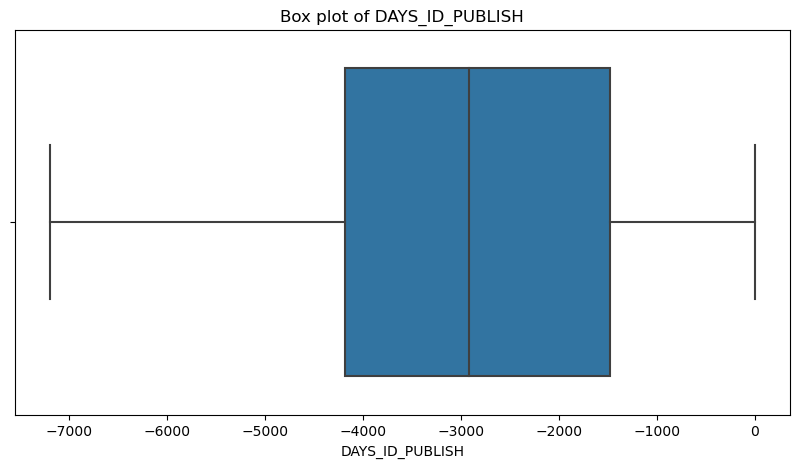

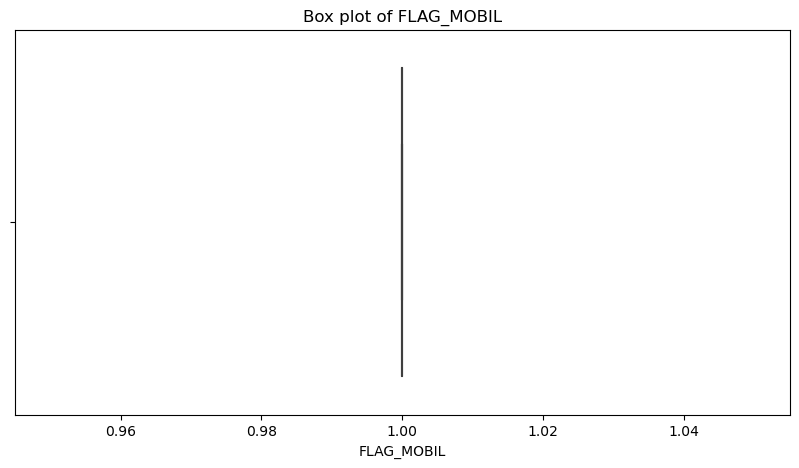

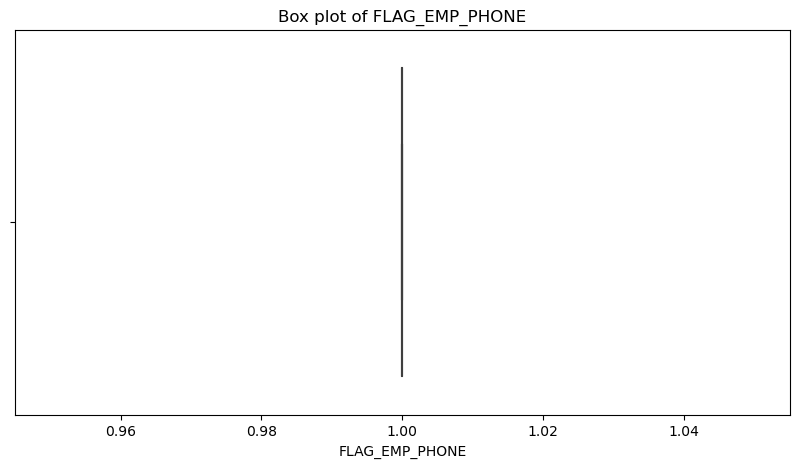

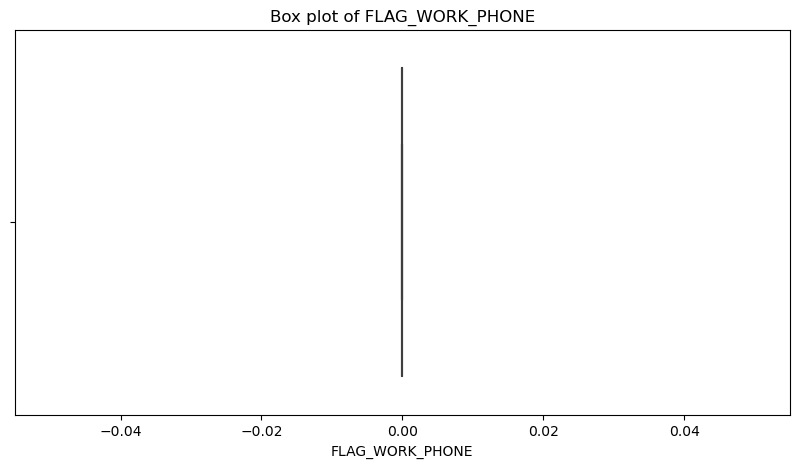

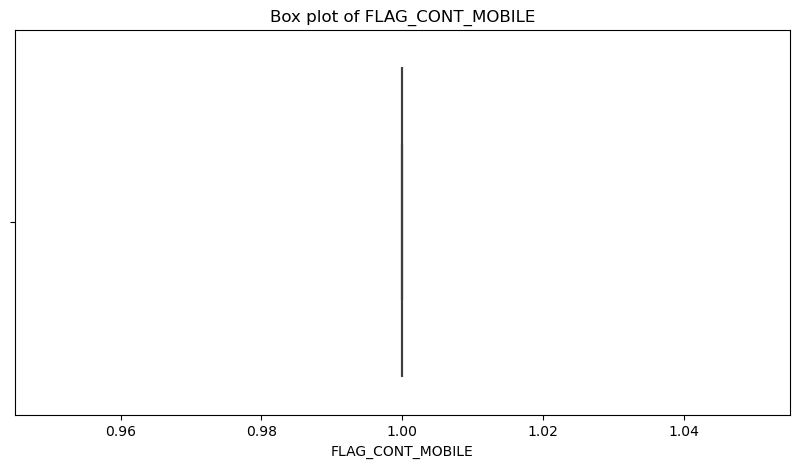

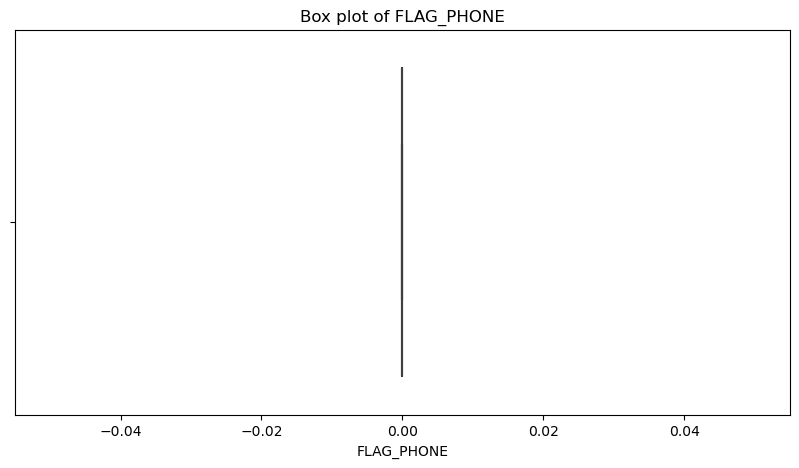

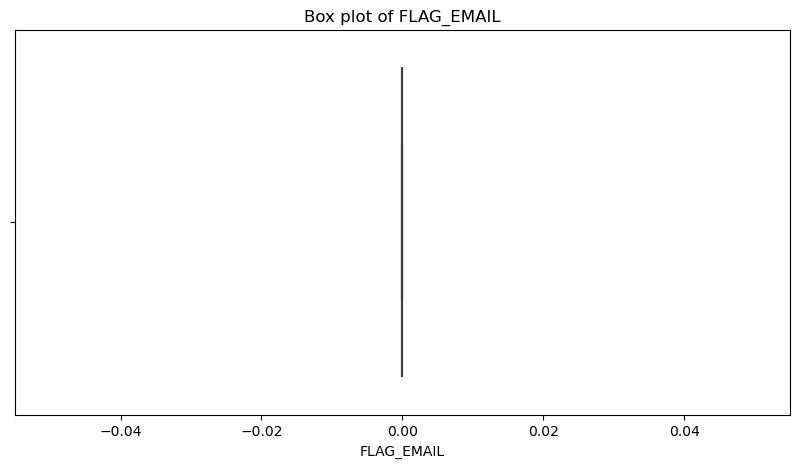

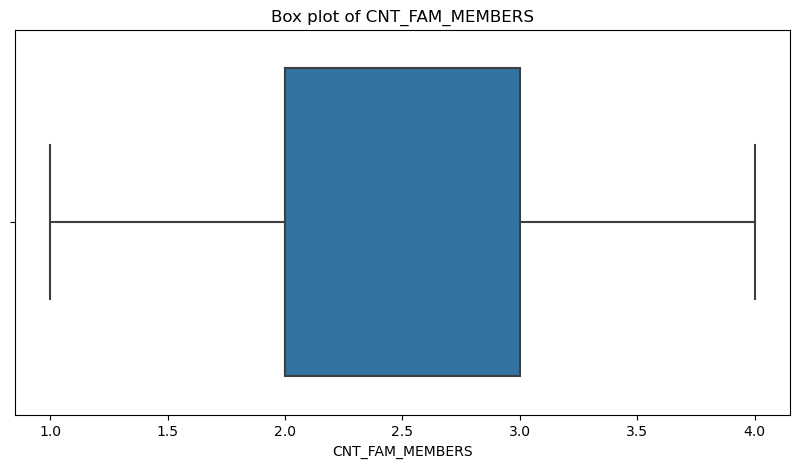

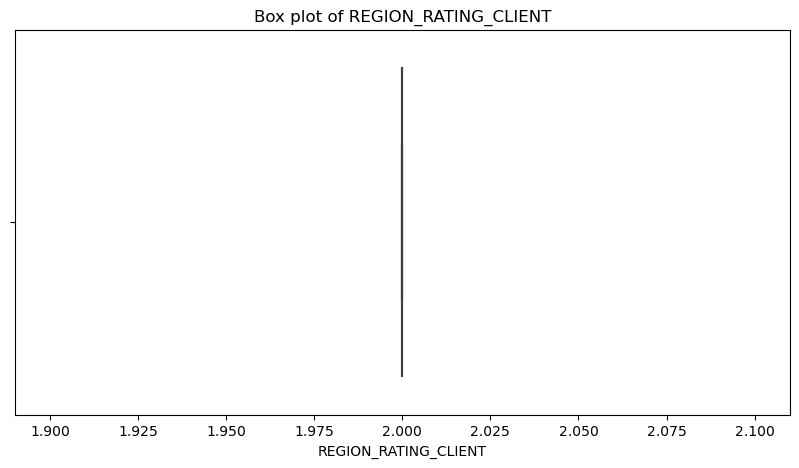

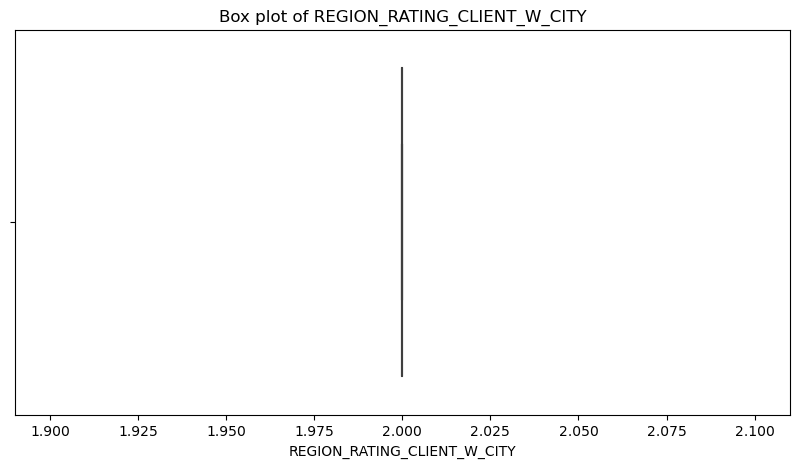

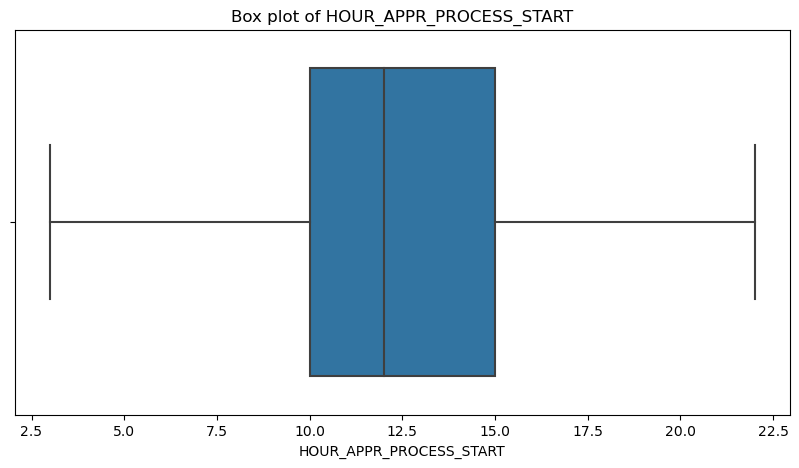

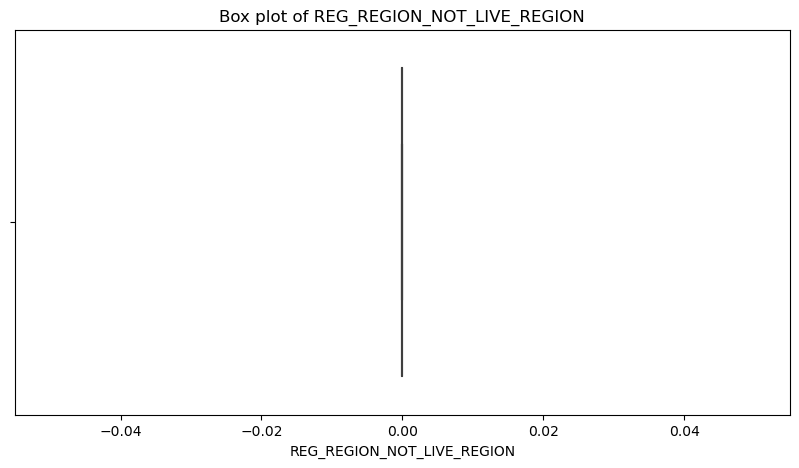

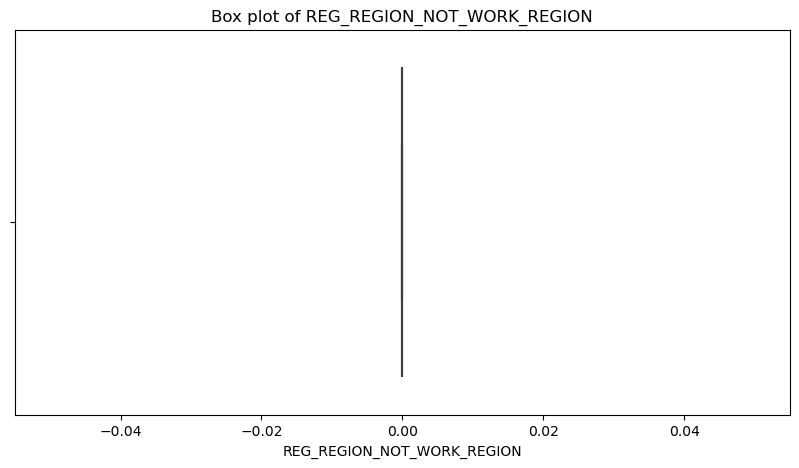

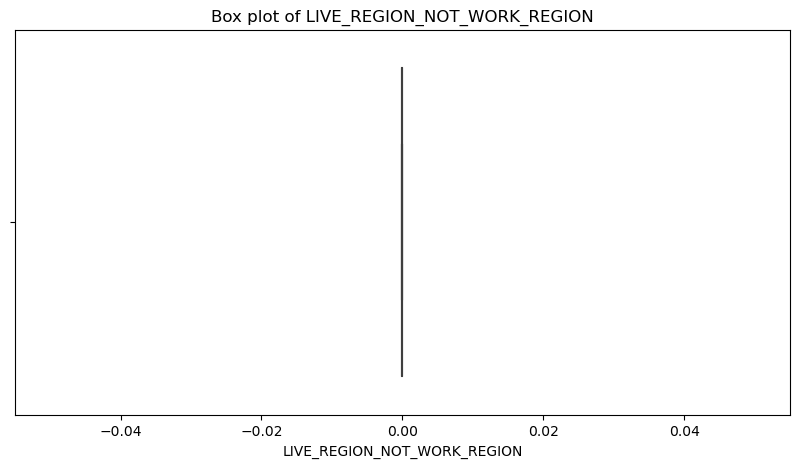

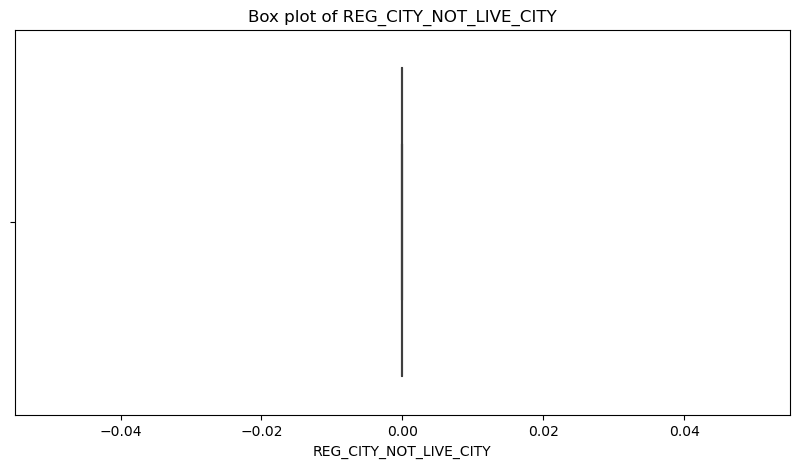

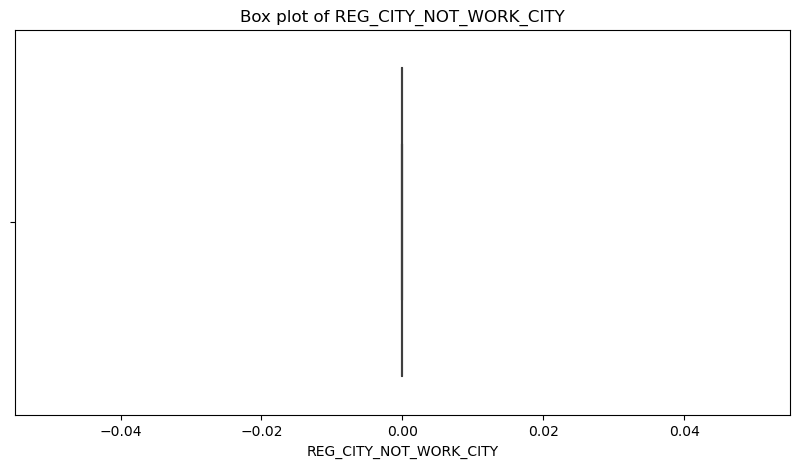

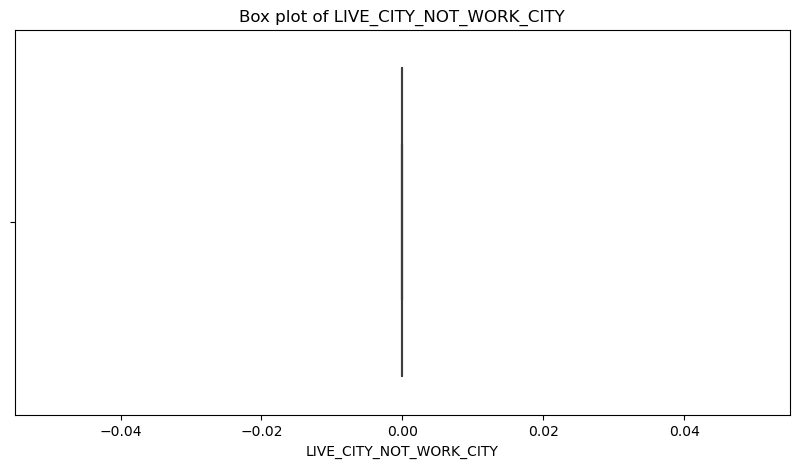

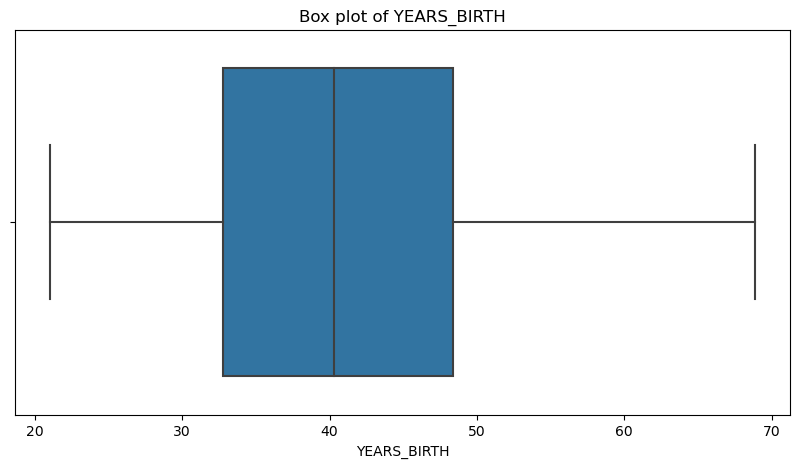

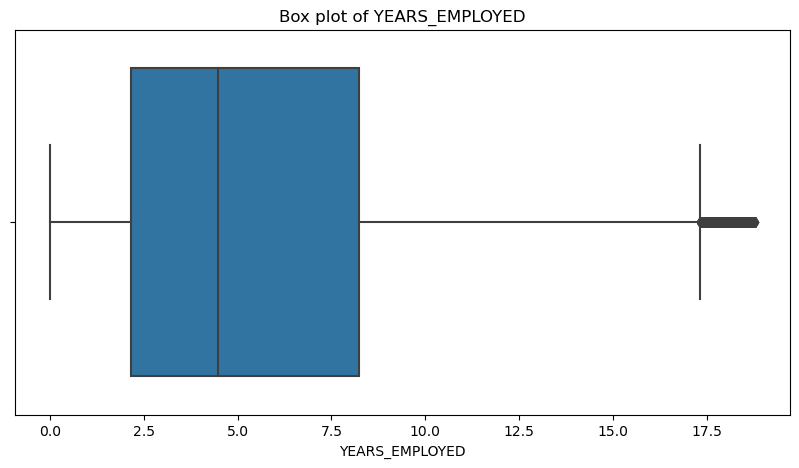

In [64]:
# Checking for outliers in numerical variables using boxplots after handling them

num_cols = df.select_dtypes(include=[np.number]).columns.tolist()

for col in num_cols:
    fig, ax = plt.subplots(figsize=(10, 5))
    sns.boxplot(x=col, data=df, ax=ax)
    ax.set_title('Box plot of {}'.format(col))
    plt.show()

# Univariate Analysis

### Categorical variables

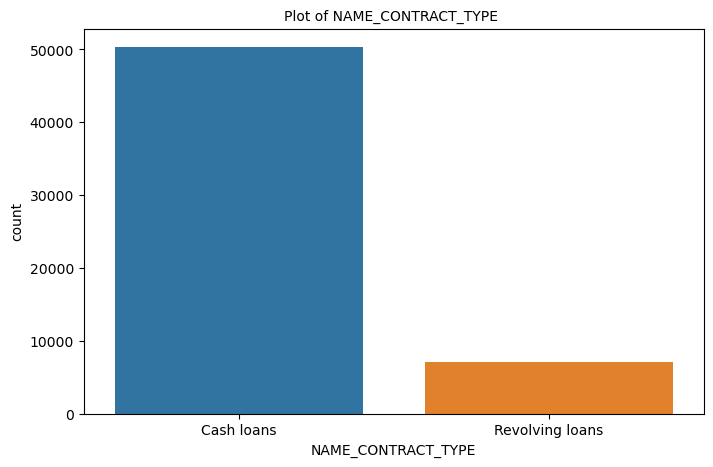

In [39]:
#Studying the "NAME_CONTRACT_TYPE" column
plt.figure(figsize=(8,5))
sns.countplot("NAME_CONTRACT_TYPE", data=df)
plt.title('Plot of NAME_CONTRACT_TYPE ', fontsize = 10)
plt.show()


### We can see in the above countplot that,

### - The count of  cash loan is  quite high on comparison with revolving loans

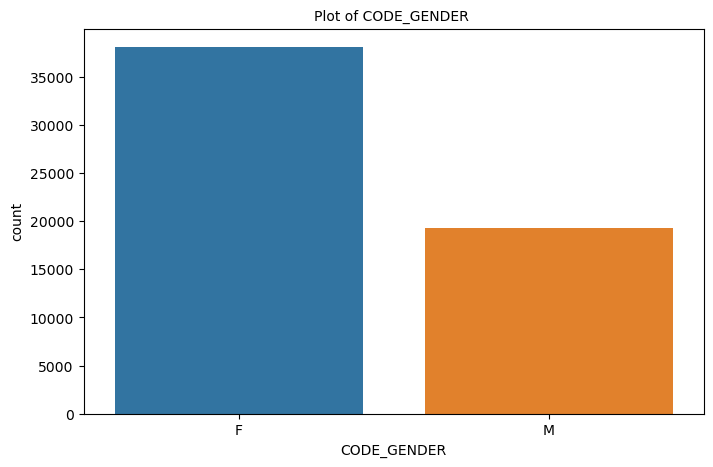

In [40]:
#Studying the "CODE_GENDER" column
plt.figure(figsize=(8,5))
sns.countplot("CODE_GENDER", data=df)
plt.title('Plot of CODE_GENDER ', fontsize = 10)
plt.show()

### In the above plot, majority of the population in the dataset are females with more than 35000 counts.

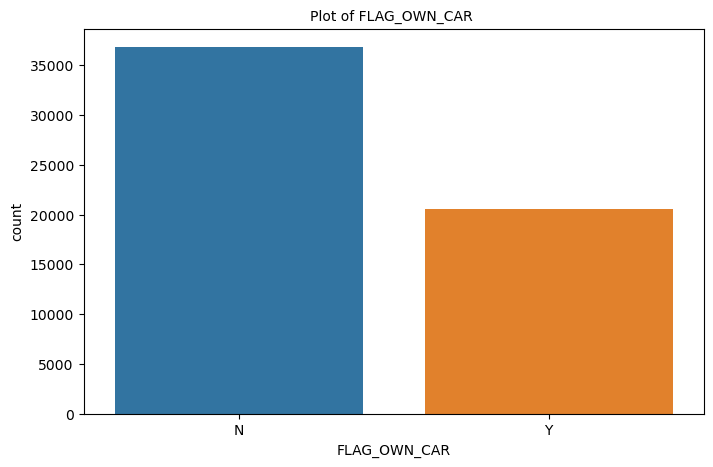

In [41]:
#Studying the "FLAG_OWN_CAR" column
plt.figure(figsize=(8,5))
sns.countplot("FLAG_OWN_CAR", data=df)
plt.title('Plot of FLAG_OWN_CAR ', fontsize = 10)
plt.show()

### In the above plot, majority of the population do not own a car.

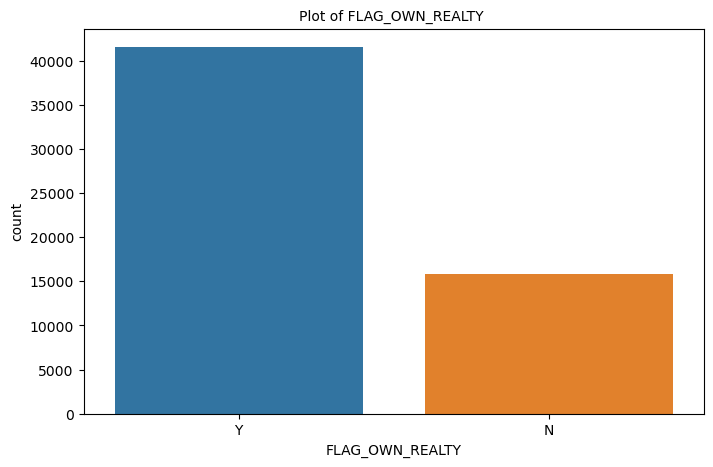

In [42]:
#Studying the "FLAG_OWN_REALTY" column
plt.figure(figsize=(8,5))
sns.countplot("FLAG_OWN_REALTY", data=df)
plt.title('Plot of FLAG_OWN_REALTY ', fontsize = 10)
plt.show()

### In the above plot, we can see that very few people do not own a house or a flat.

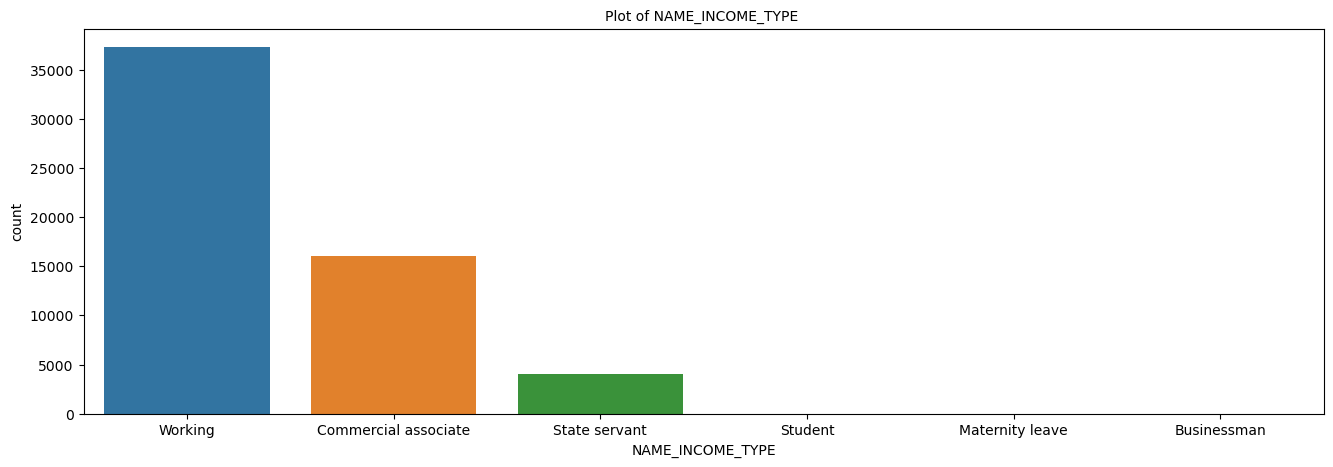

In [43]:
#Studying the "NAME_INCOME_TYPE" column
plt.figure(figsize=(16,5))
sns.countplot("NAME_INCOME_TYPE", data=df)
plt.title('Plot of NAME_INCOME_TYPE ', fontsize = 10)
plt.show()

### Observations from the above plot, 
#### -Majority of the population income type is working and very few of them are State servant. 
#### -There almost negligible student, maternity leave and businessman type income.

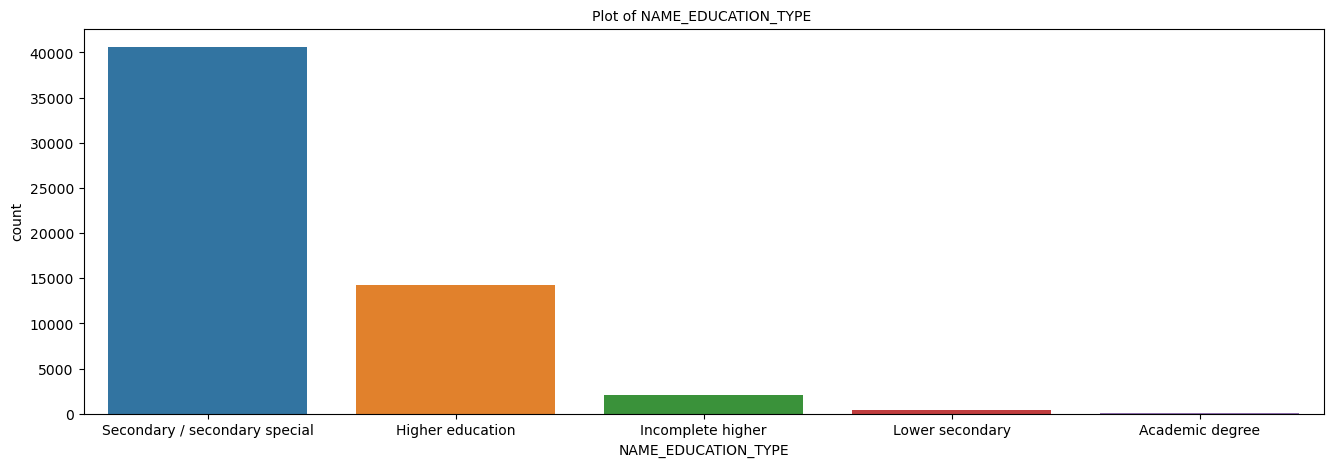

In [44]:
#Studying the "NAME_EDUCATION_TYPE" column
plt.figure(figsize=(16,5))
sns.countplot("NAME_EDUCATION_TYPE", data=df)
plt.title('Plot of NAME_EDUCATION_TYPE ', fontsize = 10)
plt.show()

### In the above plot, majority of the population have achieved secondary school education level with some with higher education

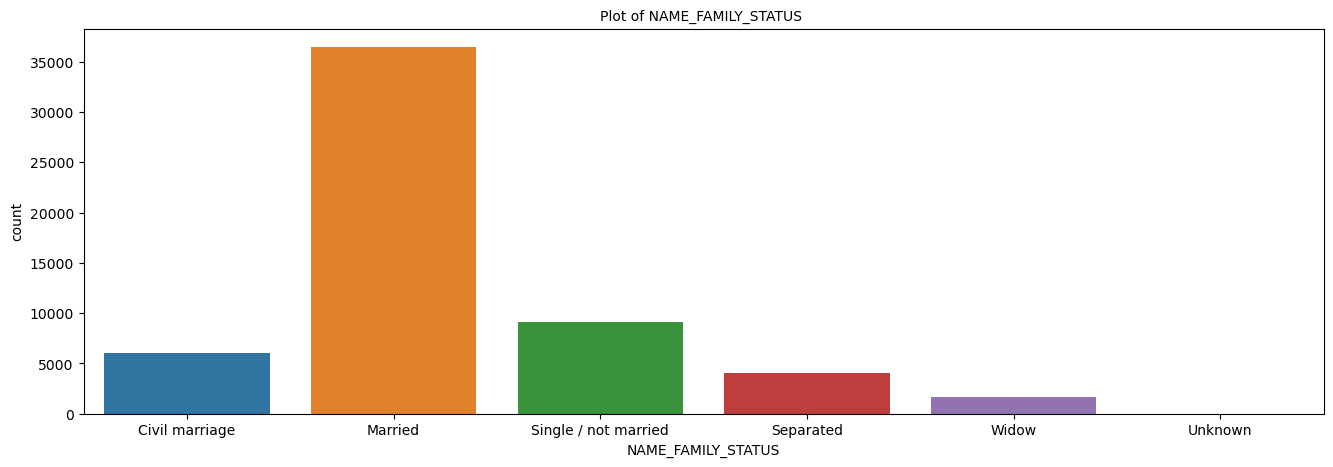

In [45]:
#Studying the "NAME_FAMILY_STATUS" column
plt.figure(figsize=(16,5))
sns.countplot("NAME_FAMILY_STATUS", data=df)
plt.title('Plot of NAME_FAMILY_STATUS ', fontsize = 10)
plt.show()

### In the above plot, we can see that majority of the population is married with some non-married and some with civil marriage

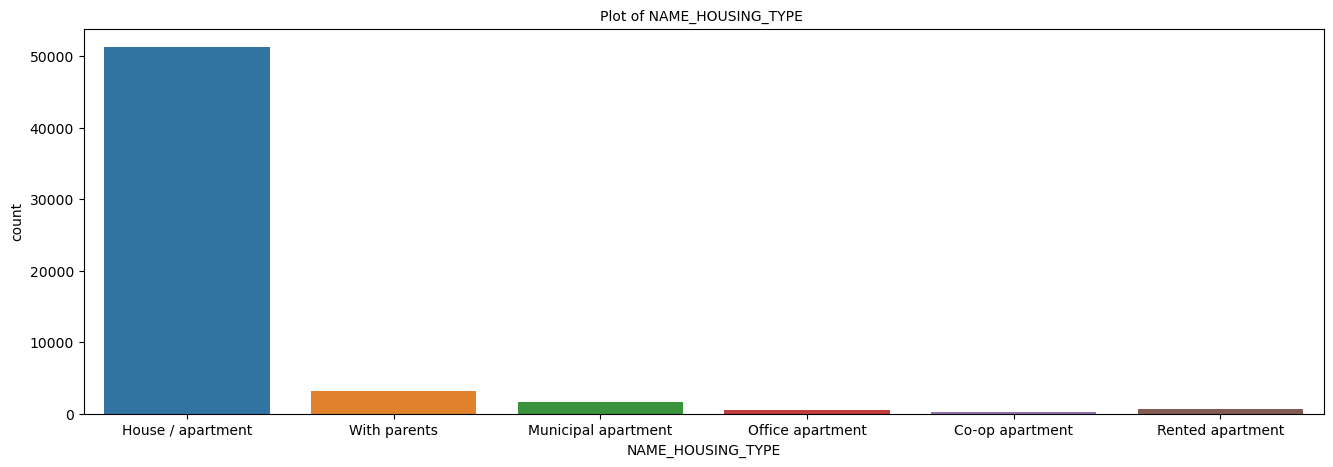

In [46]:
#Studying the "NAME_HOUSING_TYPE" column
plt.figure(figsize=(16,5))
sns.countplot("NAME_HOUSING_TYPE", data=df)
plt.title('Plot of NAME_HOUSING_TYPE ', fontsize = 10)
plt.show()

### In the above plot we can see that majority of the population have their own house/apartnement and some of them live with parents.

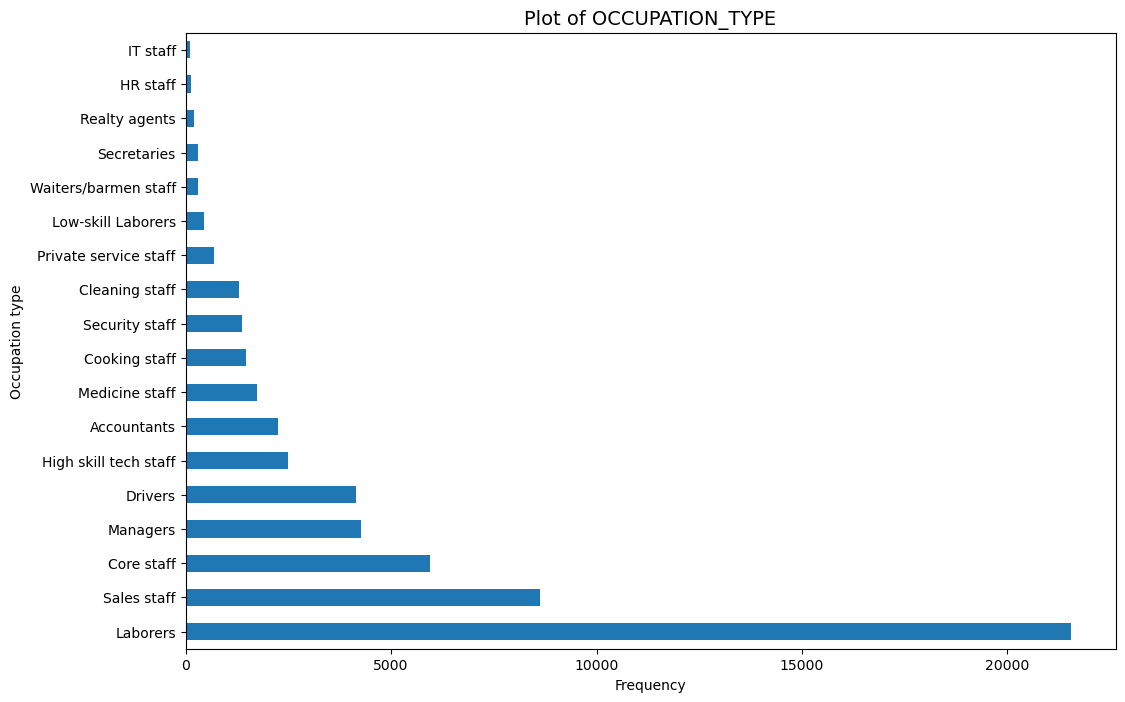

In [47]:
#Studing the "OCCUPATION_TYPE" variable 
plt.figure(figsize = [12,8])
df.OCCUPATION_TYPE.value_counts().plot.barh()
plt.title("Plot of OCCUPATION_TYPE", fontsize = 14)
plt.xlabel("Frequency")
plt.ylabel("Occupation type")
plt.show()

### In the above plot, we can observe that majority of the population are laborers, followed by Sales Staff and Core staff.

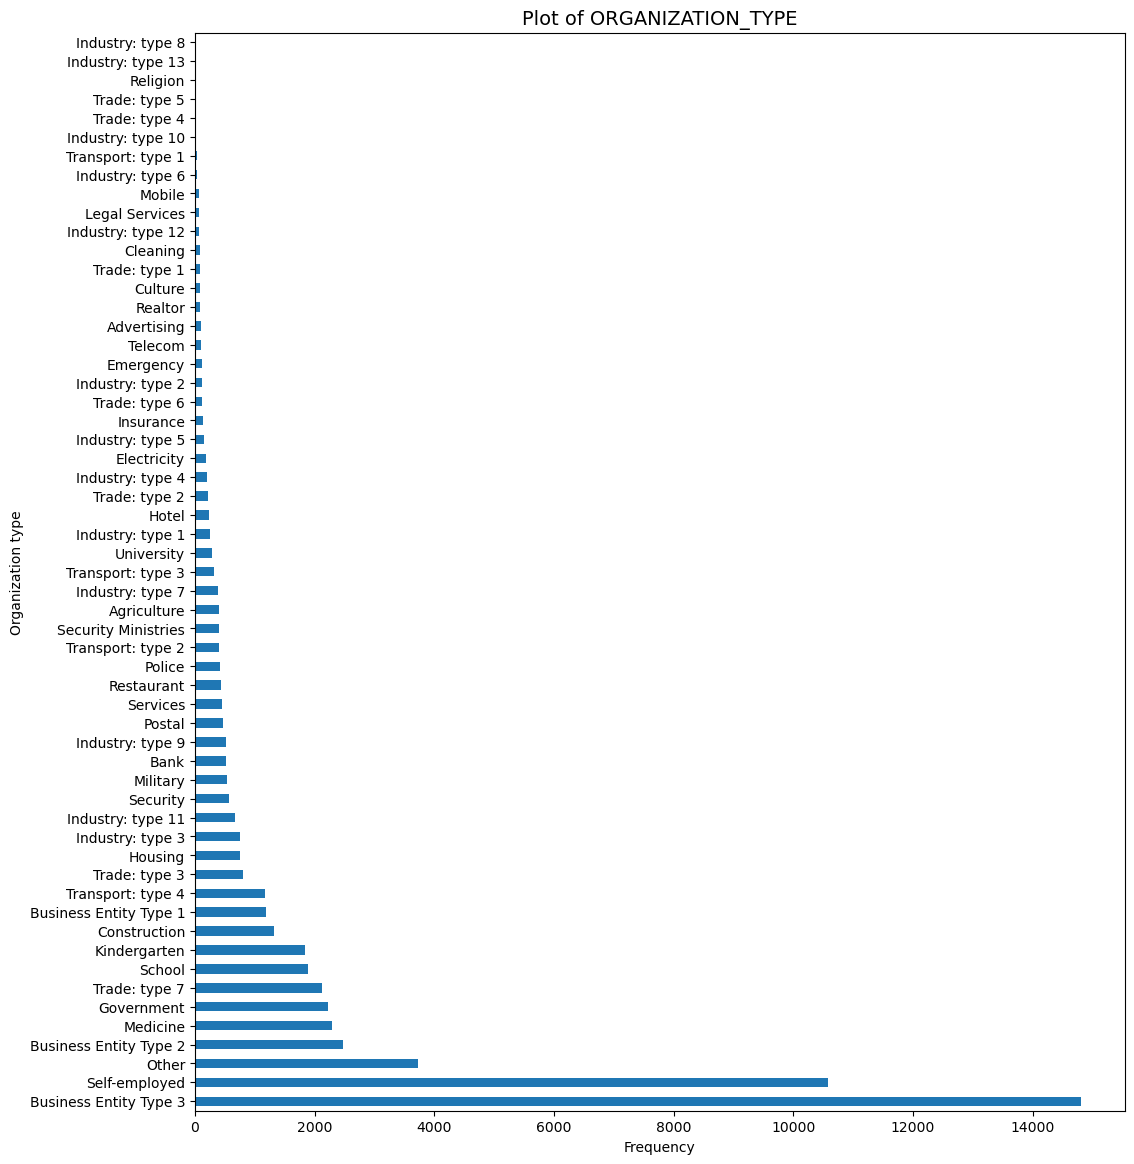

In [48]:
#Studing the "ORGANIZATION_TYPE" variable 
plt.figure(figsize = [12,14])
df.ORGANIZATION_TYPE.value_counts().plot.barh()
plt.title("Plot of ORGANIZATION_TYPE", fontsize = 14)
plt.xlabel("Frequency")
plt.ylabel("Organization type")
plt.show()

### In the above plot, we can observe that majority of the population work at Business Enrity Type 3 and the next highest number of clients are self employed  followed by others.

## Univariate Analysis
### Numeric Variables

### We can see that the columns "DAYS_BIRTH" and "DAYS_EMPLOYED" contain negative value as these days are before the application process so the conversion is done by dividing the days by total days in a year

In [49]:
# Converted DAYS_BIRTH to years
df['YEARS_BIRTH'] = abs(df['DAYS_BIRTH']) / 365

# Converted DAYS_EMPLOYED to years
df['YEARS_EMPLOYED'] = abs(df['DAYS_EMPLOYED']) / 365

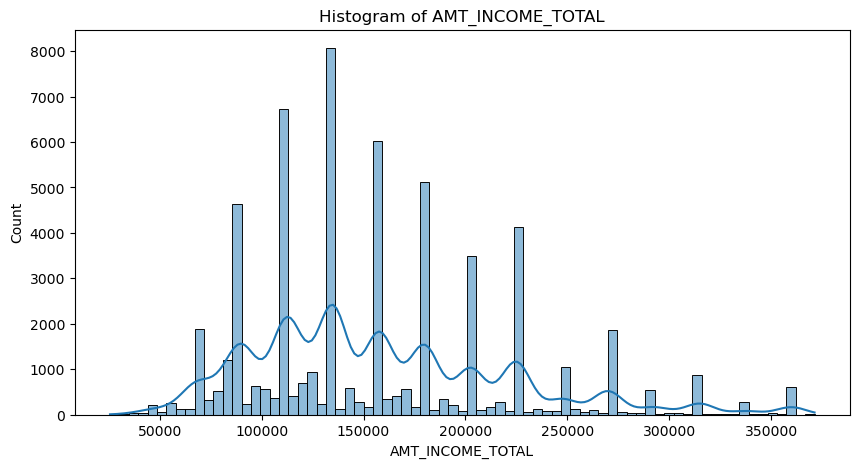

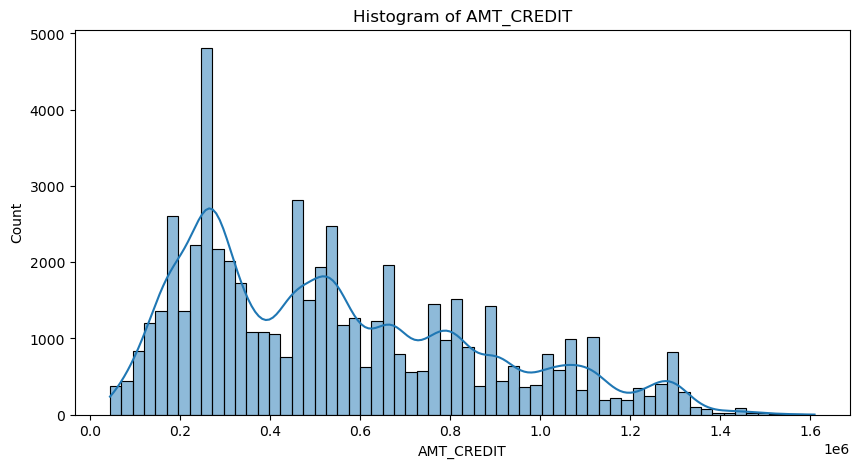

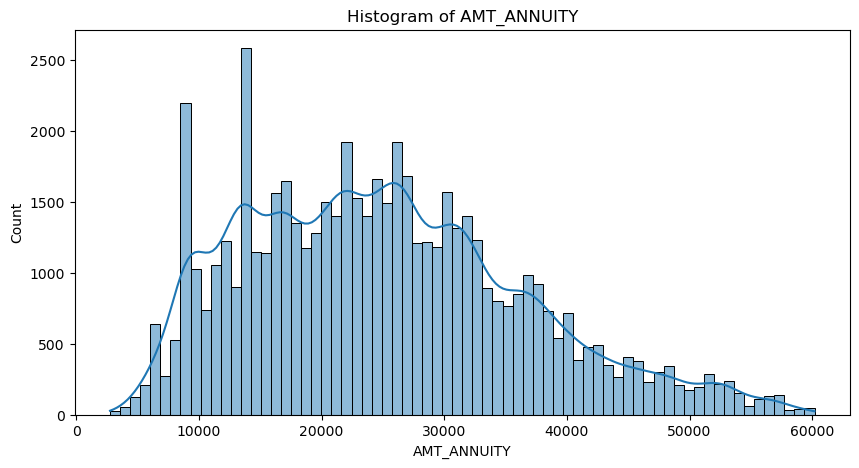

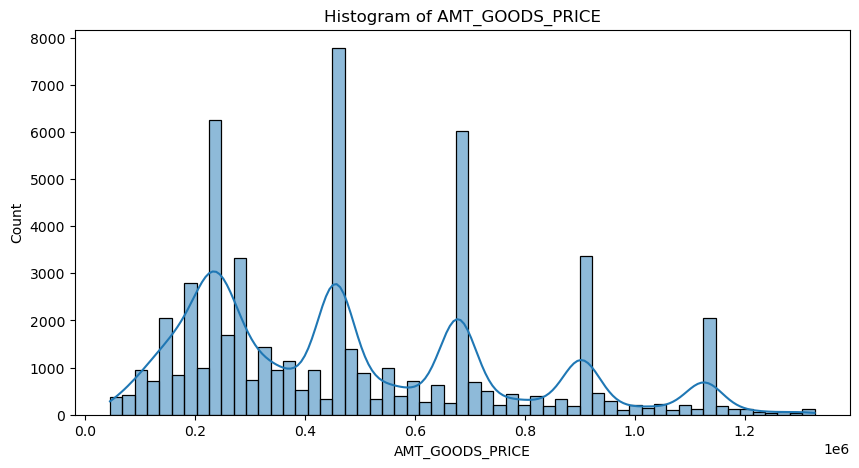

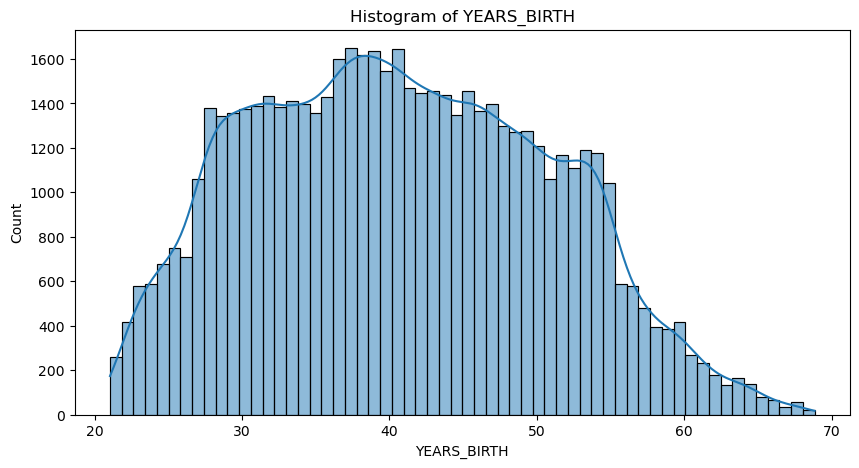

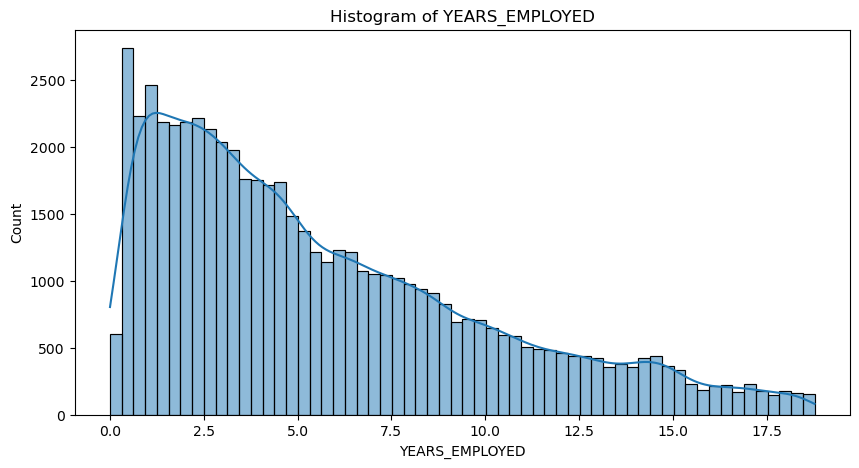

In [50]:
# Plotting histograms for numerical variables
num_cols = ["AMT_INCOME_TOTAL", "AMT_CREDIT", "AMT_ANNUITY","AMT_GOODS_PRICE","YEARS_BIRTH","YEARS_EMPLOYED"]

for col in num_cols:
    plt.figure(figsize=(10,5))
    sns.histplot(x=col, data=df, kde=True)
    plt.title('Histogram of {}'.format(col))
    plt.show()

### From the above histograms we can observe that:
#### -There is some degree of skewness in the variables "AMT_CREDIT" and "AMT_INCOME_TOTAL"
#### -Few of the clients have high income else count of lower income people is more distributed
#### -Majority of the clients are taking less credit amount which is reflected by higher counts
#### -For consumer loans the price of goods for which the loan given is fluctuating a lot.
#### -Majority of  the clients are of the age of 30 to 55 at the time of application.
#### -Majority of the clients have been working for 0 to 7.5 years at the time of application.

# Bivariate Analysis

### Income of the client vs Credit amount

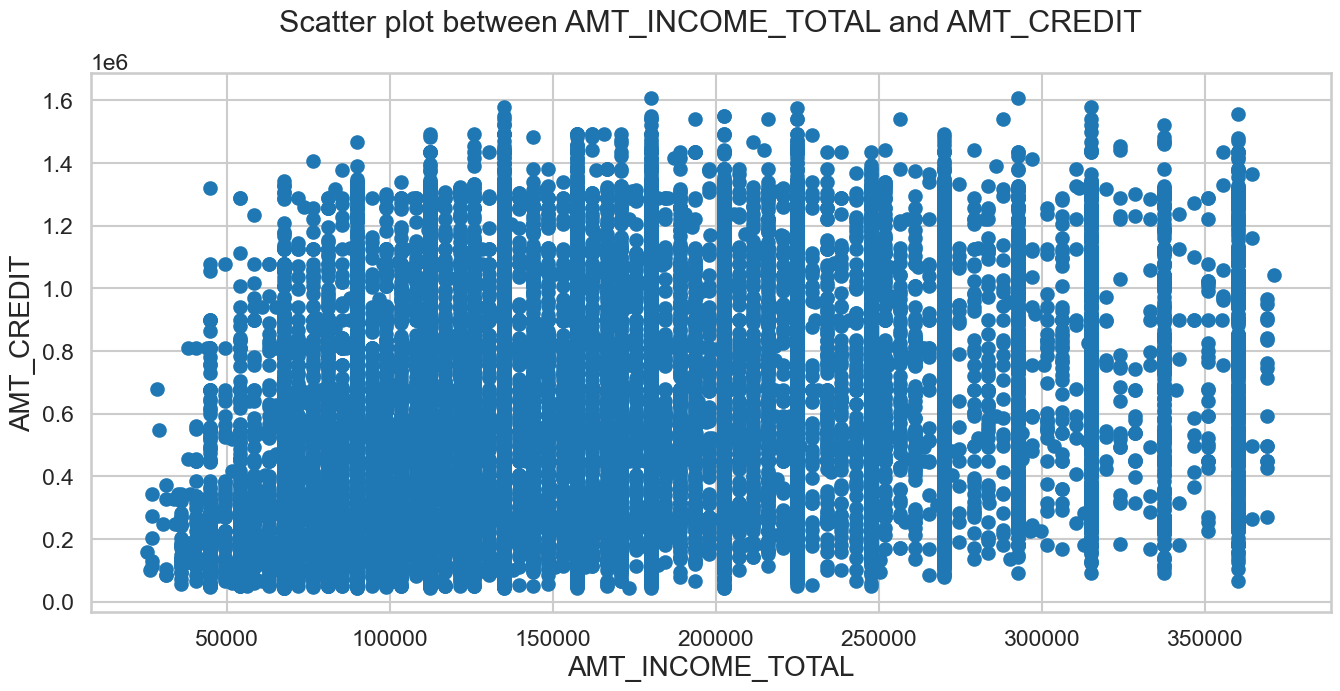

In [154]:
#Studying the variables using scatter plot

plt.figure(figsize= [16,7])
plt.scatter(df["AMT_INCOME_TOTAL"], df["AMT_CREDIT"])
plt.title("Scatter plot between AMT_INCOME_TOTAL and AMT_CREDIT")
plt.xlabel("AMT_INCOME_TOTAL")
plt.ylabel("AMT_CREDIT")
plt.show()


<Figure size 1600x800 with 0 Axes>

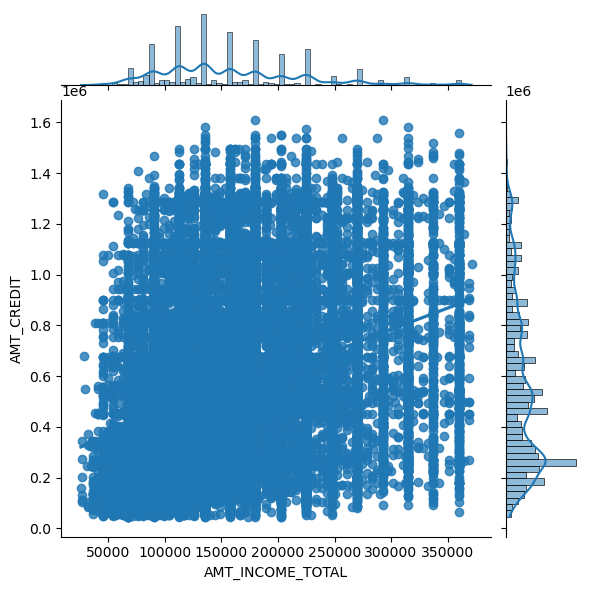

In [52]:
plt.figure(figsize = [16,8])
sns.jointplot(df["AMT_INCOME_TOTAL"], df["AMT_CREDIT"],kind= "reg")
plt.xlabel("AMT_INCOME_TOTAL")
plt.ylabel("AMT_CREDIT")
plt.show()

### From the above scatter and joint plots, it can be observed that:
#### -Clients with income between 60000 to 250000 are taking amount of credit in the range i.e. 0.3 to 1.4
#### -As income increases the credit amount is quite scattered and clients are taking credit from 0.4 to 1.4
#### -Density of the plot is more towards lower income and lower credit amount

### Years of employment vs Income of the client

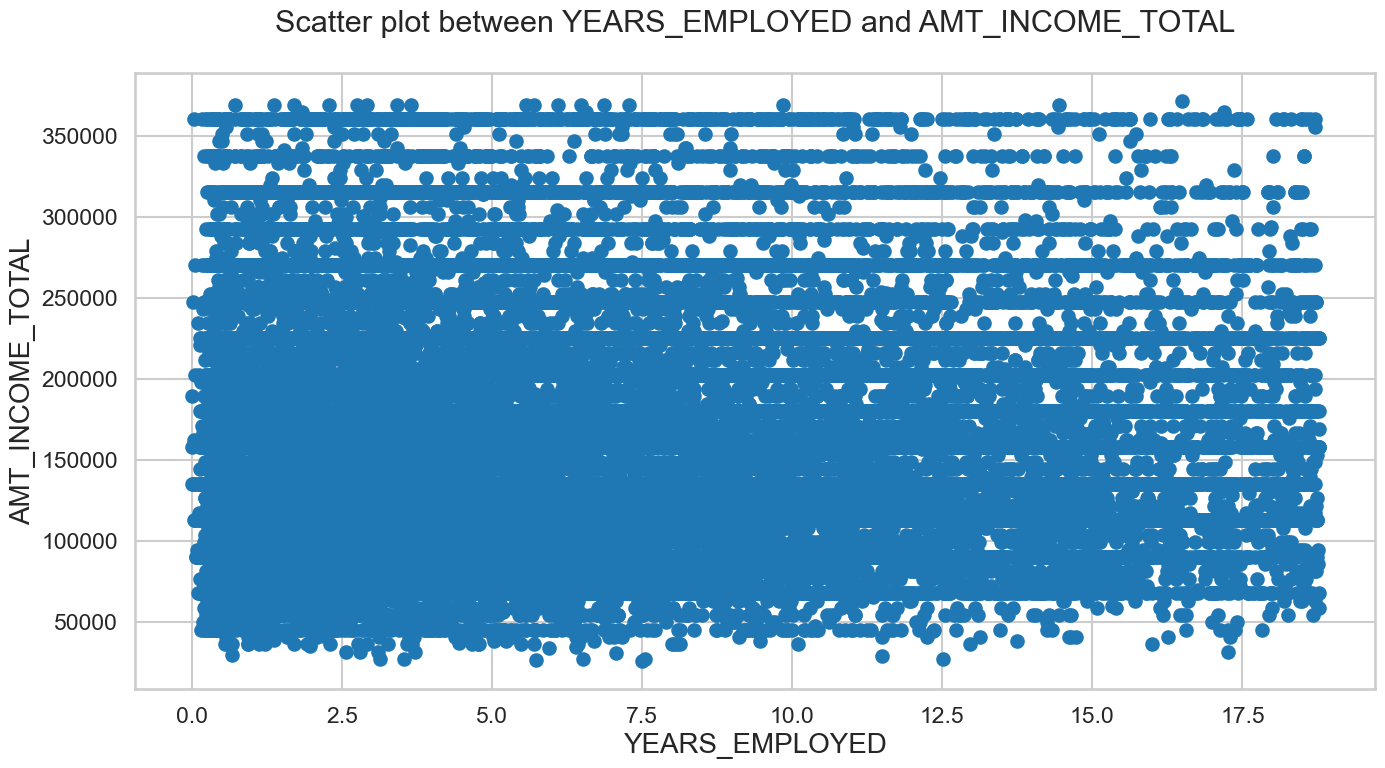

In [155]:
#Studying the relation between years of employment and income of the client
plt.figure(figsize=(16,8))
plt.scatter(df["YEARS_EMPLOYED"], df["AMT_INCOME_TOTAL"])
plt.title("Scatter plot between YEARS_EMPLOYED and AMT_INCOME_TOTAL")
plt.xlabel("YEARS_EMPLOYED")
plt.ylabel("AMT_INCOME_TOTAL")
plt.show()

### From the above plot, it can be observed that:
#### -Most of the points in the plot are concentrated towards the lower end of the income scale and the lower end of the years employed scale. This could mean that most loan applicants have relatively low income and employment tenure.

### Credit Amount vs Occupation type

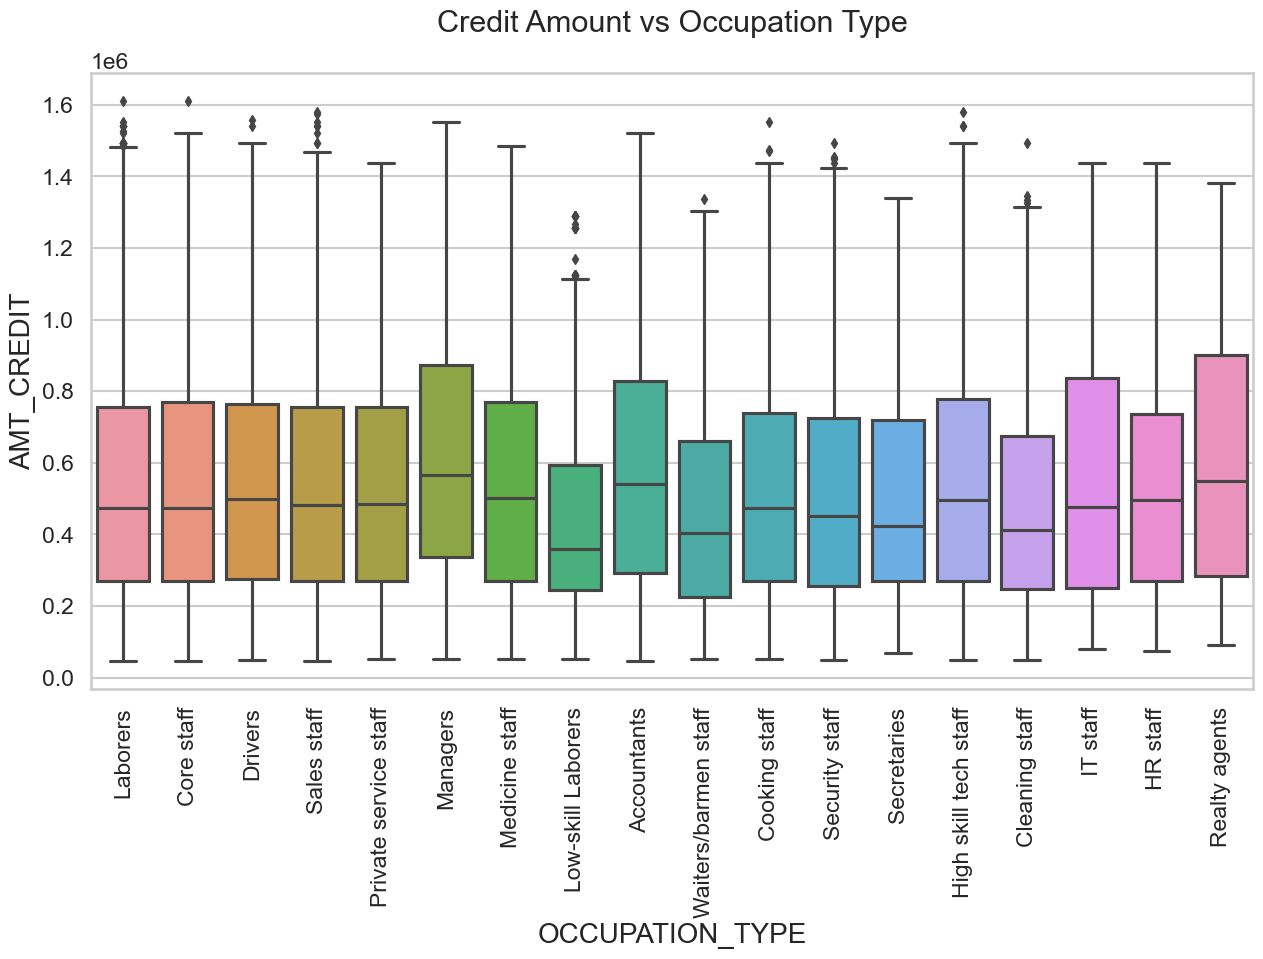

In [139]:
#Studying the variables credit amount vs occupation type

plt.figure(figsize=(15, 8))
sns.boxplot(x='OCCUPATION_TYPE', y='AMT_CREDIT', data=df)
plt.xticks(rotation=90)
plt.title('Credit Amount vs Occupation Type')
plt.show()


### Observations from the above plot:
#### -The accountants have the highest median value of the credit amount
#### -Some occupation types, such as "Managers", "Medical staff have a wider distribution of credit amounts , suggesting that credit amounts for these occupation types can vary widely.
#### -On observing laborers, there are some outliers, although the median  value being low but they have some good amount of credit amount

### Housing type vs Income of the client 

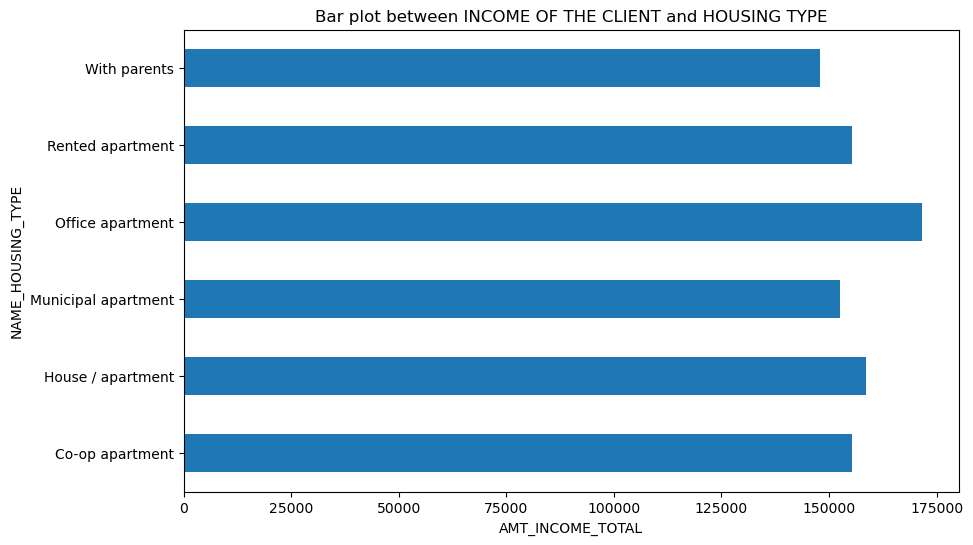

In [55]:
#Studying the variables housing type and income 

plt.figure(figsize = [10,6])
df.groupby(["NAME_HOUSING_TYPE"])["AMT_INCOME_TOTAL"].mean().plot.barh()
plt.title("Bar plot between INCOME OF THE CLIENT and HOUSING TYPE" )
plt.xlabel("AMT_INCOME_TOTAL")
plt.ylabel("NAME_HOUSING_TYPE")
plt.show()


### Observations from the above plot:
#### -Clients living in office apartment have the highest income followed by  rented apartment and people who own a house.

### Education type vs Income of the client

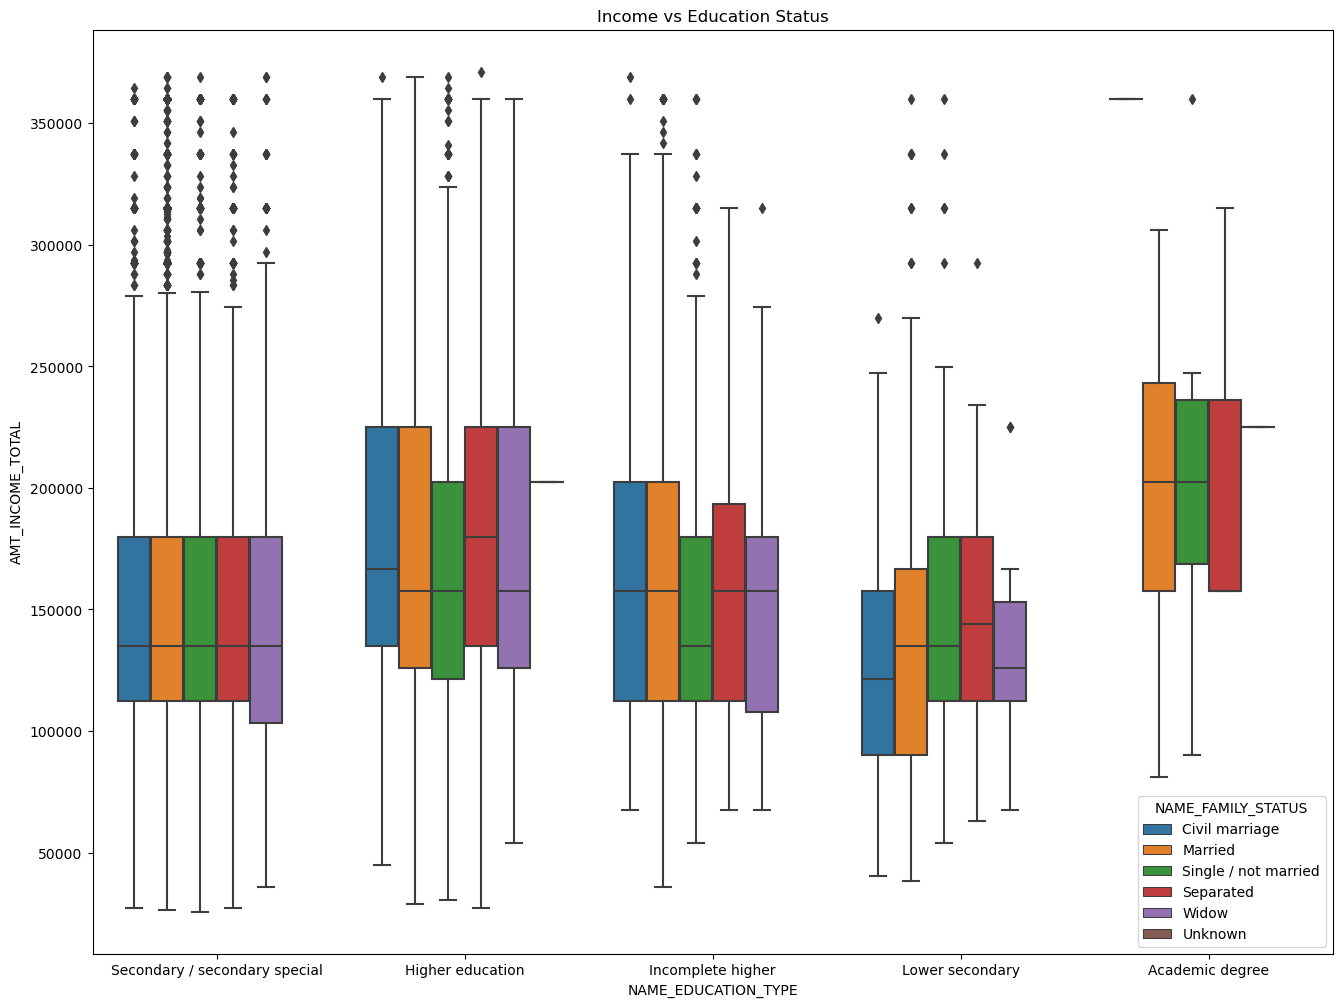

In [56]:
#Studying the relationship bewtween Education type and the income of the client

plt.figure(figsize=(16,12))
plt.xticks()
sns.boxplot(data =df, x='NAME_EDUCATION_TYPE',y='AMT_INCOME_TOTAL', hue ='NAME_FAMILY_STATUS',orient='v')
plt.title('Income vs Education Status')
plt.show()

### Observations from the above plot:
#### -The median income of academic degree clients is higher than the rest of the edcaution type clients
#### -Married clients have almost highest income in all education types
#### -Single clients have the almost the lowest income in all education types
#### -Civil marriage clients median income is almost similar to married clients with their income on a lower side
#### -Higher education clients in all family status have the highest income among the educatio types

### Credit amount VS Education Type

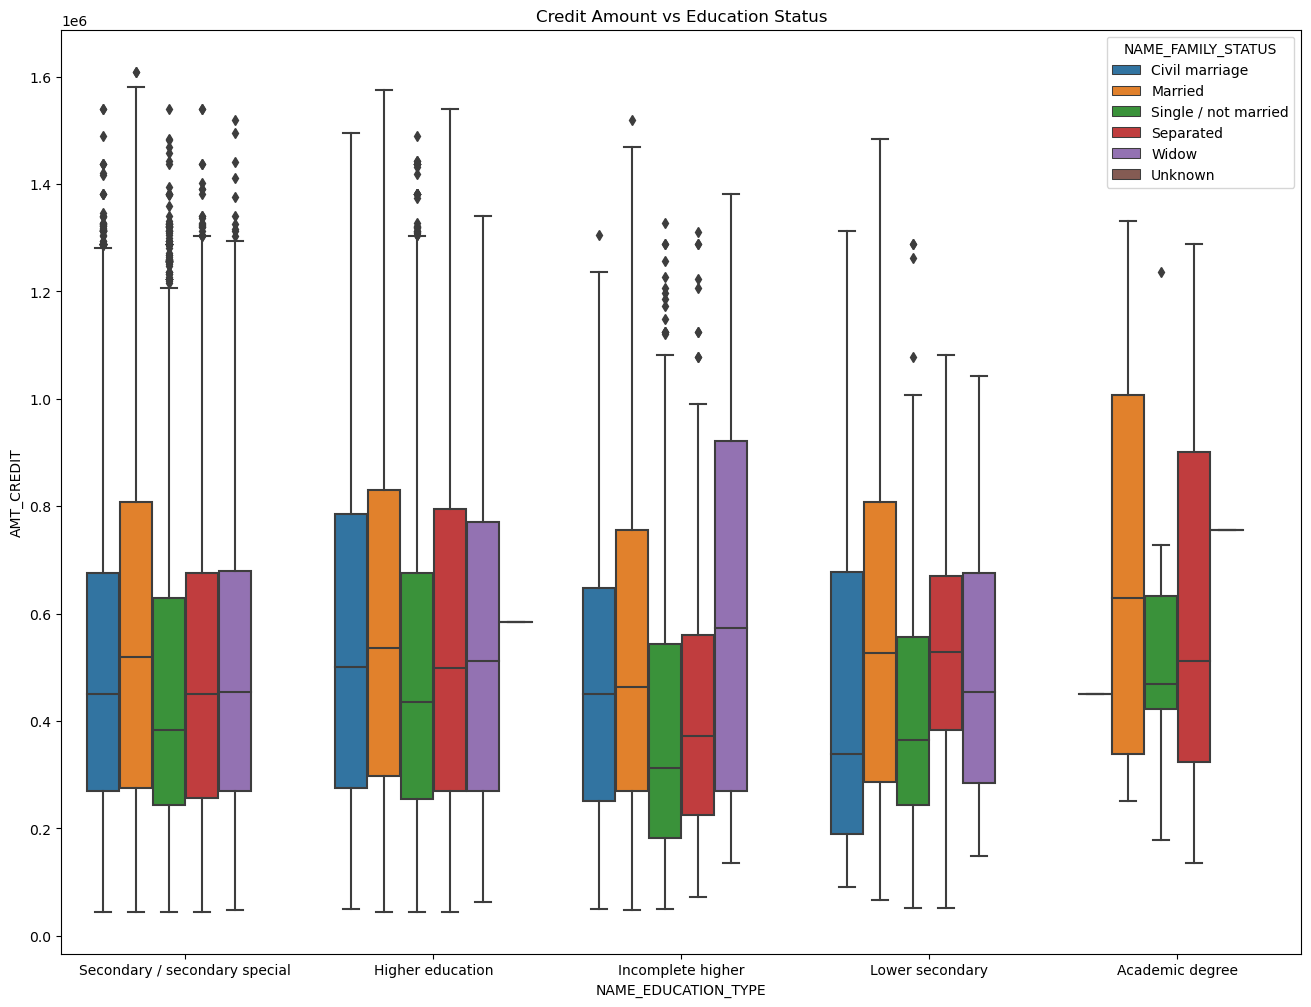

In [57]:
# Boxplot for credit amount VS Education Type

plt.figure(figsize=(16,12))
plt.xticks()
sns.boxplot(data =df, x='NAME_EDUCATION_TYPE',y='AMT_CREDIT', hue ='NAME_FAMILY_STATUS',orient='v')
plt.title('Credit Amount vs Education Status')
plt.show()

### Observations from the above plot:
#### -Married clients have the highest credit amount in all education types
#### -Single clients have the lowest credit amount in all education types
#### -Civil marriage clients have almost similar but less credit amount than the married clients
#### -The median credit amount with academice degree clients is the highest


# Multivaritate Analysis

### Heatmap

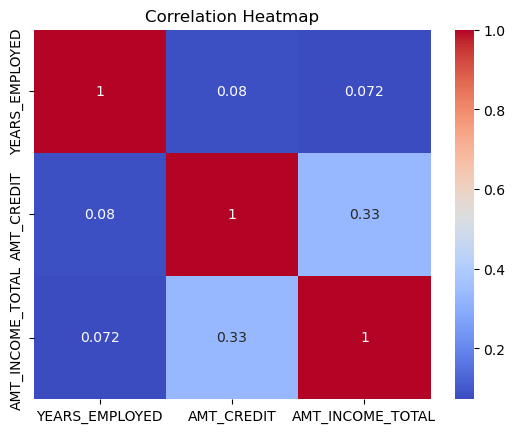

In [58]:
#Studying differnt variables

cols = ['OCCUPATION_TYPE', 'YEARS_EMPLOYED', 'AMT_CREDIT', 'AMT_INCOME_TOTAL']

# creating correlation matrix
corr_matrix = df[cols].corr()

# plotting the heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

### Observations from the above plot:
#### -There is a positive correlation between AMT_INCOME_TOTAL and AMT_CREDIT, which indicates that clients with higher income are able to get higher credit amounts.
#### -There is a moderate positive correlation between YEARS_EMPLOYED and AMT_CREDIT, which indicates that clients with more years of employment are able to get higher credit amounts.
#### -There is a weak negative correlation between OCCUPATION_TYPE and AMT_INCOME_TOTAL, which indicates that certain occupation types have lower incomes than others.
#### -There is no significant correlation between OCCUPATION_TYPE and YEARS_EMPLOYED, which indicates that employment duration is not necessarily related to the occupation type.

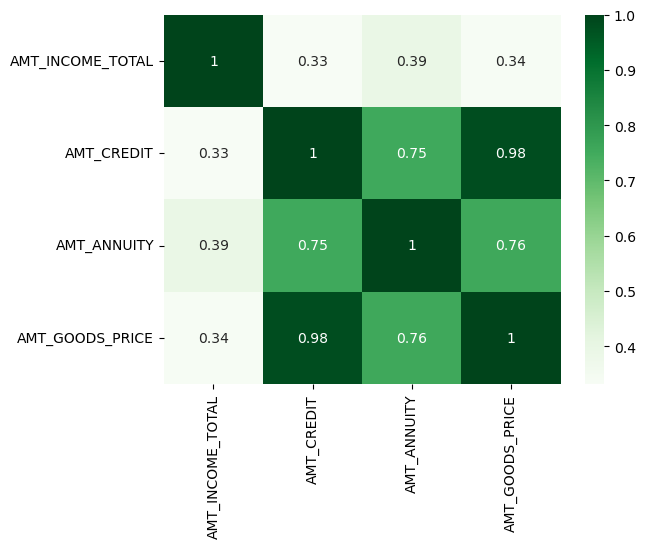

In [61]:
#Studying the variable with AMT_GOODS_PRICE

cols = ['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE']
corr = df[cols].corr()
sns.heatmap(corr, annot=True, cmap='Greens')
plt.show()


### Observation for the above plot:
#### -The strong positive correlation between AMT_CREDIT and AMT_GOODS_PRICE is still clearly visible
#### -The relatively weak positive correlation between AMT_INCOME_TOTAL and the other three variables is also still visible, with a lighter shade of green indicating a weaker correlation.
#### -The diagonal cells (i.e., the correlation of each variable with itself) are now more prominent, with the darkest green indicating a perfect correlation of 1.

### Pairplot 

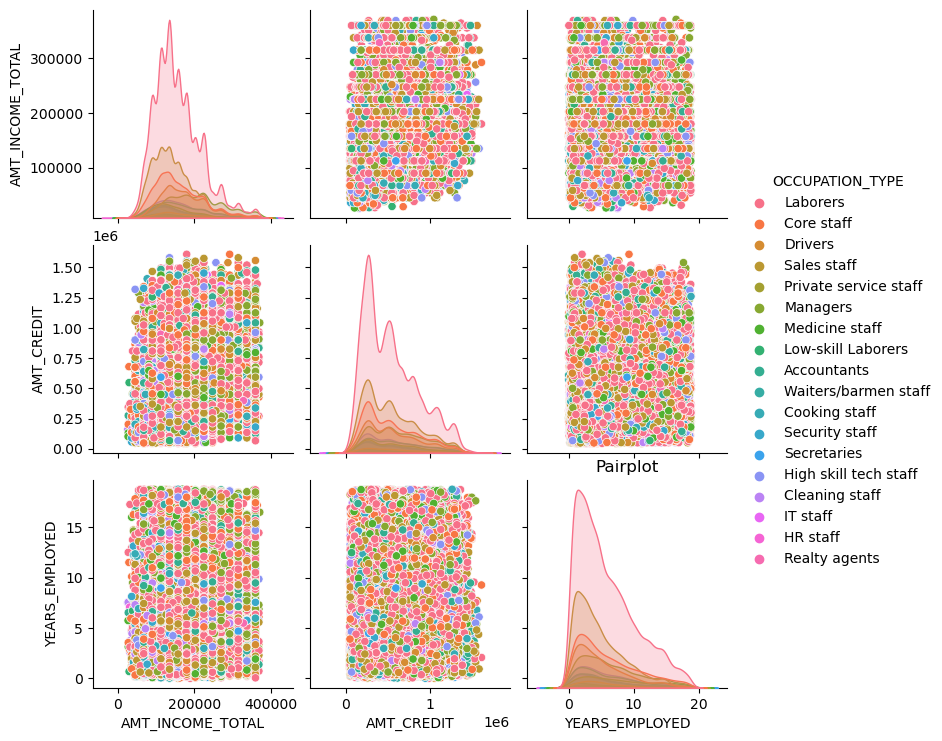

In [59]:
#Studying the different variables with pairplot

sns.pairplot(df[['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'YEARS_EMPLOYED', 'OCCUPATION_TYPE']], hue='OCCUPATION_TYPE')
plt.title('Pairplot')
plt.show()

### Observations from the above plot:
#### -There is a positive correlation between AMT_INCOME_TOTAL and AMT_CREDIT, which is expected.
#### -There is also a positive correlation between AMT_INCOME_TOTAL and YEARS_EMPLOYED, which suggests that people with higher incomes tend to have longer employment tenures.
#### -The scatterplots for each occupation type show some variation in the relationship between the variables, with some occupations having higher income and credit levels, and longer employment tenures, compared to others.

# Data cleaning on "previous_application.csv" dataset

In [65]:
df1.head()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430          17145.0   
1     2802425      108129         Cash loans    25188.615         607500.0   
2     2523466      122040         Cash loans    15060.735         112500.0   
3     2819243      176158         Cash loans    47041.335         450000.0   
4     1784265      202054         Cash loans    31924.395         337500.0   

   AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
0     17145.0               0.0          17145.0                   SATURDAY   
1    679671.0               NaN         607500.0                   THURSDAY   
2    136444.5               NaN         112500.0                    TUESDAY   
3    470790.0               NaN         450000.0                     MONDAY   
4    404055.0               NaN         337500.0                   THURSDAY   

   HOUR_APPR_PROCESS_START  ... NAME_SELLER_INDUSTRY  CNT_PAYMENT  \
0                       15  ...         Connectivity         12.0   
1                       11  ...                  XNA         36.0   
2                       11  ...                  XNA         12.0   
3                        7  ...                  XNA         12.0   
4                        9  ...                  XNA         24.0   

   NAME_YIELD_GROUP       PRODUCT_COMBINATION  DAYS_FIRST_DRAWING  \
0            middle  POS mobile with interest            365243.0   
1        low_action          Cash X-Sell: low            365243.0   
2              high         Cash X-Sell: high            365243.0   
3            middle       Cash X-Sell: middle            365243.0   
4              high         Cash Street: high                 NaN   

  DAYS_FIRST_DUE DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE DAYS_TERMINATION  \
0          -42.0                     300.0          -42.0            -37.0   
1         -134.0                     916.0       365243.0         365243.0   
2         -271.0                      59.0       365243.0         365243.0   
3         -482.0                    -152.0         -182.0           -177.0   
4            NaN                       NaN            NaN              NaN   

  NFLAG_INSURED_ON_APPROVAL  
0                       0.0  
1                       1.0  
2                       1.0  
3                       1.0  
4                       NaN  

[5 rows x 37 columns]

In [67]:
df1.info(-1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [71]:
#Checking for nulls 

missing_values1 = df1.isnull().sum().sort_values(ascending=False)
missing_values_percent1 = (missing_values1 / len(df1)) * 100
missing_data1 = pd.concat([missing_values1, missing_values_percent1], axis=1, keys=['Total', 'Percent'])
missing_data1.head(50)

Total    Percent
RATE_INTEREST_PRIVILEGED     1664263  99.643698
RATE_INTEREST_PRIMARY        1664263  99.643698
AMT_DOWN_PAYMENT              895844  53.636480
RATE_DOWN_PAYMENT             895844  53.636480
NAME_TYPE_SUITE               820405  49.119754
NFLAG_INSURED_ON_APPROVAL     673065  40.298129
DAYS_TERMINATION              673065  40.298129
DAYS_LAST_DUE                 673065  40.298129
DAYS_LAST_DUE_1ST_VERSION     673065  40.298129
DAYS_FIRST_DUE                673065  40.298129
DAYS_FIRST_DRAWING            673065  40.298129
AMT_GOODS_PRICE               385515  23.081773
AMT_ANNUITY                   372235  22.286665
CNT_PAYMENT                   372230  22.286366
PRODUCT_COMBINATION              346   0.020716
AMT_CREDIT                         1   0.000060
NAME_YIELD_GROUP                   0   0.000000
NAME_PORTFOLIO                     0   0.000000
NAME_SELLER_INDUSTRY               0   0.000000
SELLERPLACE_AREA                   0   0.000000
CHANNEL_TYPE                       0   0.000000
NAME_PRODUCT_TYPE                  0   0.000000
SK_ID_PREV                         0   0.000000
NAME_GOODS_CATEGORY                0   0.000000
NAME_CLIENT_TYPE                   0   0.000000
CODE_REJECT_REASON                 0   0.000000
SK_ID_CURR                         0   0.000000
DAYS_DECISION                      0   0.000000
NAME_CONTRACT_STATUS               0   0.000000
NAME_CASH_LOAN_PURPOSE             0   0.000000
NFLAG_LAST_APPL_IN_DAY             0   0.000000
FLAG_LAST_APPL_PER_CONTRACT        0   0.000000
HOUR_APPR_PROCESS_START            0   0.000000
WEEKDAY_APPR_PROCESS_START         0   0.000000
AMT_APPLICATION                    0   0.000000
NAME_CONTRACT_TYPE                 0   0.000000
NAME_PAYMENT_TYPE                  0   0.000000

In [72]:
#Shape of the new dataset before dropping the columns
df1.shape

(1670214, 37)

#### Dropping the columns with high percentage of missing values except "AMT_ANNUITY","AMT_GOODS_PRICE","AMT_CREDIT"

In [73]:
#Dropping the columns

df1.drop(["RATE_INTEREST_PRIVILEGED","RATE_INTEREST_PRIMARY","AMT_DOWN_PAYMENT","RATE_DOWN_PAYMENT",
         "NAME_TYPE_SUITE","NFLAG_INSURED_ON_APPROVAL","DAYS_TERMINATION",
         "DAYS_LAST_DUE","DAYS_LAST_DUE_1ST_VERSION","DAYS_FIRST_DUE","DAYS_FIRST_DRAWING",
         "PRODUCT_COMBINATION"],axis=1,inplace=True)

In [75]:
#Rechecking the values after dropping the columns

#Checking for nulls 

missing_values1 = df1.isnull().sum().sort_values(ascending=False)
missing_values_percent1 = (missing_values1 / len(df1)) * 100
missing_data1 = pd.concat([missing_values1, missing_values_percent1], axis=1, keys=['Total', 'Percent'])
missing_data1.head(50)

Total    Percent
AMT_GOODS_PRICE              385515  23.081773
AMT_ANNUITY                  372235  22.286665
CNT_PAYMENT                  372230  22.286366
AMT_CREDIT                        1   0.000060
SK_ID_PREV                        0   0.000000
NAME_PAYMENT_TYPE                 0   0.000000
NAME_SELLER_INDUSTRY              0   0.000000
SELLERPLACE_AREA                  0   0.000000
CHANNEL_TYPE                      0   0.000000
NAME_PRODUCT_TYPE                 0   0.000000
NAME_PORTFOLIO                    0   0.000000
NAME_GOODS_CATEGORY               0   0.000000
NAME_CLIENT_TYPE                  0   0.000000
CODE_REJECT_REASON                0   0.000000
NAME_CONTRACT_STATUS              0   0.000000
DAYS_DECISION                     0   0.000000
SK_ID_CURR                        0   0.000000
NAME_CASH_LOAN_PURPOSE            0   0.000000
NFLAG_LAST_APPL_IN_DAY            0   0.000000
FLAG_LAST_APPL_PER_CONTRACT       0   0.000000
HOUR_APPR_PROCESS_START           0   0.000000
WEEKDAY_APPR_PROCESS_START        0   0.000000
AMT_APPLICATION                   0   0.000000
NAME_CONTRACT_TYPE                0   0.000000
NAME_YIELD_GROUP                  0   0.000000

In [76]:
df1.shape

(1670214, 25)

In [79]:
#Dropping unncessary columns
df1.drop(["SELLERPLACE_AREA", "NAME_SELLER_INDUSTRY", "CNT_PAYMENT",
       "NAME_YIELD_GROUP","DAYS_DECISION","WEEKDAY_APPR_PROCESS_START",
         "HOUR_APPR_PROCESS_START","NFLAG_LAST_APPL_IN_DAY"],axis=1,inplace=True)

In [80]:
#After dropping of the columns
df1.shape

(1670214, 17)

### Imputing values for high percentage of missing values

In [85]:
#Imputed by the median value as it remains unafftcted 

values2 =df1['AMT_GOODS_PRICE'].median()
df1.loc[df1['AMT_GOODS_PRICE'].isnull(),'AMT_GOODS_PRICE']= values2

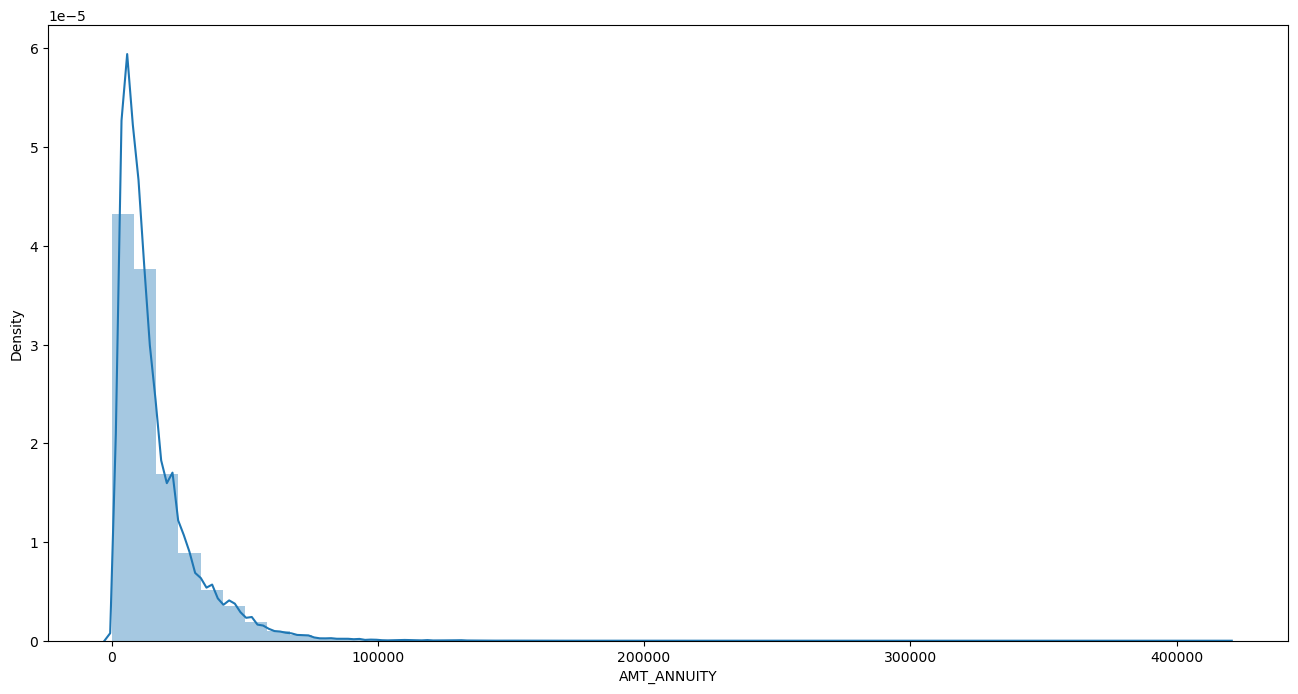

In [87]:
#Checking the skewness of the column "AMT_ANNUITY" which will tell whether to go for mean or median value

plt.figure(figsize = [16,8])
sns.distplot(df1["AMT_ANNUITY"])
plt.show()

In [88]:
#Imputed by the median value as it remains unafftcted 
values3 =df1['AMT_ANNUITY'].median()
df1.loc[df1['AMT_ANNUITY'].isnull(),'AMT_ANNUITY']= values3

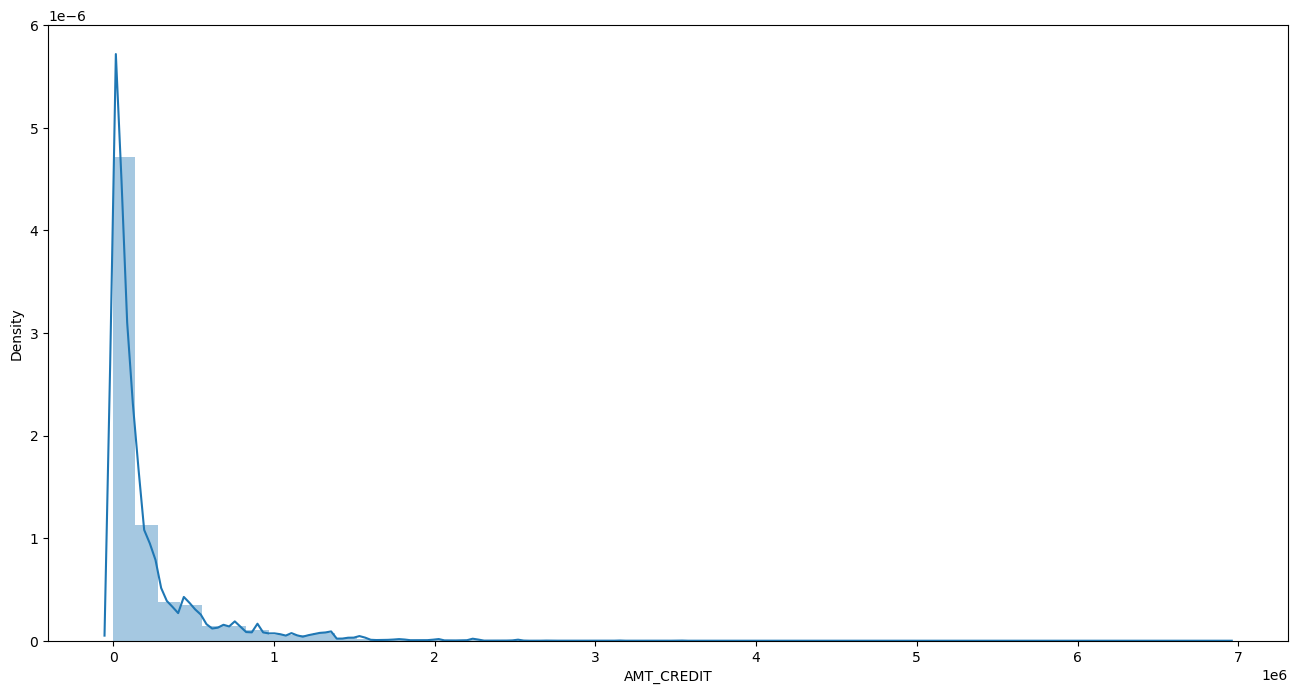

In [89]:
#Checking the skewness of the column "AMT_CREDIT" which will tell whether to go for mean or median value

plt.figure(figsize = [16,8])
sns.distplot(df1["AMT_CREDIT"])
plt.show()

In [92]:
#Imputed by the median value as it remains unafftcted 
values4 =df1['AMT_CREDIT'].median()
df1.loc[df1['AMT_CREDIT'].isnull(),'AMT_CREDIT']= values4

In [93]:
#Rechecking the values after imputing the values in the columns

#Checking for nulls 

missing_values1 = df1.isnull().sum().sort_values(ascending=False)
missing_values_percent1 = (missing_values1 / len(df1)) * 100
missing_data1 = pd.concat([missing_values1, missing_values_percent1], axis=1, keys=['Total', 'Percent'])
missing_data1.head(50)

Total  Percent
SK_ID_PREV                       0      0.0
NAME_CONTRACT_STATUS             0      0.0
NAME_PRODUCT_TYPE                0      0.0
NAME_PORTFOLIO                   0      0.0
NAME_GOODS_CATEGORY              0      0.0
NAME_CLIENT_TYPE                 0      0.0
CODE_REJECT_REASON               0      0.0
NAME_PAYMENT_TYPE                0      0.0
NAME_CASH_LOAN_PURPOSE           0      0.0
SK_ID_CURR                       0      0.0
FLAG_LAST_APPL_PER_CONTRACT      0      0.0
AMT_GOODS_PRICE                  0      0.0
AMT_CREDIT                       0      0.0
AMT_APPLICATION                  0      0.0
AMT_ANNUITY                      0      0.0
NAME_CONTRACT_TYPE               0      0.0
CHANNEL_TYPE                     0      0.0

### Handling Outliers

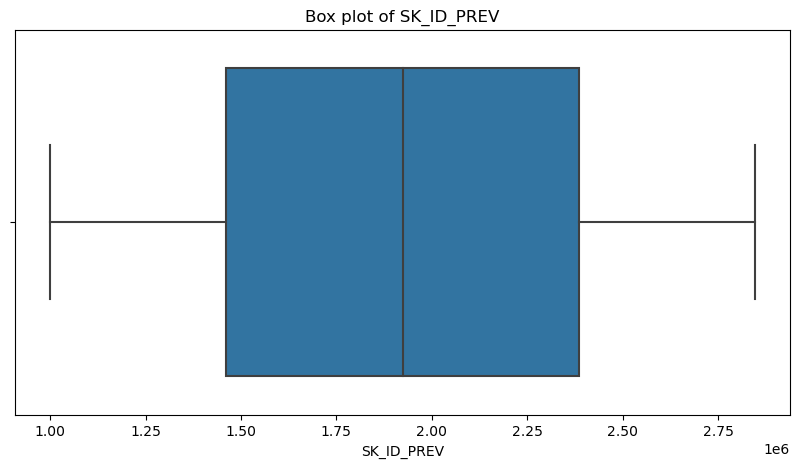

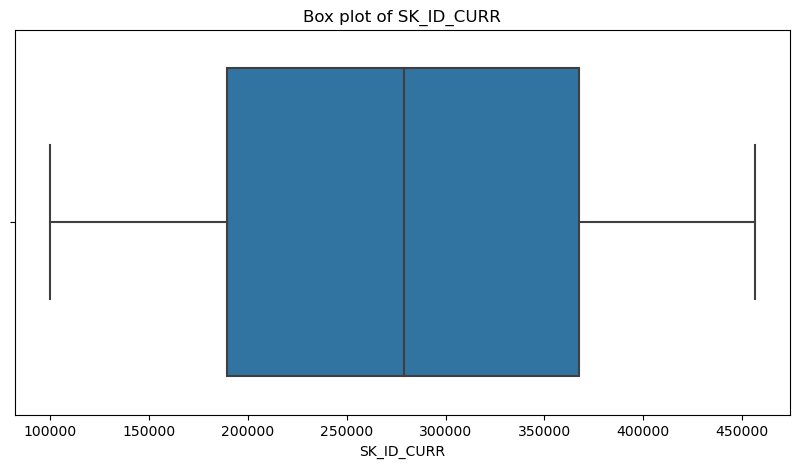

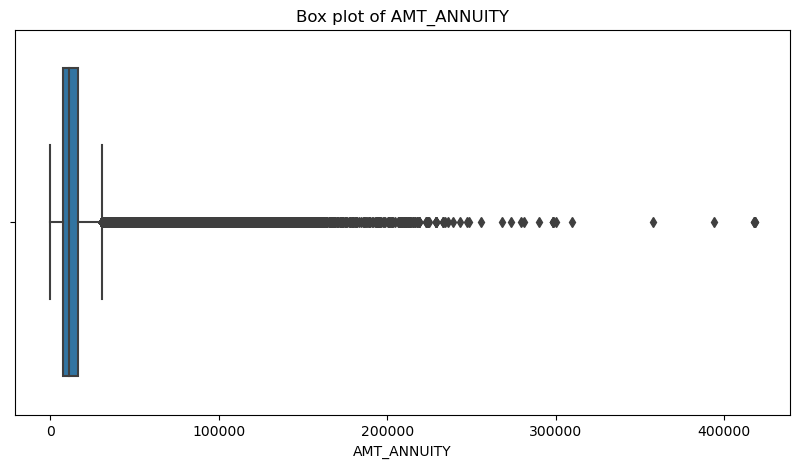

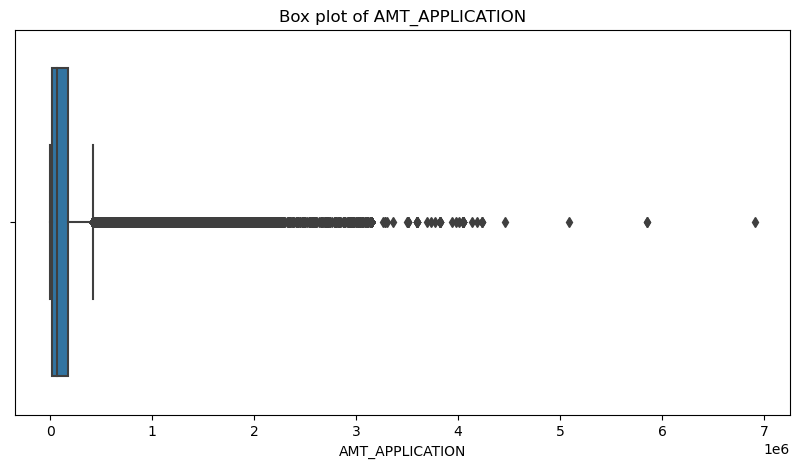

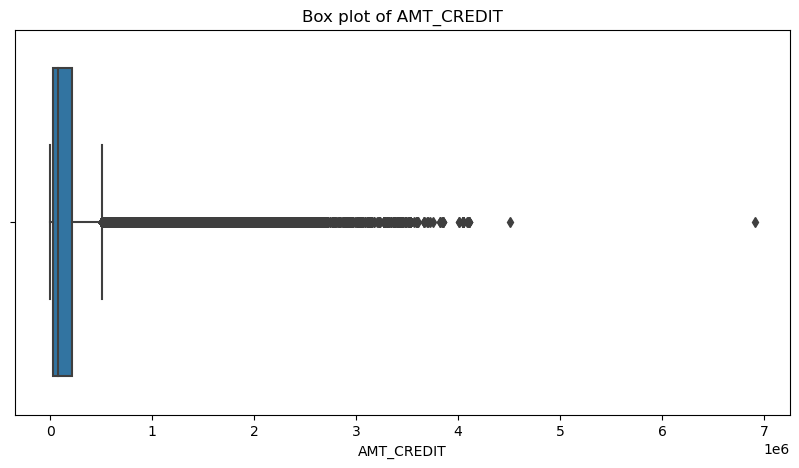

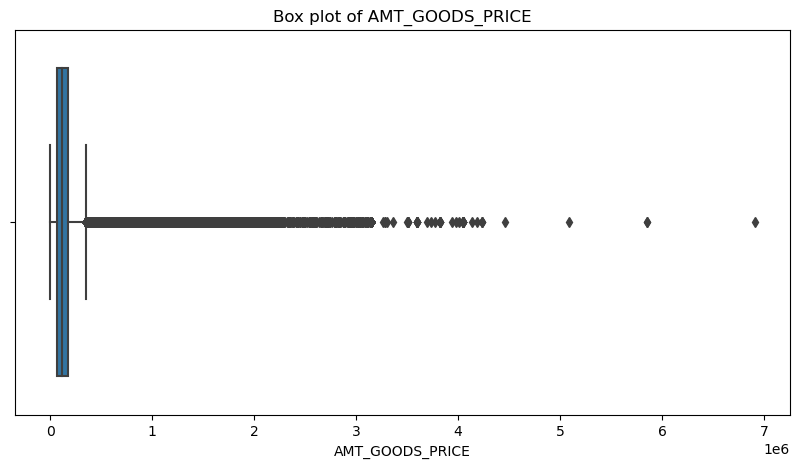

In [94]:
# Checking for outliers in numerical variables using boxplots

num_cols = df1.select_dtypes(include=[np.number]).columns.tolist()

for col in num_cols:
    fig, ax = plt.subplots(figsize=(10, 5))
    sns.boxplot(x=col, data=df1, ax=ax)
    ax.set_title('Box plot of {}'.format(col))
    plt.show()

#### There are few outliers in AMT_ANNUITY, AMT_GOODS_PRICE and AMT_CREDIT

### Handling Outliers using IQR Method

In [95]:
#Handling outliers using IQR Method

num_cols = df1.select_dtypes(include=[np.number]).columns.tolist()

for col in num_cols:
    Q1 = df1[col].quantile(0.25)
    Q3 = df1[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5*IQR
    upper_bound = Q3 + 1.5*IQR
    df1 = df1[(df1[col] >= lower_bound) & (df1[col] <= upper_bound)]

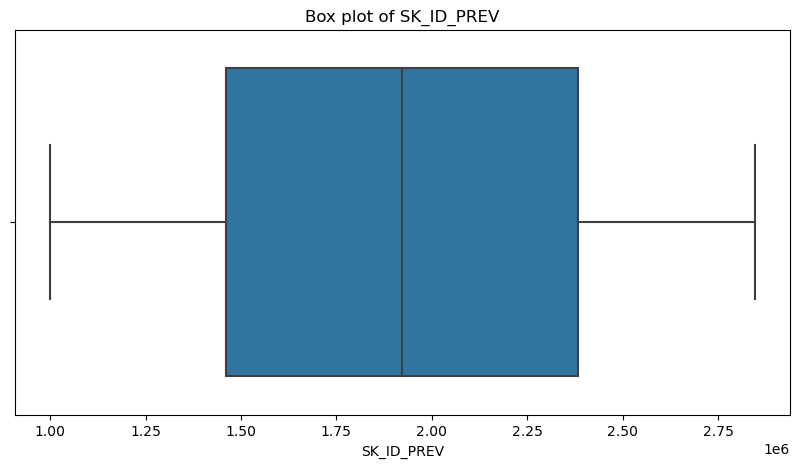

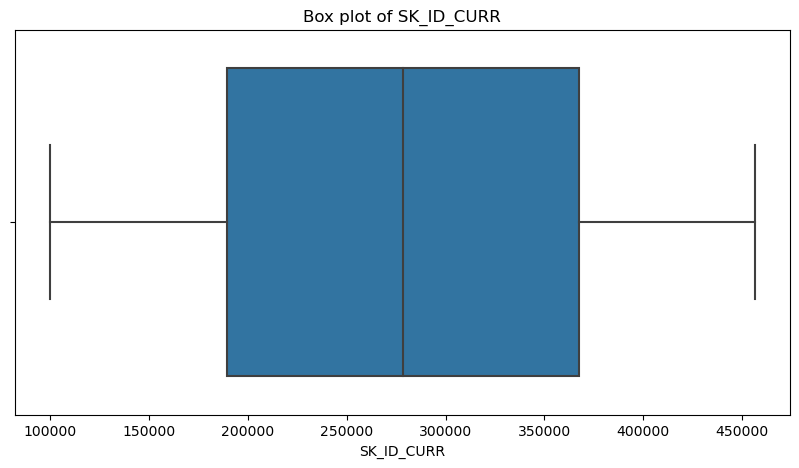

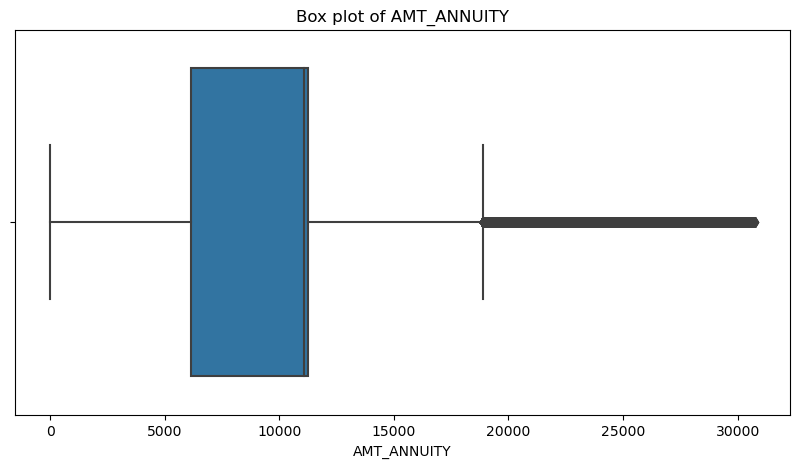

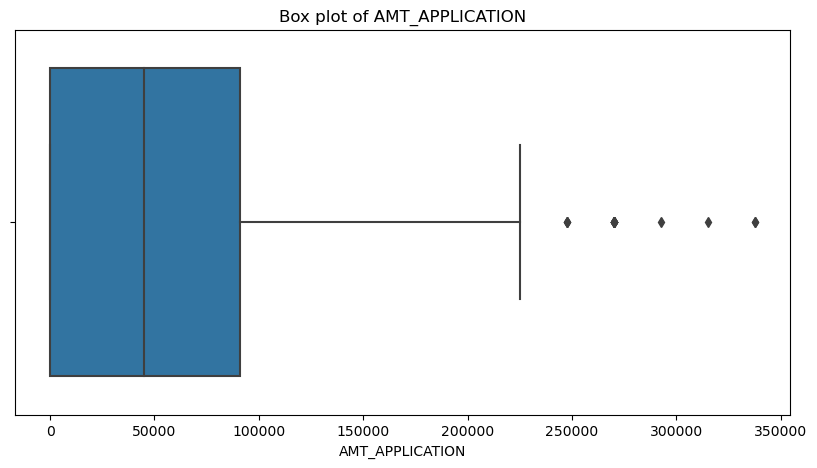

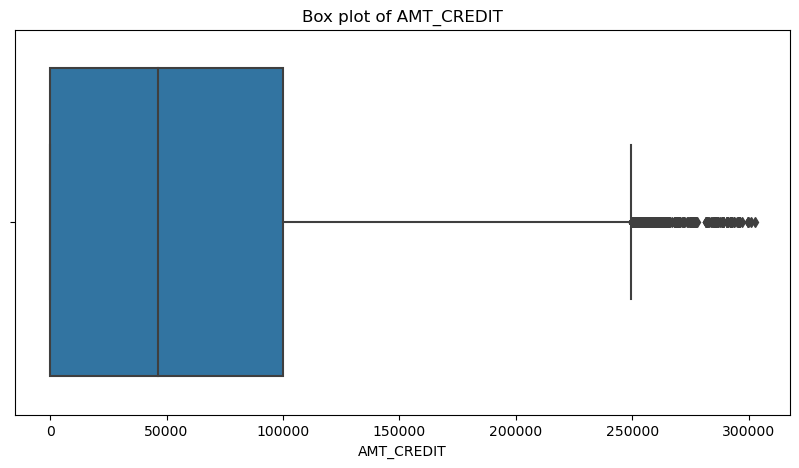

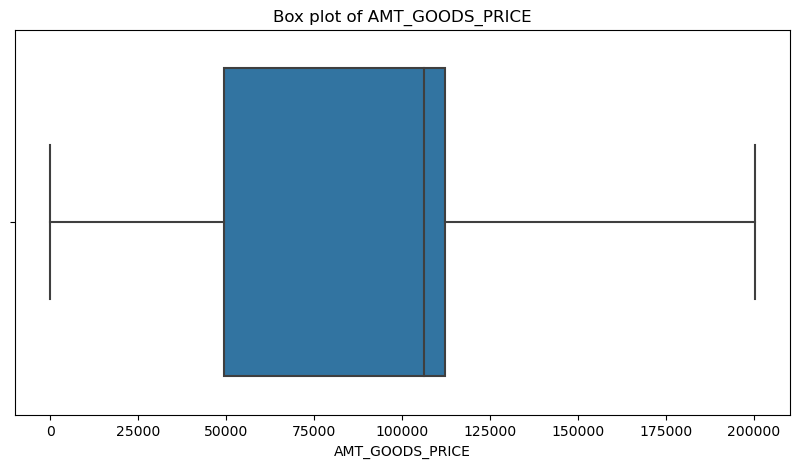

In [96]:
# Rechecking for outliers in numerical variables using boxplots

num_cols = df1.select_dtypes(include=[np.number]).columns.tolist()

for col in num_cols:
    fig, ax = plt.subplots(figsize=(10, 5))
    sns.boxplot(x=col, data=df1, ax=ax)
    ax.set_title('Box plot of {}'.format(col))
    plt.show()

In [97]:
df1.head(20)

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0      2030495      271877     Consumer loans     1730.430          17145.0   
2      2523466      122040         Cash loans    15060.735         112500.0   
6      2315218      175704         Cash loans    11250.000              0.0   
7      1656711      296299         Cash loans    11250.000              0.0   
8      2367563      342292         Cash loans    11250.000              0.0   
9      2579447      334349         Cash loans    11250.000              0.0   
12     2330894      258628         Cash loans    12165.210         148500.0   
13     1397919      321676     Consumer loans     7654.860          53779.5   
14     2273188      270658     Consumer loans     9644.220          26550.0   
15     1232483      151612     Consumer loans    21307.455         126490.5   
16     2163253      154602     Consumer loans     4187.340          26955.0   
17     1285768      142748    Revolving loans     9000.000         180000.0   
18     2393109      396305         Cash loans    10181.700         180000.0   
19     1173070      199178         Cash loans     4666.500          45000.0   
22     1172842      302212         Cash loans    11250.000              0.0   
24     1555330      199353         Cash loans    11250.000              0.0   
28     2075578      418383     Consumer loans     7656.705          74610.0   
29     1583704      315664         Cash loans    11250.000              0.0   
30     2138466      170289     Consumer loans     3286.485          32562.0   
31     2191093      182450     Consumer loans     9789.255         100485.0   

    AMT_CREDIT  AMT_GOODS_PRICE FLAG_LAST_APPL_PER_CONTRACT  \
0      17145.0          17145.0                           Y   
2     136444.5         112500.0                           Y   
6          0.0         112320.0                           Y   
7          0.0         112320.0                           Y   
8          0.0         112320.0                           Y   
9          0.0         112320.0                           Y   
12    174361.5         148500.0                           Y   
13     57564.0          53779.5                           Y   
14     27252.0          26550.0                           Y   
15    119853.0         126490.5                           Y   
16     27297.0          26955.0                           Y   
17    180000.0         180000.0                           Y   
18    180000.0         180000.0                           Y   
19     49455.0          45000.0                           Y   
22         0.0         112320.0                           Y   
24         0.0         112320.0                           Y   
28     65610.0          74610.0                           Y   
29         0.0         112320.0                           Y   
30     32562.0          32562.0                           Y   
31    100485.0         100485.0                           Y   

   NAME_CASH_LOAN_PURPOSE NAME_CONTRACT_STATUS      NAME_PAYMENT_TYPE  \
0                     XAP             Approved  Cash through the bank   
2                     XNA             Approved  Cash through the bank   
6                     XNA             Canceled                    XNA   
7                     XNA             Canceled                    XNA   
8                     XNA             Canceled                    XNA   
9                     XNA             Canceled                    XNA   
12                    XNA             Approved  Cash through the bank   
13                    XAP             Approved  Cash through the bank   
14                    XAP             Approved  Cash through the bank   
15                    XAP             Approved  Cash through the bank   
16                    XAP             Approved  Cash through the bank   
17                    XAP             Approved                    XNA   
18                    XNA             Approved  Cash through the bank  

#### We can there is a column "NAME_CASH_LOAN_PURPOSE"	 with XNA and XAP values which means the values are not available
#### We will drop such a column

In [98]:
#Dropping the column with values "XNA" and "XAP"

df1=df1.drop(df1[df1['NAME_CASH_LOAN_PURPOSE']=='XNA'].index)
df1=df1.drop(df1[df1['NAME_CASH_LOAN_PURPOSE']=='XNA'].index)
df1=df1.drop(df1[df1['NAME_CASH_LOAN_PURPOSE']=='XAP'].index)

df1.shape

(25920, 17)

In [99]:
# Merging the two DataFrames using an inner join on the 'SK_ID_CURR' column

df2 = pd.merge(df, df1, on='SK_ID_CURR', how='inner')

# Dropping the 'SK_ID_PREV' column

df2.drop('SK_ID_PREV', axis=1, inplace=True)

In [100]:
df2.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE_x CODE_GENDER FLAG_OWN_CAR  \
0      100034       0      Revolving loans           M            N   
1      100080       0      Revolving loans           F            N   
2      100098       0      Revolving loans           M            Y   
3      100334       0           Cash loans           M            N   
4      100334       0           Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT_x  \
0               Y             0           90000.0      180000.0   
1               N             1          157500.0      450000.0   
2               N             0          225000.0      270000.0   
3               Y             0           90000.0      101880.0   
4               Y             0           90000.0      101880.0   

   AMT_ANNUITY_x  ...  FLAG_LAST_APPL_PER_CONTRACT NAME_CASH_LOAN_PURPOSE  \
0         9000.0  ...                            Y                  Other   
1        22500.0  ...                            Y              Education   
2        13500.0  ...                            Y                Repairs   
3        10939.5  ...                            Y                Repairs   
4        10939.5  ...                            Y                Repairs   

  NAME_CONTRACT_STATUS      NAME_PAYMENT_TYPE CODE_REJECT_REASON  \
0             Approved  Cash through the bank                XAP   
1             Approved  Cash through the bank                XAP   
2             Approved  Cash through the bank                XAP   
3             Approved  Cash through the bank                XAP   
4             Approved  Cash through the bank                XAP   

  NAME_CLIENT_TYPE  NAME_GOODS_CATEGORY  NAME_PORTFOLIO  NAME_PRODUCT_TYPE  \
0              New                  XNA            Cash            walk-in   
1              New                  XNA            Cash            walk-in   
2        Refreshed                  XNA            Cash            walk-in   
3              New                  XNA            Cash            walk-in   
4              New                  XNA            Cash            walk-in   

              CHANNEL_TYPE  
0  Credit and cash offices  
1  Credit and cash offices  
2          AP+ (Cash loan)  
3             Country-wide  
4             Country-wide  

[5 rows x 57 columns]

In [101]:
df2.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE_x', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT_x', 'AMT_ANNUITY_x', 'AMT_GOODS_PRICE_x', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL',
       'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS',
       'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY',
       'ORGANIZATION_TYPE', 'YEARS_BIRTH', 'YEARS_EMPLOYED',
       'NAME_CONTRACT_TYPE_y', 'AMT

## Univariate Analysis

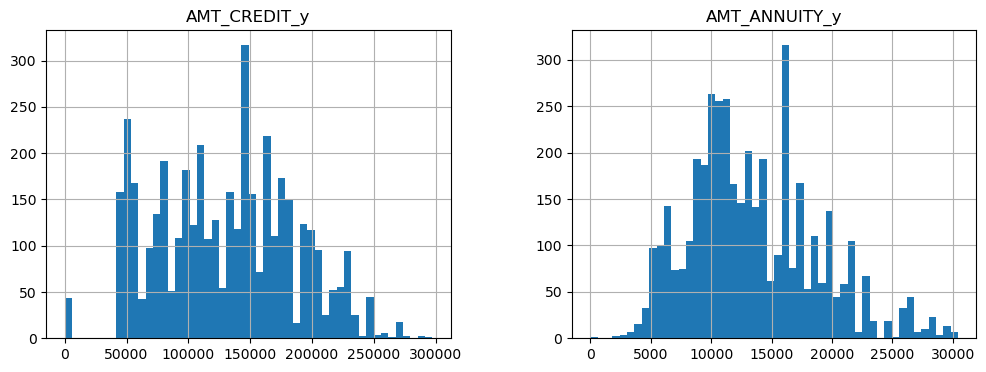

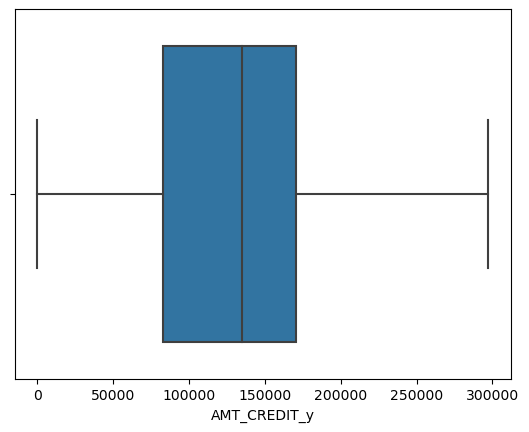

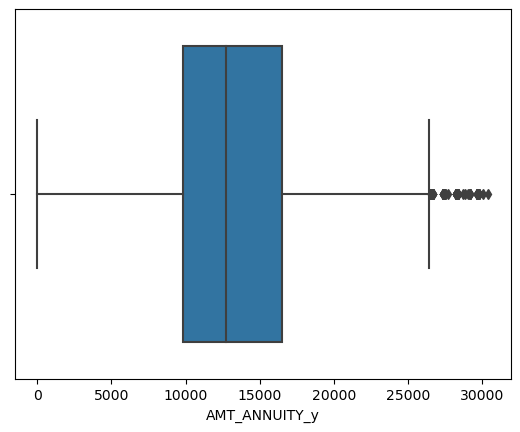

In [105]:
uni = df2[['AMT_CREDIT_y', 'AMT_ANNUITY_y',]]

# Ploting histograms of each variable
uni.hist(bins=50, figsize=(12,4))
plt.show()

# Ploting boxplots of each variable
for col in uni.columns:
    sns.boxplot(x=uni[col])
    plt.show()

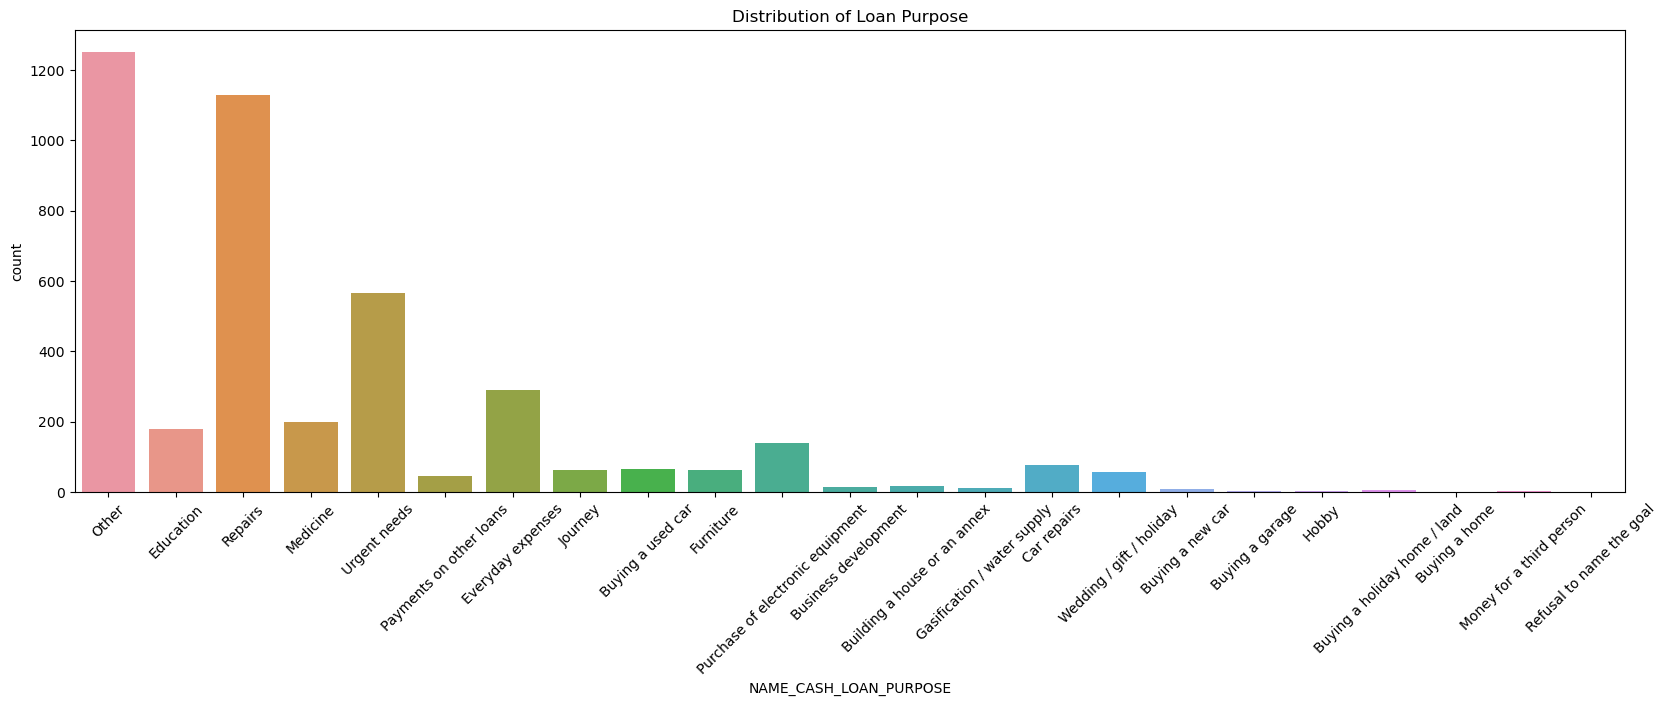

In [112]:
#Studying the purpose of taking the loan

plt.figure(figsize=(20, 6))
plt.xticks(rotation = 45)
sns.countplot(x='NAME_CASH_LOAN_PURPOSE', data=df2)
plt.title('Distribution of Loan Purpose')
plt.show()


### Observations from the above plot:
#### -Majority of the purpose was mentioned as others but it was followed by loan for repairs

## Bivariate Analysis

### AMT_APPLICATION vs AMT_CREDIT


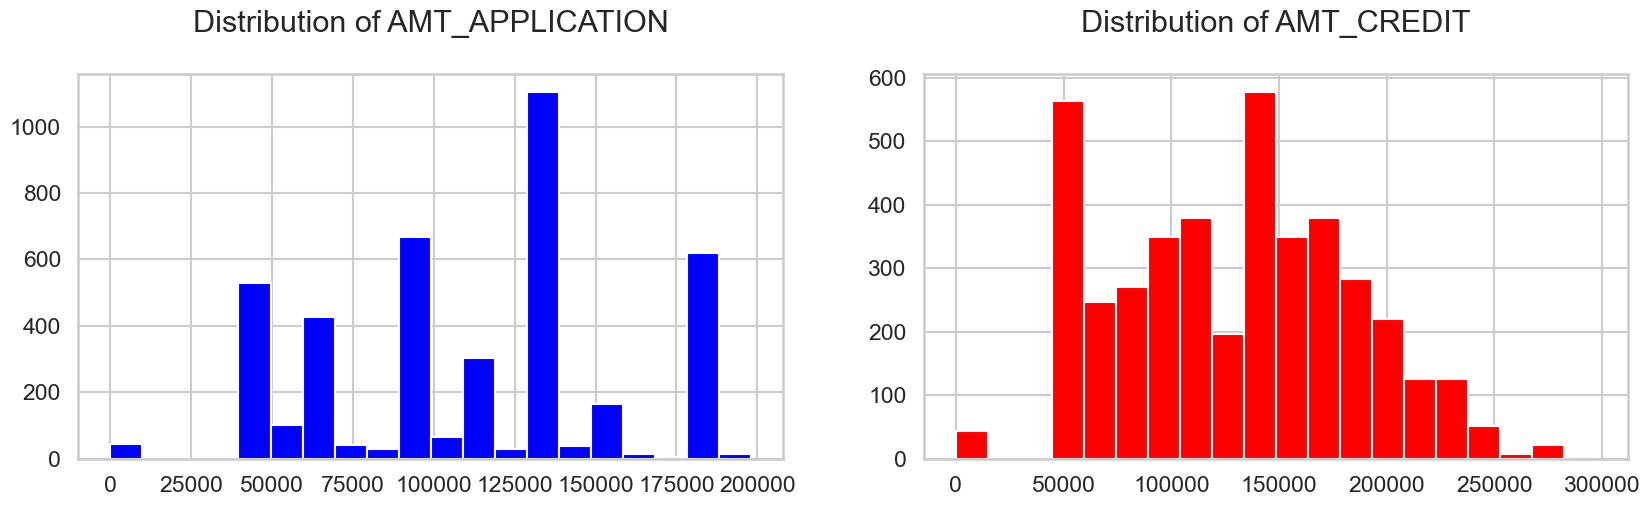

In [126]:
# Histograms of AMT_APPLICATION and AMT_CREDIT

plt.figure(figsize=(20, 5))
plt.subplot(1, 2, 1)
plt.hist(df2['AMT_APPLICATION'], bins=20, color='b')
plt.title('Distribution of AMT_APPLICATION')

plt.subplot(1, 2, 2)
plt.hist(df2['AMT_CREDIT_y'], bins=20, color='r')
plt.title('Distribution of AMT_CREDIT')

plt.show()



### Observations from the above plot:
#### -Both AMT_APPLICATION and AMT_CREDIT are right-skewed, with most values concentrated at the lower end of the distribution and few higher values. This suggests that there are relatively few high-value applications or loans, but many more low-value ones.

### Credit amount vs Loan purpose

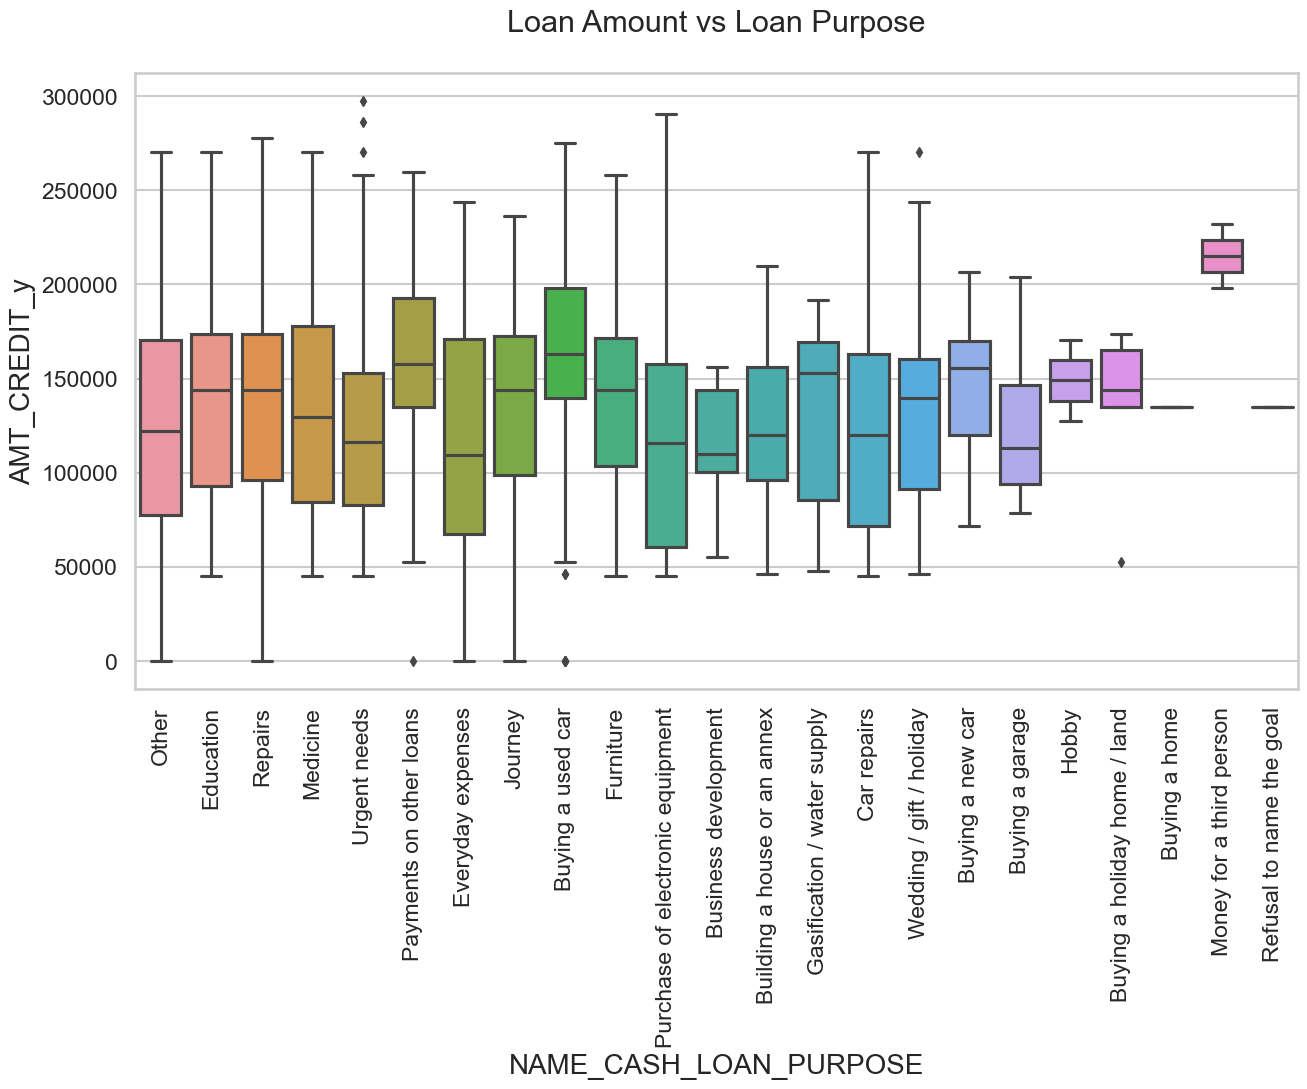

In [130]:
#Studying the variables credit amount vs purpose of the loan

plt.figure(figsize=(15, 8))
sns.boxplot(x='NAME_CASH_LOAN_PURPOSE', y='AMT_CREDIT_y', data= df2)
plt.xticks(rotation=90)
plt.title('Loan Amount vs Loan Purpose')
plt.show()


### Observations from the above plot:
#### -The median loan amount varies between different loan purposes, with the highest median loan amounts for "Money for a third person"
#### -Some loan purposes, such as "Purchase of electroninc equipment", "Buying a used car" etc have a wider distribution of loan amounts, suggesting that loan amounts for these purposes can vary widely.

### Reject reason vs the amount of application

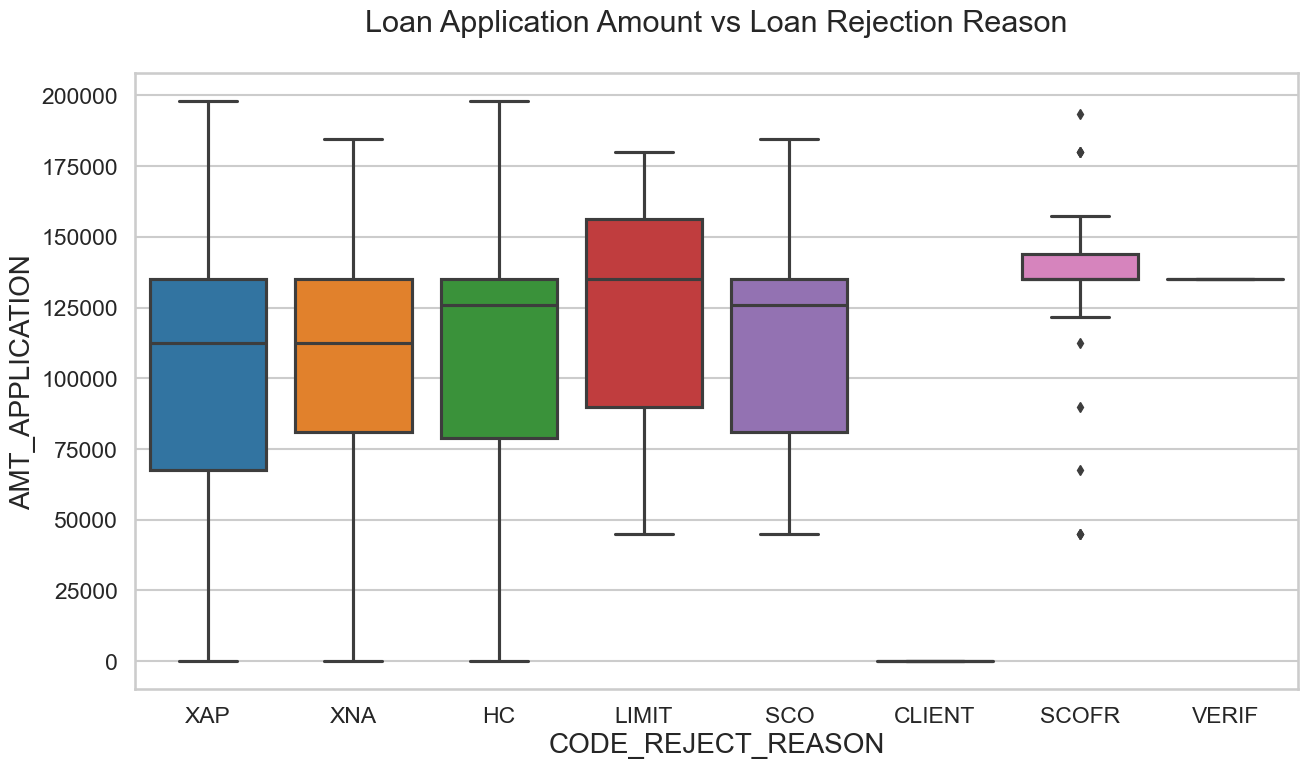

In [134]:
#Studying the variables reject reason vs amount of the application

plt.figure(figsize=(15, 8))
sns.boxplot(x='CODE_REJECT_REASON', y='AMT_APPLICATION', data=df2)
plt.xticks()
plt.title('Loan Application Amount vs Loan Rejection Reason')
plt.show()


### Observations from the above plot:
#### -The median loan application amount varies considerably between different loan rejection reasons, with the highest median loan application amount for LIMIT.
#### -Some loan rejection reasons, such as "XAP", "SCO", and "HC", have a wider distribution of loan application amounts than others, suggesting that loan application amounts for these reasons can vary widely.

### Previous credit amount vs Occupation type

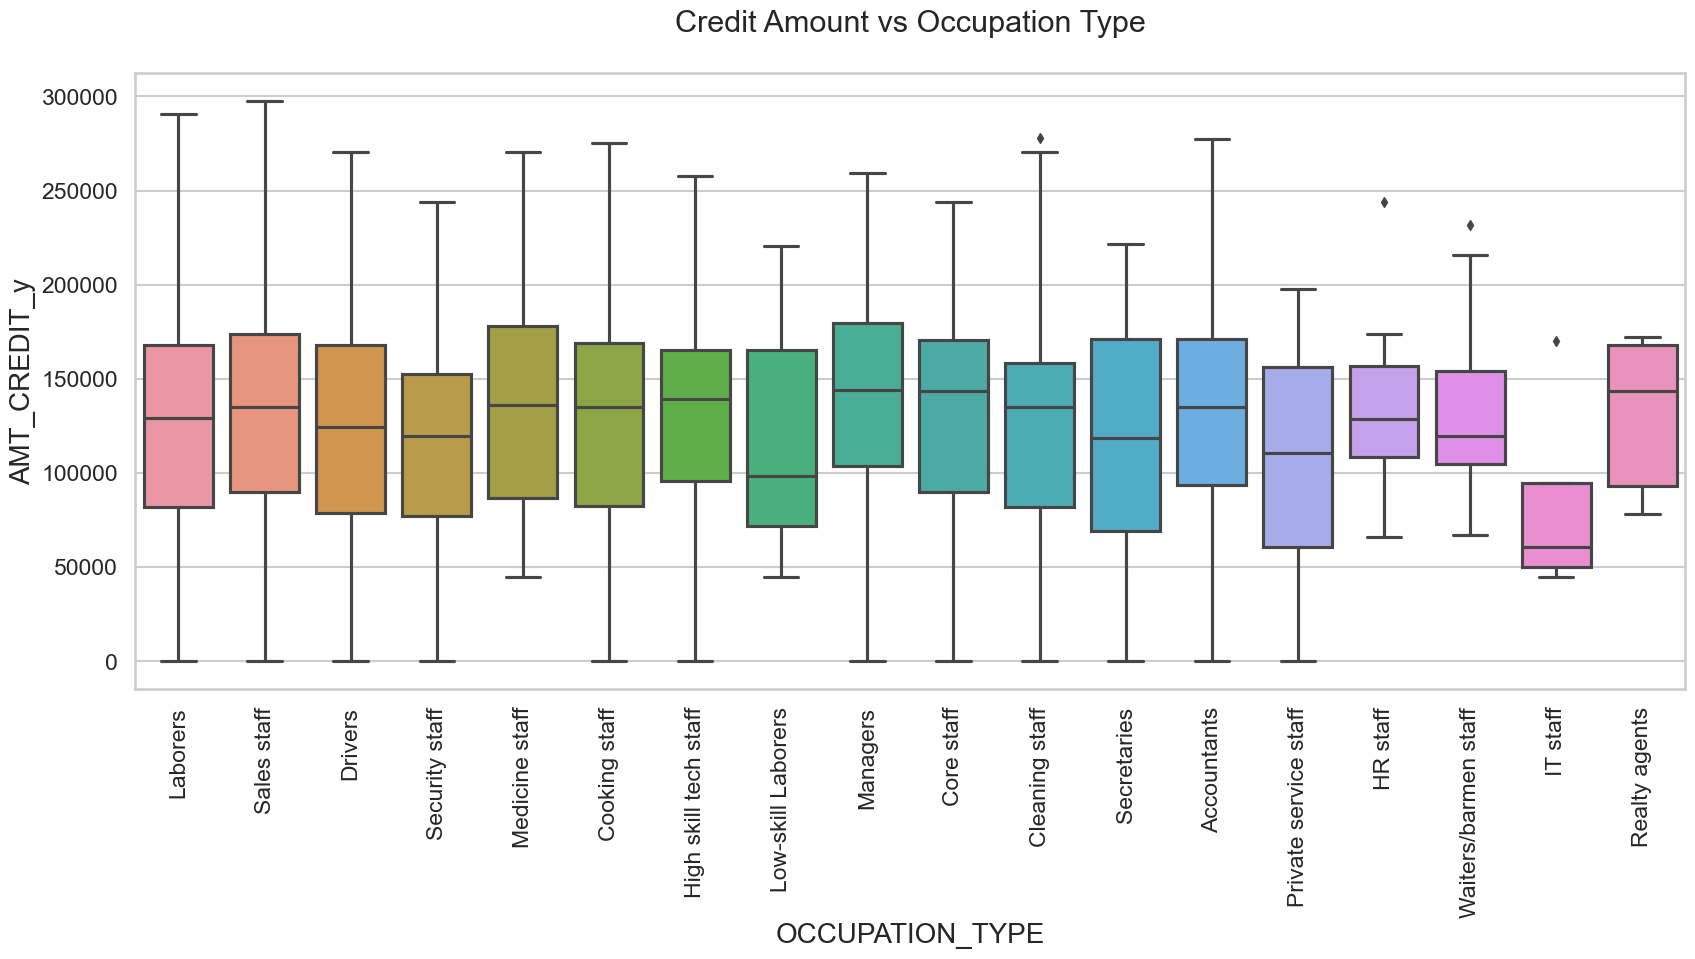

In [137]:
#Studying the variables previous credit amount vs occupation type

plt.figure(figsize=(20, 8))
sns.boxplot(x='OCCUPATION_TYPE', y='AMT_CREDIT_y', data=df2)
plt.xticks(rotation=90)
plt.title('Credit Amount vs Occupation Type')
plt.show()


### Observations from the plot:
#### -The median credit amount varies considerably between different occupation types, with the highest median credit amount for the occupation type "Realty agents" and "Managers".
#### -Some occupation types, such as "Core Staff", "Medical staff", have a wider distribution of credit amounts, suggesting that credit amounts for these occupation types can vary widely.
#### -Laborers have taken a decent amount of credit previously

## Multivariate Analysis

### Heatmap

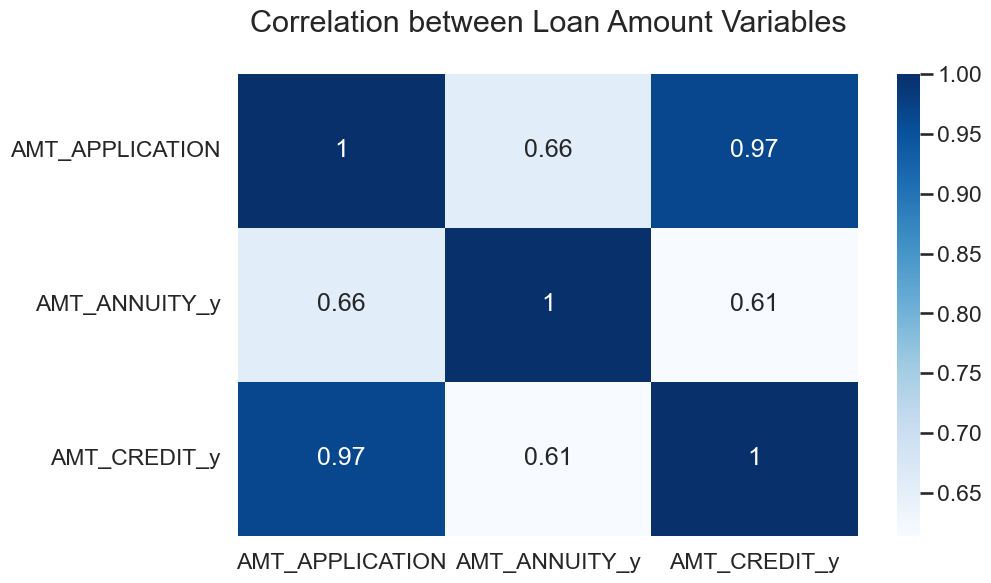

In [146]:
#Studying the "AMT_APPLICATION", "AMT_ANNUITY_y", and "AMT_CREDIT_y" using heatmap

plt.figure(figsize=(10, 6))
sns.heatmap(df2[["AMT_APPLICATION", "AMT_ANNUITY_y", "AMT_CREDIT_y"]].corr(), annot=True, cmap='Blues')
plt.title('Correlation between Loan Amount Variables')
plt.show()



### Observations for the above plot:
#### -AMT_APPLICATION, AMT_ANNUITY, and AMT_CREDIT are all highly positively correlated with each other.
#### -The strongest correlation is between AMT_APPLICATION and AMT_CREDIT, with a correlation coefficient of 0.97
#### -The correlation between AMT_APPLICATION and AMT_ANNUITY is slightly weaker, with a correlation coefficient of 0.66
#### -The weakest correlation is between AMT_ANNUITY and AMT_CREDIT, with a correlation coefficient of 0.61

## Recommendations
#### -Laborers with low income and low credit maybe a reason for loan default

#### -Company should focus on married clients with higher level of education 

#### -Clients with more years of employment should be focussed on

#### -High value and high income client should be the targeted

#### -Married clients with higher level of education should targeted

#### -The loan purpose and the capability to repay should be considered